# Import Libraries

In [1]:
import pandas as pd

import pip
# pip.main(["install", "openpyxl"])

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import linregress
import gmaps 
from config import gkey
import requests
import json

# Configure gmaps
gmaps.configure(api_key=gkey)

In [ ]:
# Code for merging 12 CSV files together
df1 = pd.read_csv("data/2019-01-west-midlands-street.csv")
df2 = pd.read_csv("data/2019-02-west-midlands-street.csv")
df3 = pd.read_csv("data/2019-03-west-midlands-street.csv")
df4 = pd.read_csv("data/2019-04-west-midlands-street.csv")
df5 = pd.read_csv("data/2019-05-west-midlands-street.csv")
df6 = pd.read_csv("data/2019-06-west-midlands-street.csv")
df7 = pd.read_csv("data/2019-07-west-midlands-street.csv")
df8 = pd.read_csv("data/2019-08-west-midlands-street.csv")
df9 = pd.read_csv("data/2019-09-west-midlands-street.csv")
df10 = pd.read_csv("data/2019-10-west-midlands-street.csv")
df11 = pd.read_csv("data/2019-11-west-midlands-street.csv")
df12 = pd.read_csv("data/2019-12-west-midlands-street.csv")

df_to_merge = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]

reduced_2019 = reduce(lambda  left,right: pd.merge(left,right, how='outer'), df_to_merge)

West Midlands crime data has already been merged (see 'data story so far.docx'). We had access to 12 CSV files with a months worth of 2019 data that we merged together. Read CSV and see dataframe.

In [2]:
data = pd.read_csv("data/reduced_2019.csv")

data_df = data

data_df.head()

,Crime ID,Crime type,Last outcome category,Month,Longitude,Latitude,Location,LSOA code,LSOA name,District code (2019),District name (2019),Description,Population,Index of Multiple Deprivation (IMD),Income deprivation- Average score,Income deprivation - Rank of average score,Income - Rank of proportion of LSOAs in most deprived 10% nationally
0,b0854078f33cc4e2ecd7353c40d3a03120063e7d39134b...,Burglary,Investigation complete; no suspect identified,2019-01,-1.850519,52.589275,On or near Crown Lane,E01009417,Birmingham 001A,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,7,0.222,7,5
1,b48f19d1ca24bd7e1ef53952c1472314c1af57240df6d5...,Other theft,Investigation complete; no suspect identified,2019-01,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham 001A,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,7,0.222,7,5
2,2ea61ee241faeac03c5595efc0e3d838d79f20f5831f24...,Public order,Investigation complete; no suspect identified,2019-01,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham 001A,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,7,0.222,7,5
3,0fd56c14bbd052c45e7e9abc1c182c5201e5664a61dc03...,Criminal damage and arson,Investigation complete; no suspect identified,2019-02,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham 001A,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,7,0.222,7,5
4,cadab8dbc07947f5db64c9c0206077758cbbad346611cc...,Criminal damage and arson,Investigation complete; no suspect identified,2019-02,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham 001A,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,7,0.222,7,5


# Cleaning data

Viewing shape and contents of data.

In [3]:
data_df.shape

(296032, 17)

In [4]:
data_df.columns

Index(['Crime ID', 'Crime type', 'Last outcome category', 'Month', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name',
       'District code (2019)', 'District name (2019)', 'Description',
       'Population', 'Index of Multiple Deprivation (IMD)',
       'Income deprivation- Average score ',
       'Income deprivation - Rank of average score ',
       'Income - Rank of proportion of LSOAs in most deprived 10% nationally '],
      dtype='object')

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296032 entries, 0 to 296031
Data columns (total 17 columns):
 #   Column                                                                 Non-Null Count   Dtype  
---  ------                                                                 --------------   -----  
 0   Crime ID                                                               259543 non-null  object 
 1   Crime type                                                             296032 non-null  object 
 2   Last outcome category                                                  259543 non-null  object 
 3   Month                                                                  296032 non-null  object 
 4   Longitude                                                              296032 non-null  float64
 5   Latitude                                                               296032 non-null  float64
 6   Location                                                               29603

In [6]:
data_df.duplicated()
boolean_series_of_duplicates = data_df.duplicated()
len(data_df.loc[boolean_series_of_duplicates, :])

8649

In [7]:
data_df.loc[boolean_series_of_duplicates, :]

,Crime ID,Crime type,Last outcome category,Month,Longitude,Latitude,Location,LSOA code,LSOA name,District code (2019),District name (2019),Description,Population,Index of Multiple Deprivation (IMD),Income deprivation- Average score,Income deprivation - Rank of average score,Income - Rank of proportion of LSOAs in most deprived 10% nationally
67,NaN,Anti-social behaviour,NaN,2019-07,-1.840641,52.598270,On or near Badgers Bank Road,E01009418,Birmingham 001B,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,5,0.222,7,5
68,NaN,Anti-social behaviour,NaN,2019-07,-1.845780,52.593827,On or near Hook Drive,E01009418,Birmingham 001B,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,5,0.222,7,5
159,NaN,Anti-social behaviour,NaN,2019-12,-1.849079,52.595980,On or near Blackberry Lane,E01009419,Birmingham 001C,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,6,0.222,7,5
160,NaN,Anti-social behaviour,NaN,2019-12,-1.849079,52.595980,On or near Blackberry Lane,E01009419,Birmingham 001C,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,6,0.222,7,5
199,NaN,Anti-social behaviour,NaN,2019-07,-1.843092,52.602471,On or near Moore Close,E01009433,Birmingham 001D,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,9,0.222,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295786,NaN,Anti-social behaviour,NaN,2019-02,-2.156332,52.610149,On or near Green Lane,E01010545,Wolverhampton 009E,E08000031,Wolverhampton,Urban with Major Conurbation,249470.0,7,0.211,11,14
295788,NaN,Anti-social behaviour,NaN,2019-02,-2.150734,52.605472,On or near Sports/Recreation Area,E01010545,Wolverhampton 009E,E08000031,Wolverhampton,Urban with Major Conurbation,249470.0,7,0.211,11,14
295789,NaN,Anti-social behaviour,NaN,2019-02,-2.150734,52.605472,On or near Sports/Recreation Area,E01010545,Wolverhampton 009E,E08000031,Wolverhampton,Urban with Major Conurbation,249470.0,7,0.211,11,14
295818,NaN,Anti-social behaviour,NaN,2019-06,-2.156332,52.610149,On or near Green Lane,E01010545,Wolverhampton 009E,E08000031,Wolverhampton,Urban with Major Conurbation,249470.0,7,0.211,11,14


We investigated the duplicates and found that the abive number was the number of crime IDs that had null values in similar locations. They also tended to fall into the crime type of anti-social behaviour. 

In [8]:
data_df.isnull().sum()

Crime ID                                                                 36489
Crime type                                                                   0
Last outcome category                                                    36489
Month                                                                        0
Longitude                                                                    0
Latitude                                                                     0
Location                                                                     0
LSOA code                                                                    0
LSOA name                                                                    0
District code (2019)                                                         0
District name (2019)                                                         0
Description                                                                  0
Population                                          

The last outcome column shows many null values, we have decided to change this to 'No outcome recorded' rather than leave it blank.

In [9]:
# Fill in missing values in 'last outcome category'
data_df["Last outcome category"] = data_df["Last outcome category"].fillna('No outcome recorded')

## Filter West Midlands data

We only want the data for the follwing districts: Birmingham, Coventry, Dudley, Sandwell, Solihull, Walsall, Wolverhampton. We will then filter this data into a new West_Midlands_df

In [10]:
West_midlands_df = data_df[(data_df["District name (2019)"]=="Birmingham")|(data_df["District name (2019)"]=="Coventry")|(data_df["District name (2019)"]=="Dudley")|(data_df["District name (2019)"]=="Sandwell")|(data_df["District name (2019)"]=="Solihull")|(data_df["District name (2019)"]=="Walsall")|(data_df["District name (2019)"]=="Wolverhampton")]

West_midlands_df.head()

,Crime ID,Crime type,Last outcome category,Month,Longitude,Latitude,Location,LSOA code,LSOA name,District code (2019),District name (2019),Description,Population,Index of Multiple Deprivation (IMD),Income deprivation- Average score,Income deprivation - Rank of average score,Income - Rank of proportion of LSOAs in most deprived 10% nationally
0,b0854078f33cc4e2ecd7353c40d3a03120063e7d39134b...,Burglary,Investigation complete; no suspect identified,2019-01,-1.850519,52.589275,On or near Crown Lane,E01009417,Birmingham 001A,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,7,0.222,7,5
1,b48f19d1ca24bd7e1ef53952c1472314c1af57240df6d5...,Other theft,Investigation complete; no suspect identified,2019-01,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham 001A,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,7,0.222,7,5
2,2ea61ee241faeac03c5595efc0e3d838d79f20f5831f24...,Public order,Investigation complete; no suspect identified,2019-01,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham 001A,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,7,0.222,7,5
3,0fd56c14bbd052c45e7e9abc1c182c5201e5664a61dc03...,Criminal damage and arson,Investigation complete; no suspect identified,2019-02,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham 001A,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,7,0.222,7,5
4,cadab8dbc07947f5db64c9c0206077758cbbad346611cc...,Criminal damage and arson,Investigation complete; no suspect identified,2019-02,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham 001A,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,7,0.222,7,5


In [11]:
West_midlands_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295541 entries, 0 to 295871
Data columns (total 17 columns):
 #   Column                                                                 Non-Null Count   Dtype  
---  ------                                                                 --------------   -----  
 0   Crime ID                                                               259087 non-null  object 
 1   Crime type                                                             295541 non-null  object 
 2   Last outcome category                                                  295541 non-null  object 
 3   Month                                                                  295541 non-null  object 
 4   Longitude                                                              295541 non-null  float64
 5   Latitude                                                               295541 non-null  float64
 6   Location                                                               29554

In [12]:
#The Crime ID column shows many null values, we have decided to change this to 'No ID recorded' rather than leave it blank.

In [13]:
# Fill in missing values in 'Crime ID'
West_midlands_df["Crime ID"] = West_midlands_df["Crime ID"].fillna('No ID recorded')

C:\Users\gcwhi\AppData\Local\Temp/ipykernel_29848/3972491802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  West_midlands_df["Crime ID"] = West_midlands_df["Crime ID"].fillna('No ID recorded')


In [14]:
West_midlands_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295541 entries, 0 to 295871
Data columns (total 17 columns):
 #   Column                                                                 Non-Null Count   Dtype  
---  ------                                                                 --------------   -----  
 0   Crime ID                                                               295541 non-null  object 
 1   Crime type                                                             295541 non-null  object 
 2   Last outcome category                                                  295541 non-null  object 
 3   Month                                                                  295541 non-null  object 
 4   Longitude                                                              295541 non-null  float64
 5   Latitude                                                               295541 non-null  float64
 6   Location                                                               29554

In [15]:
West_midlands_df.head()

,Crime ID,Crime type,Last outcome category,Month,Longitude,Latitude,Location,LSOA code,LSOA name,District code (2019),District name (2019),Description,Population,Index of Multiple Deprivation (IMD),Income deprivation- Average score,Income deprivation - Rank of average score,Income - Rank of proportion of LSOAs in most deprived 10% nationally
0,b0854078f33cc4e2ecd7353c40d3a03120063e7d39134b...,Burglary,Investigation complete; no suspect identified,2019-01,-1.850519,52.589275,On or near Crown Lane,E01009417,Birmingham 001A,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,7,0.222,7,5
1,b48f19d1ca24bd7e1ef53952c1472314c1af57240df6d5...,Other theft,Investigation complete; no suspect identified,2019-01,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham 001A,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,7,0.222,7,5
2,2ea61ee241faeac03c5595efc0e3d838d79f20f5831f24...,Public order,Investigation complete; no suspect identified,2019-01,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham 001A,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,7,0.222,7,5
3,0fd56c14bbd052c45e7e9abc1c182c5201e5664a61dc03...,Criminal damage and arson,Investigation complete; no suspect identified,2019-02,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham 001A,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,7,0.222,7,5
4,cadab8dbc07947f5db64c9c0206077758cbbad346611cc...,Criminal damage and arson,Investigation complete; no suspect identified,2019-02,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham 001A,E08000025,Birmingham,Urban with Major Conurbation,1073045.0,7,0.222,7,5


In [16]:
West_midlands_df.to_csv('output csv/clean_2019.csv', index=False)

We have local income deprivation data in an excel file which we need to read in:

In [17]:
lidd = pd.read_excel("Resources/localincomedeprivationdata.xlsx", engine='openpyxl')

In [18]:
lidd.head()

,LSOA code (2011),LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),Overall Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Rank (where 1 is most deprived),Income Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2015 (excluding prisoners),Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
0,E01031338,Adur 002A,E07000223,Adur,5.518,30006,10,0.054,25262,8,1159,202,603,354,618
1,E01031339,Adur 002B,E07000223,Adur,6.186,29228,9,0.052,25709,8,1200,229,653,318,664
2,E01031340,Adur 002C,E07000223,Adur,5.213,30309,10,0.027,31386,10,1464,241,691,532,707
3,E01031341,Adur 008A,E07000223,Adur,38.777,4639,2,0.237,4645,2,1371,239,775,357,785
4,E01031342,Adur 008B,E07000223,Adur,16.050,17896,6,0.083,19015,6,1731,235,760,736,768


Renaming columns

In [19]:
lidd = lidd.rename(columns={"Overall Index of Multiple Deprivation (IMD) Score":"LSOA IMD Score"})

In [20]:
lidd = lidd.rename(columns={"Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)":"LSOA IMD Rank"})

In [21]:
lidd = lidd.rename(columns={"Income Rank (where 1 is most deprived)":"LSOA Income Rank"})

In [22]:
del lidd['LSOA name (2011)']
del lidd['Local Authority District code (2019)']
del lidd['Local Authority District name (2019)']
del lidd['Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)']
del lidd['Income Score (rate)']
del lidd['Income Decile (where 1 is most deprived 10% of LSOAs)']
del lidd['Total population: mid 2015 (excluding prisoners)']
del lidd['Dependent Children aged 0-15: mid 2015 (excluding prisoners)']
del lidd['Population aged 16-59: mid 2015 (excluding prisoners)']
del lidd['Older population aged 60 and over: mid 2015 (excluding prisoners)']
del lidd['Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners) ']

In [23]:
lidd.head()

,LSOA code (2011),LSOA IMD Score,LSOA IMD Rank,LSOA Income Rank
0,E01031338,5.518,30006,25262
1,E01031339,6.186,29228,25709
2,E01031340,5.213,30309,31386
3,E01031341,38.777,4639,4645
4,E01031342,16.050,17896,19015


In [24]:
lidd = lidd.rename(columns={"LSOA code (2011)":"LSOA code"})
lidd.head()

,LSOA code,LSOA IMD Score,LSOA IMD Rank,LSOA Income Rank
0,E01031338,5.518,30006,25262
1,E01031339,6.186,29228,25709
2,E01031340,5.213,30309,31386
3,E01031341,38.777,4639,4645
4,E01031342,16.050,17896,19015


Reading in LSSOA geographical boundary data for local level data analysis.

In [25]:
llso_lat_long_df = pd.read_csv("Lower_Layer_Super_Output_Areas__December_2011__Boundaries_Full_Clipped__BFC__EW_V3.csv")

llso_lat_long_df.head()

,OBJECTID,LSOA11CD,LSOA11NM,BNG_E,BNG_N,LONG_,LAT,Shape_Leng,Shape__Area,Shape__Length
0,1,E01000001,City of London 001A,532123,181632,-0.097140,51.5182,2635.767993,129865.31440,2635.767993
1,2,E01000002,City of London 001B,532480,181715,-0.091970,51.5188,2707.881853,228419.63470,2707.881853
2,3,E01000003,City of London 001C,532239,182033,-0.095320,51.5217,1224.638192,59054.35193,1224.638192
3,4,E01000005,City of London 001E,533581,181283,-0.076270,51.5147,2275.805348,189577.71070,2275.805348
4,5,E01000006,Barking and Dagenham 016A,544994,184274,0.089317,51.5387,1966.092607,146536.99580,1966.092607


In [26]:
llso_lat_long_df1 = llso_lat_long_df.rename(columns={"LSOA11CD":"LSOA code"})

In [27]:
lidd_1 = pd.merge(lidd,llso_lat_long_df1 , on = "LSOA code")
lidd_1.head()

,LSOA code,LSOA IMD Score,LSOA IMD Rank,LSOA Income Rank,OBJECTID,LSOA11NM,BNG_E,BNG_N,LONG_,LAT,Shape_Leng,Shape__Area,Shape__Length
0,E01031338,5.518,30006,25262,30724,Adur 002A,522873,106280,-0.25613,50.8430,2803.565218,2.903922e+05,2803.565218
1,E01031339,6.186,29228,25709,30725,Adur 002B,521513,106276,-0.27544,50.8433,3304.101168,2.372498e+05,3304.101168
2,E01031340,5.213,30309,31386,30726,Adur 002C,521356,107545,-0.27725,50.8547,14809.437400,4.638509e+06,14809.437400
3,E01031341,38.777,4639,4645,30727,Adur 008A,517645,104245,-0.33100,50.8258,4057.474048,3.175876e+05,4057.474048
4,E01031342,16.050,17896,19015,30728,Adur 008B,517688,103903,-0.33050,50.8227,4818.583756,5.457805e+05,4818.583756


Deleting columns not needed.

In [28]:
del lidd_1['OBJECTID']
del lidd_1['LSOA11NM']
del lidd_1['BNG_E']
del lidd_1['BNG_N']
del lidd_1['Shape_Leng']
del lidd_1['Shape__Area']
del lidd_1['Shape__Length']

Create new dataframe that merges West Midlands Data to LSOA data.

In [29]:
West_midlands_df1 = pd.merge(West_midlands_df, lidd_1, on = "LSOA code")
West_midlands_df1.head()

,Crime ID,Crime type,Last outcome category,Month,Longitude,Latitude,Location,LSOA code,LSOA name,District code (2019),...,Population,Index of Multiple Deprivation (IMD),Income deprivation- Average score,Income deprivation - Rank of average score,Income - Rank of proportion of LSOAs in most deprived 10% nationally,LSOA IMD Score,LSOA IMD Rank,LSOA Income Rank,LONG_,LAT
0,b0854078f33cc4e2ecd7353c40d3a03120063e7d39134b...,Burglary,Investigation complete; no suspect identified,2019-01,-1.850519,52.589275,On or near Crown Lane,E01009417,Birmingham 001A,E08000025,...,1073045.0,7,0.222,7,5,12.652,21433,18278,-1.84982,52.5918
1,b48f19d1ca24bd7e1ef53952c1472314c1af57240df6d5...,Other theft,Investigation complete; no suspect identified,2019-01,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham 001A,E08000025,...,1073045.0,7,0.222,7,5,12.652,21433,18278,-1.84982,52.5918
2,2ea61ee241faeac03c5595efc0e3d838d79f20f5831f24...,Public order,Investigation complete; no suspect identified,2019-01,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham 001A,E08000025,...,1073045.0,7,0.222,7,5,12.652,21433,18278,-1.84982,52.5918
3,0fd56c14bbd052c45e7e9abc1c182c5201e5664a61dc03...,Criminal damage and arson,Investigation complete; no suspect identified,2019-02,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham 001A,E08000025,...,1073045.0,7,0.222,7,5,12.652,21433,18278,-1.84982,52.5918
4,cadab8dbc07947f5db64c9c0206077758cbbad346611cc...,Criminal damage and arson,Investigation complete; no suspect identified,2019-02,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham 001A,E08000025,...,1073045.0,7,0.222,7,5,12.652,21433,18278,-1.84982,52.5918


In [30]:
West_midlands_df1.columns

Index(['Crime ID', 'Crime type', 'Last outcome category', 'Month', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name',
       'District code (2019)', 'District name (2019)', 'Description',
       'Population', 'Index of Multiple Deprivation (IMD)',
       'Income deprivation- Average score ',
       'Income deprivation - Rank of average score ',
       'Income - Rank of proportion of LSOAs in most deprived 10% nationally ',
       'LSOA IMD Score', 'LSOA IMD Rank', 'LSOA Income Rank', 'LONG_', 'LAT'],
      dtype='object')

One last check for null values and duplicates. 

In [31]:
West_midlands_df1.isnull().sum()

Crime ID                                                                 0
Crime type                                                               0
Last outcome category                                                    0
Month                                                                    0
Longitude                                                                0
Latitude                                                                 0
Location                                                                 0
LSOA code                                                                0
LSOA name                                                                0
District code (2019)                                                     0
District name (2019)                                                     0
Description                                                              0
Population                                                               0
Index of Multiple Depriva

In [32]:
West_midlands_df1.duplicated()
boolean_series_of_duplicates = West_midlands_df1.duplicated()
len(West_midlands_df1.loc[boolean_series_of_duplicates, :])

8644

In [33]:
West_midlands_df1.loc[boolean_series_of_duplicates, :]

,Crime ID,Crime type,Last outcome category,Month,Longitude,Latitude,Location,LSOA code,LSOA name,District code (2019),...,Population,Index of Multiple Deprivation (IMD),Income deprivation- Average score,Income deprivation - Rank of average score,Income - Rank of proportion of LSOAs in most deprived 10% nationally,LSOA IMD Score,LSOA IMD Rank,LSOA Income Rank,LONG_,LAT
67,No ID recorded,Anti-social behaviour,No outcome recorded,2019-07,-1.840641,52.598270,On or near Badgers Bank Road,E01009418,Birmingham 001B,E08000025,...,1073045.0,5,0.222,7,5,19.086,15161,13223,-1.83760,52.6023
68,No ID recorded,Anti-social behaviour,No outcome recorded,2019-07,-1.845780,52.593827,On or near Hook Drive,E01009418,Birmingham 001B,E08000025,...,1073045.0,5,0.222,7,5,19.086,15161,13223,-1.83760,52.6023
159,No ID recorded,Anti-social behaviour,No outcome recorded,2019-12,-1.849079,52.595980,On or near Blackberry Lane,E01009419,Birmingham 001C,E08000025,...,1073045.0,6,0.222,7,5,17.512,16545,15703,-1.85037,52.5986
160,No ID recorded,Anti-social behaviour,No outcome recorded,2019-12,-1.849079,52.595980,On or near Blackberry Lane,E01009419,Birmingham 001C,E08000025,...,1073045.0,6,0.222,7,5,17.512,16545,15703,-1.85037,52.5986
199,No ID recorded,Anti-social behaviour,No outcome recorded,2019-07,-1.843092,52.602471,On or near Moore Close,E01009433,Birmingham 001D,E08000025,...,1073045.0,9,0.222,7,5,5.935,29541,31447,-1.84502,52.6012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295455,No ID recorded,Anti-social behaviour,No outcome recorded,2019-02,-2.156332,52.610149,On or near Green Lane,E01010545,Wolverhampton 009E,E08000031,...,249470.0,7,0.211,11,14,13.381,20643,18717,-2.15389,52.6059
295457,No ID recorded,Anti-social behaviour,No outcome recorded,2019-02,-2.150734,52.605472,On or near Sports/Recreation Area,E01010545,Wolverhampton 009E,E08000031,...,249470.0,7,0.211,11,14,13.381,20643,18717,-2.15389,52.6059
295458,No ID recorded,Anti-social behaviour,No outcome recorded,2019-02,-2.150734,52.605472,On or near Sports/Recreation Area,E01010545,Wolverhampton 009E,E08000031,...,249470.0,7,0.211,11,14,13.381,20643,18717,-2.15389,52.6059
295487,No ID recorded,Anti-social behaviour,No outcome recorded,2019-06,-2.156332,52.610149,On or near Green Lane,E01010545,Wolverhampton 009E,E08000031,...,249470.0,7,0.211,11,14,13.381,20643,18717,-2.15389,52.6059


The above confirms that the duplicates 

Export to clean CSV file

In [34]:
West_midlands_df1.to_csv('output csv/clean_2019_1.csv', index=False)

# Data Visualisation 

Hypothesis: Within the West Midlands during 2019 the Index of Multiple Deprivation (IMD) Score of an area should influence the exposure to certain crimes in that area. The higher the level of crime the higher the IMD score.

## Research Question 1: Does the crime data sourced from the West Midlands Police Database correlate with the Index of Multiple Deprivation (IMD) score?

The IMD score is created with 7 domains of deprivation: Income (22.5%), Employment (22.5%), Education (13.5%), Health (13.5%), Crime (9.3%), Barriers to Housing & Services (9.3%), and Living Environment (9.3%). We expect that because crime is one domain used to create the IMD score that the crime rates in the LLSOAs should correlate with the IMD score. 

We also wanted to see if there are any outliers and what this would mean for those LLSOAs.

We will then use this data to establish which areas are exposed to which crimes.

In [35]:
# Viewing the data we want to work with
West_midlands_df1["LSOA name"].nunique()

1680

In [36]:
West_midlands_df1["LSOA IMD Rank"].nunique()

1680

In [37]:
West_midlands_df1["LSOA IMD Score"].max()

78.083

In [38]:
# Groupby LSOA
f = {"LSOA name": "count", "LSOA IMD Score":'first', "District code (2019)": "first", "Longitude": "first", "Latitude": "first"}
West_midlands_df1.groupby(["LSOA name"], as_index=False).agg(f)

LSOA_crime_count_df = West_midlands_df1.groupby(["LSOA name"]).agg(f)

LSOA_crime_count_df = LSOA_crime_count_df.rename(columns={"LSOA name":"LSOA crime count"})

LSOA_crime_count_df = LSOA_crime_count_df.reset_index()
LSOA_crime_count_df

,LSOA name,LSOA crime count,LSOA IMD Score,District code (2019),Longitude,Latitude
0,Birmingham 001A,27,12.652,E08000025,-1.850519,52.589275
1,Birmingham 001B,76,19.086,E08000025,-1.845780,52.593827
2,Birmingham 001C,65,17.512,E08000025,-1.855043,52.600581
3,Birmingham 001D,58,5.935,E08000025,-1.845148,52.601521
4,Birmingham 002A,59,6.040,E08000025,-1.831860,52.597548
...,...,...,...,...,...,...
1675,Wolverhampton 035D,235,43.265,E08000031,-2.116227,52.561677
1676,Wolverhampton 035E,258,46.113,E08000031,-2.125145,52.574748
1677,Wolverhampton 035F,264,40.812,E08000031,-2.116606,52.576645
1678,Wolverhampton 035G,148,37.888,E08000031,-2.114742,52.574723


In [39]:
LSOA_crime_count_df["LSOA crime count"].max()

4707

In [88]:
# Scatter plot to show results
y_axis = LSOA_crime_count_df["LSOA crime count"]
x_axis = LSOA_crime_count_df["LSOA IMD Score"]

# Create a function to create Linear Regression plots
def plot_linear_regression(x_axis, y_axis, title, text_coordinates):
    
    # Run the regresson
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=50,color="red")
    print(f"The r-value is: {rvalue**2}")

In [ ]:
# Plot scatter
plt.title("Crime Count all LSOA's VS IMD Score", fontsize=60)
plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.rcParams["figure.figsize"] = (50,30)
plt.xlim(0,80)
plt.ylim(0, 5000)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xlabel("LSOA IMD Score", fontsize=45)
plt.ylabel("LSOA Crime Count", fontsize=45)
plot_linear_regression(x_axis, y_axis, 'LSOA Crime Count',(65,400))
plt.show()

In [ ]:
# Outliers 

# Find IQR 
quartiles = y_axis.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers = (y_axis < lower_bound) | (y_axis > upper_bound)
no_outliers = len(outliers)

print(f"The lower quartile of total LSOA crime in 2019 is: {lowerq}")
print(f"The upper quartile of total LSOA crime in 2019 is: {upperq}")
print(f"The interquartile range of total LSOA crime in 2019 is: {iqr}")
print(f"The median of total LSOA crime in 2019 is: {quartiles[0.5]}")
print(f"The number of outliers: {no_outliers}")

In [ ]:
# Plot boxplot 
plt.title("Total LSOA crime in the West Midlands 2019")
plt.ylabel("Crime Count")
plt.boxplot(y_axis)
plt.show()

For the sake of statistical analysis for the scatter plots we have omitted the outliers in order to analysis the data. We have not filtered the dataframe, however, as it is useful to see which areas have high crime rates and where they are geographically located. But for the sake of visualising the scatter plot and the lines of regression we have omitted. Some of the outliers will be analysed later on in the analysis.

The r-value is: 0.07523949043166604


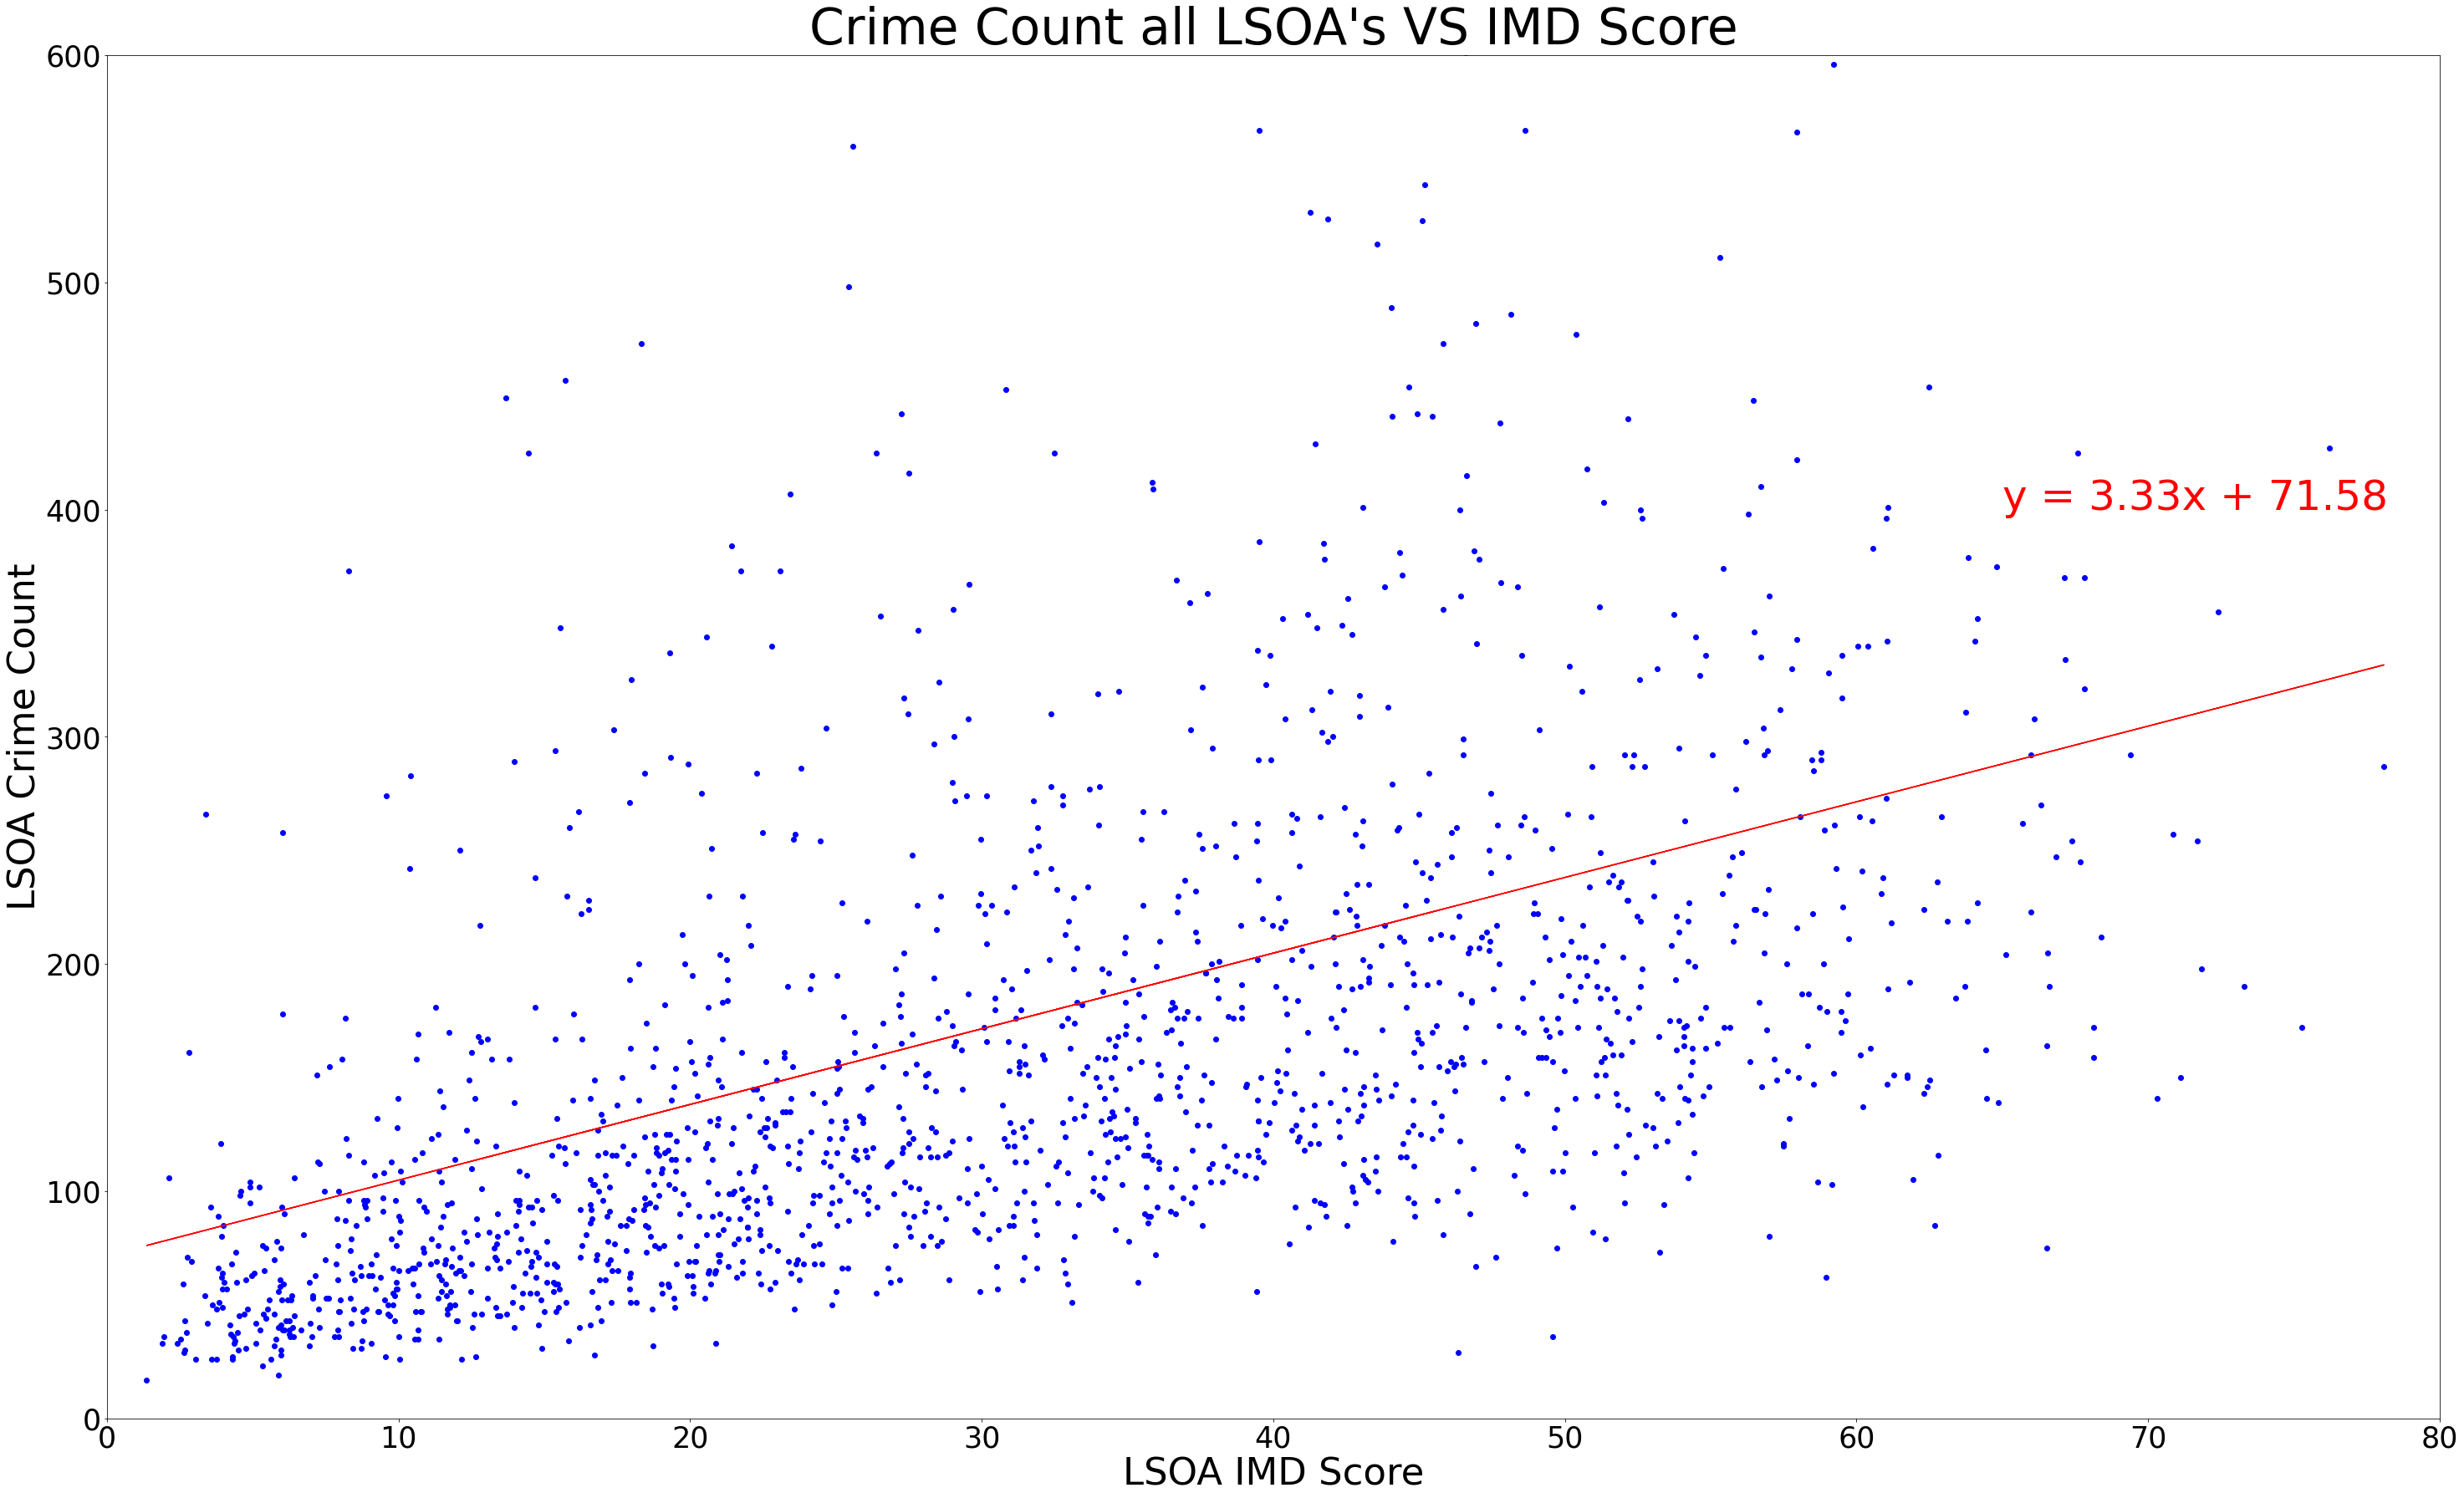

In [89]:
# Plot the scatter with lower lims
plt.title("Crime Count all LSOA's VS IMD Score", fontsize=60)
plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.rcParams["figure.figsize"] = (50,30)
plt.xlim(0,80)
plt.ylim(0, 600)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xlabel("LSOA IMD Score", fontsize=45)
plt.ylabel("LSOA Crime Count", fontsize=45)
plot_linear_regression(x_axis, y_axis, 'LSOA Crime Count',(65,400))
# Save the figure
plt.savefig("output/Crime Count all LSOA's VS IMD Score.png")
plt.show()

A scatter plot was chosen as we are working with a large dataset. This plot highlights a few outliers which for the statistical analysis can be omitted for the sake of finding out whether there is a correlation between the the LSOA crime count and LSOA IMD score. We have therefore reduced the y limits to 600 rather than over  4000 so that we can visualise any correlation and view the linear regression. 

The line of linear regression shows that there is a postive linear correlation but it is quite weak. 

The scatterplot shows that our hypothesis may not be correct. Whilst the amount of crimes increase the higher IMD score this is not uniform. There are also high crime rates in LSOAs with low IMD scores. 

We also recognise that crime is only one measurement used to created the IMD score. 

We also decided to see if there was any difference in correlation when plotting each district individually.

In [42]:
# Create local authority District DataFrames
birmingham_df = LSOA_crime_count_df.loc[(LSOA_crime_count_df["District code (2019)"] == "E08000025")]
coventry_df = LSOA_crime_count_df.loc[(LSOA_crime_count_df["District code (2019)"] == "E08000026")]
solihull_df = LSOA_crime_count_df.loc[(LSOA_crime_count_df["District code (2019)"] == "E08000029")]
sandwell_df = LSOA_crime_count_df.loc[(LSOA_crime_count_df["District code (2019)"] == "E08000028")]
dudley_df = LSOA_crime_count_df.loc[(LSOA_crime_count_df["District code (2019)"] == "E08000027")]
wolverhampton_df = LSOA_crime_count_df.loc[(LSOA_crime_count_df["District code (2019)"] == "E08000031")]
walsall_df = LSOA_crime_count_df.loc[(LSOA_crime_count_df["District code (2019)"] == "E08000030")]

Birmingham scatterplot to show LSOA crime count Vs LSOA IMD score

The r-value is: 0.023710532323882004


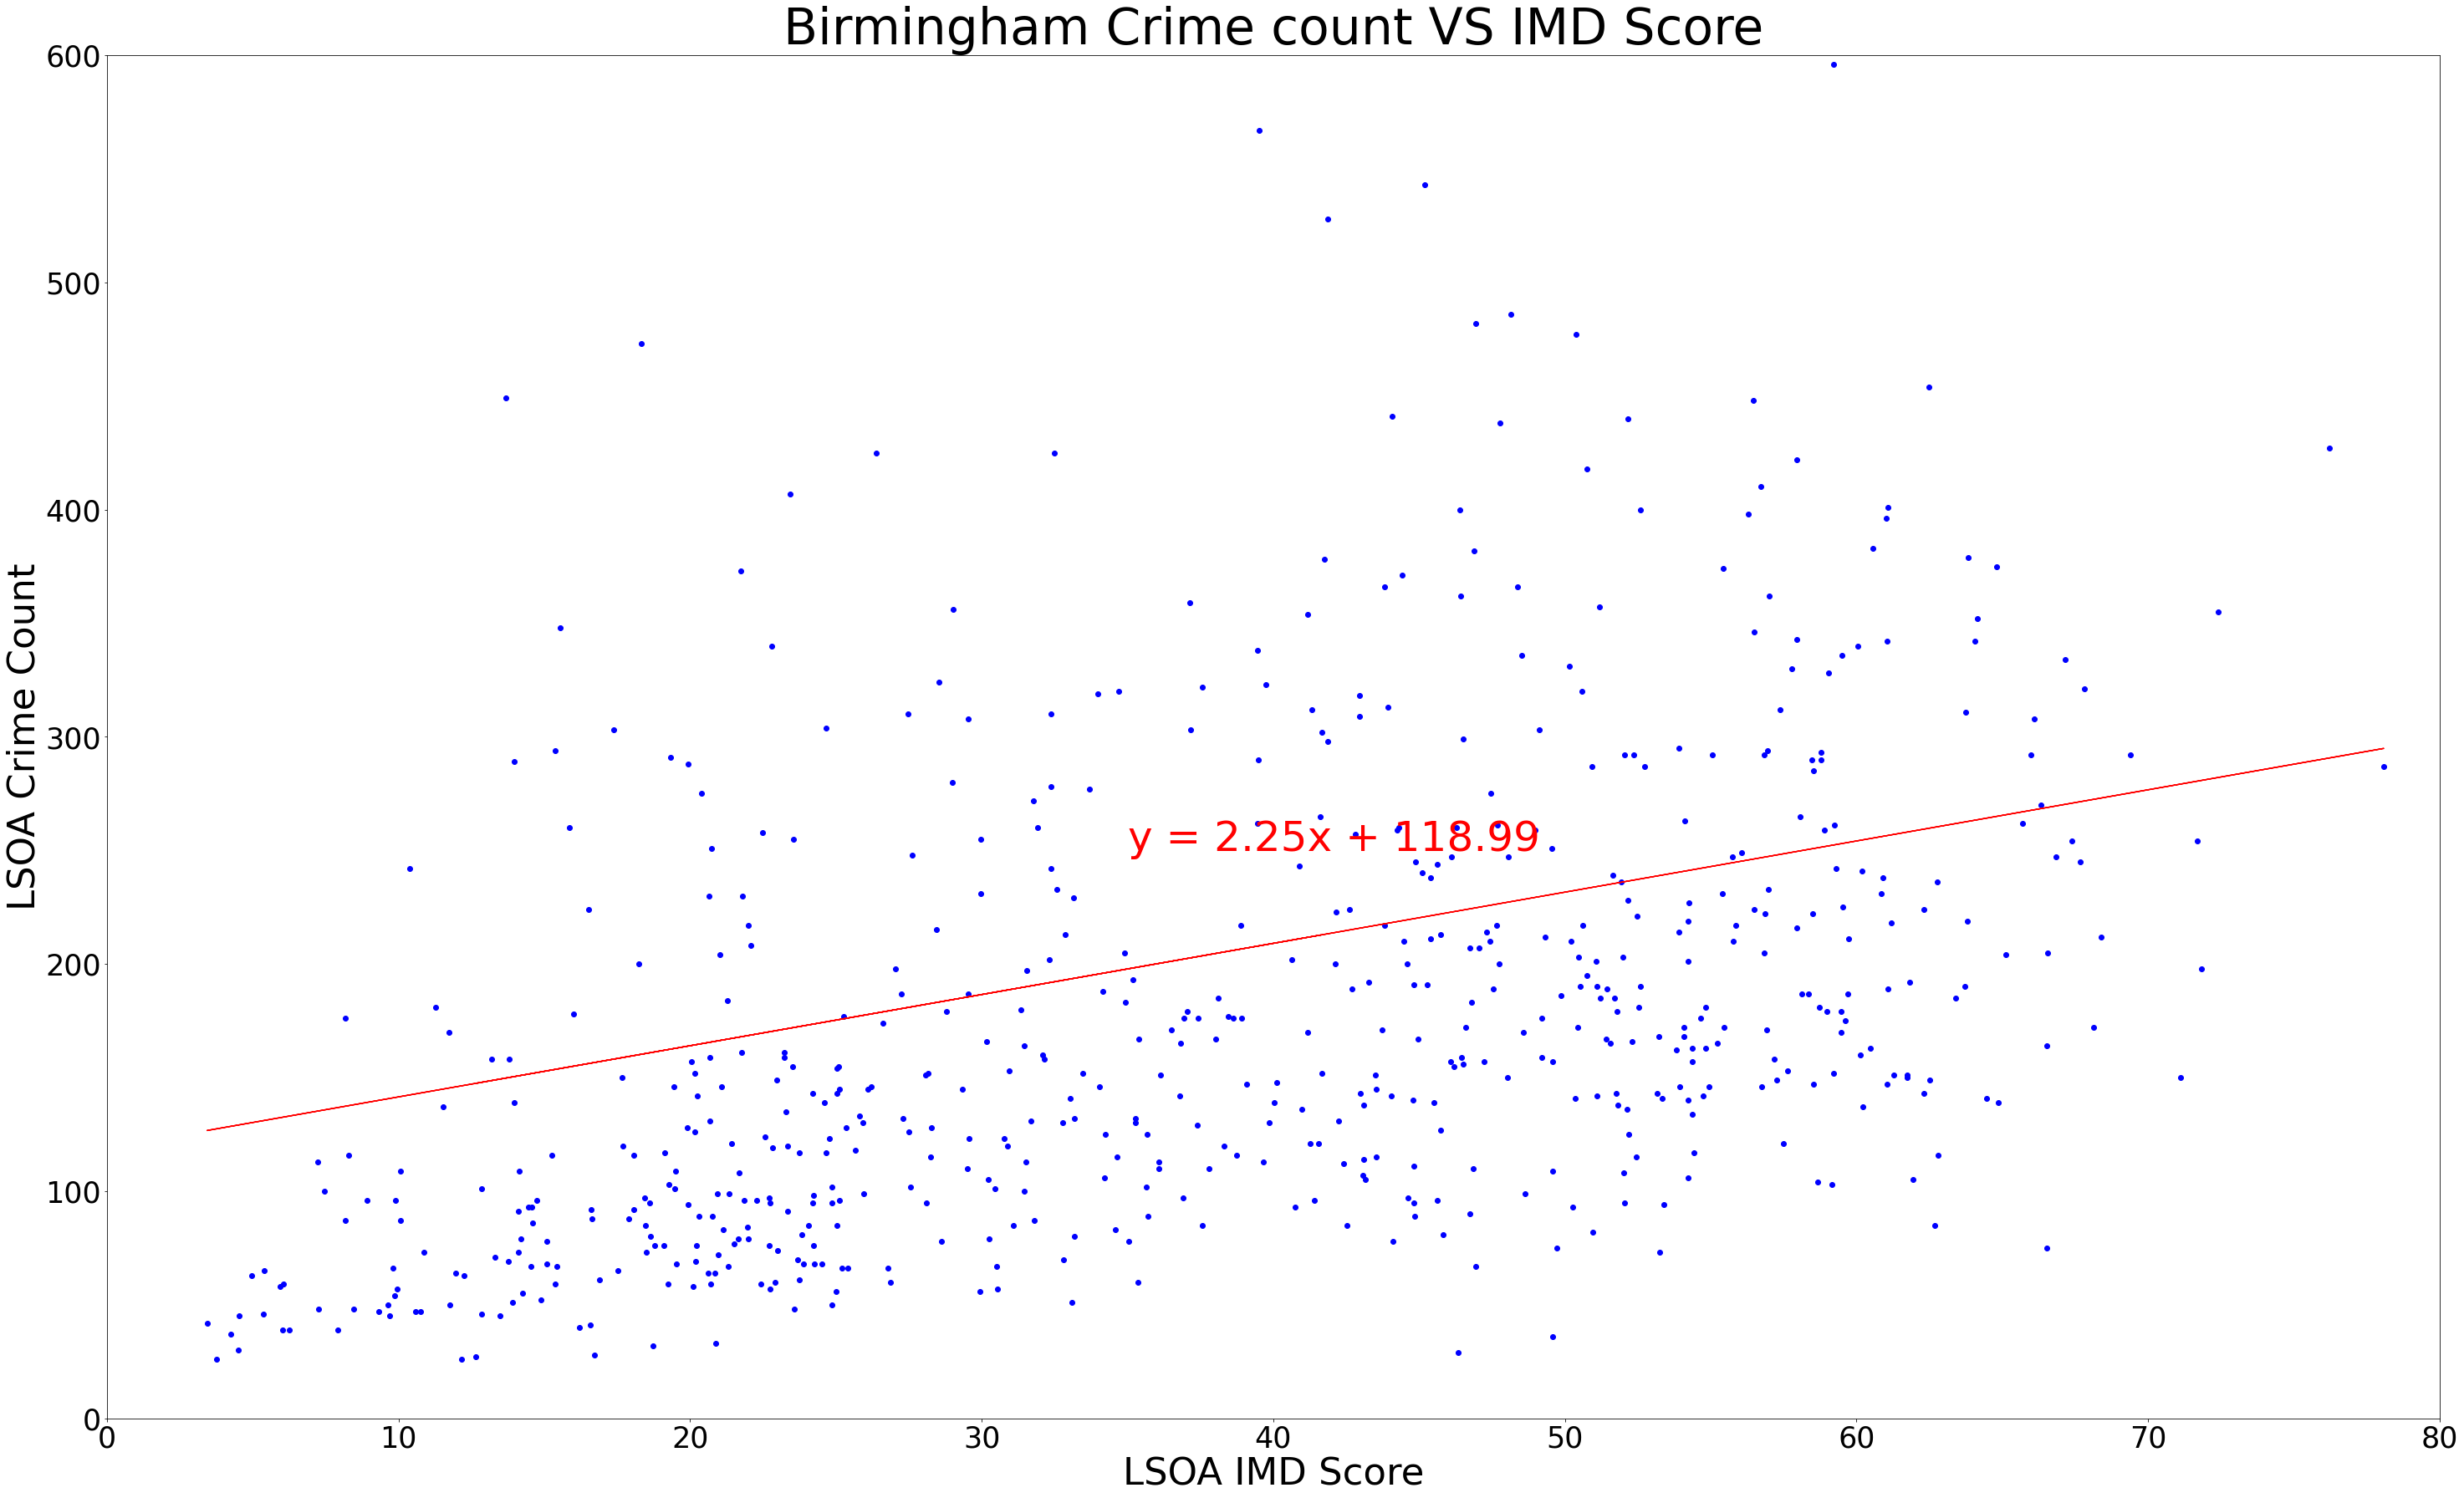

In [43]:
# Scatter plot to show results
y_axis = birmingham_df["LSOA crime count"]
x_axis = birmingham_df["LSOA IMD Score"]
# Create a function to create Linear Regression plots
def plot_linear_regression(x_axis, y_axis, title, text_coordinates):
    
    # Run the regresson
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=50,color="red")
    print(f"The r-value is: {rvalue**2}")
 # Linear regression?
#slope, intercept, r, p, se = stats.linregress(str(x_axis), str(y_axis))
#y_fit = slope*x_axis + intercept

plt.title("Birmingham Crime count VS IMD Score", fontsize=60)
plt.scatter(x_axis, y_axis, marker="o", color="blue")
#plt.plot(x_axis, y_fit)
plt.rcParams["figure.figsize"] = (50,30)
plt.xlim(0,80)
plt.ylim(0, 600)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xlabel("LSOA IMD Score", fontsize=45)
plt.ylabel("LSOA Crime Count", fontsize=45)
plot_linear_regression(x_axis, y_axis, 'LSOA Crime Count',(35,250))
plt.savefig("output/Birmingham Crime count VS IMD Score.png")
plt.show()

The r value for the Birmingham scatterplot is lower than the r value for the total districts. This shows that there is an even weaker linear correlation and suggests that there would be more crime counts in areas with lower IMD scores. This plot also shows that for all areas regardless of IMD score there tends to be lower level of crimes.

Coventry scatterplot to show LSOA crime count Vs LSOA IMD score.

The r-value is: 0.0699633659112474


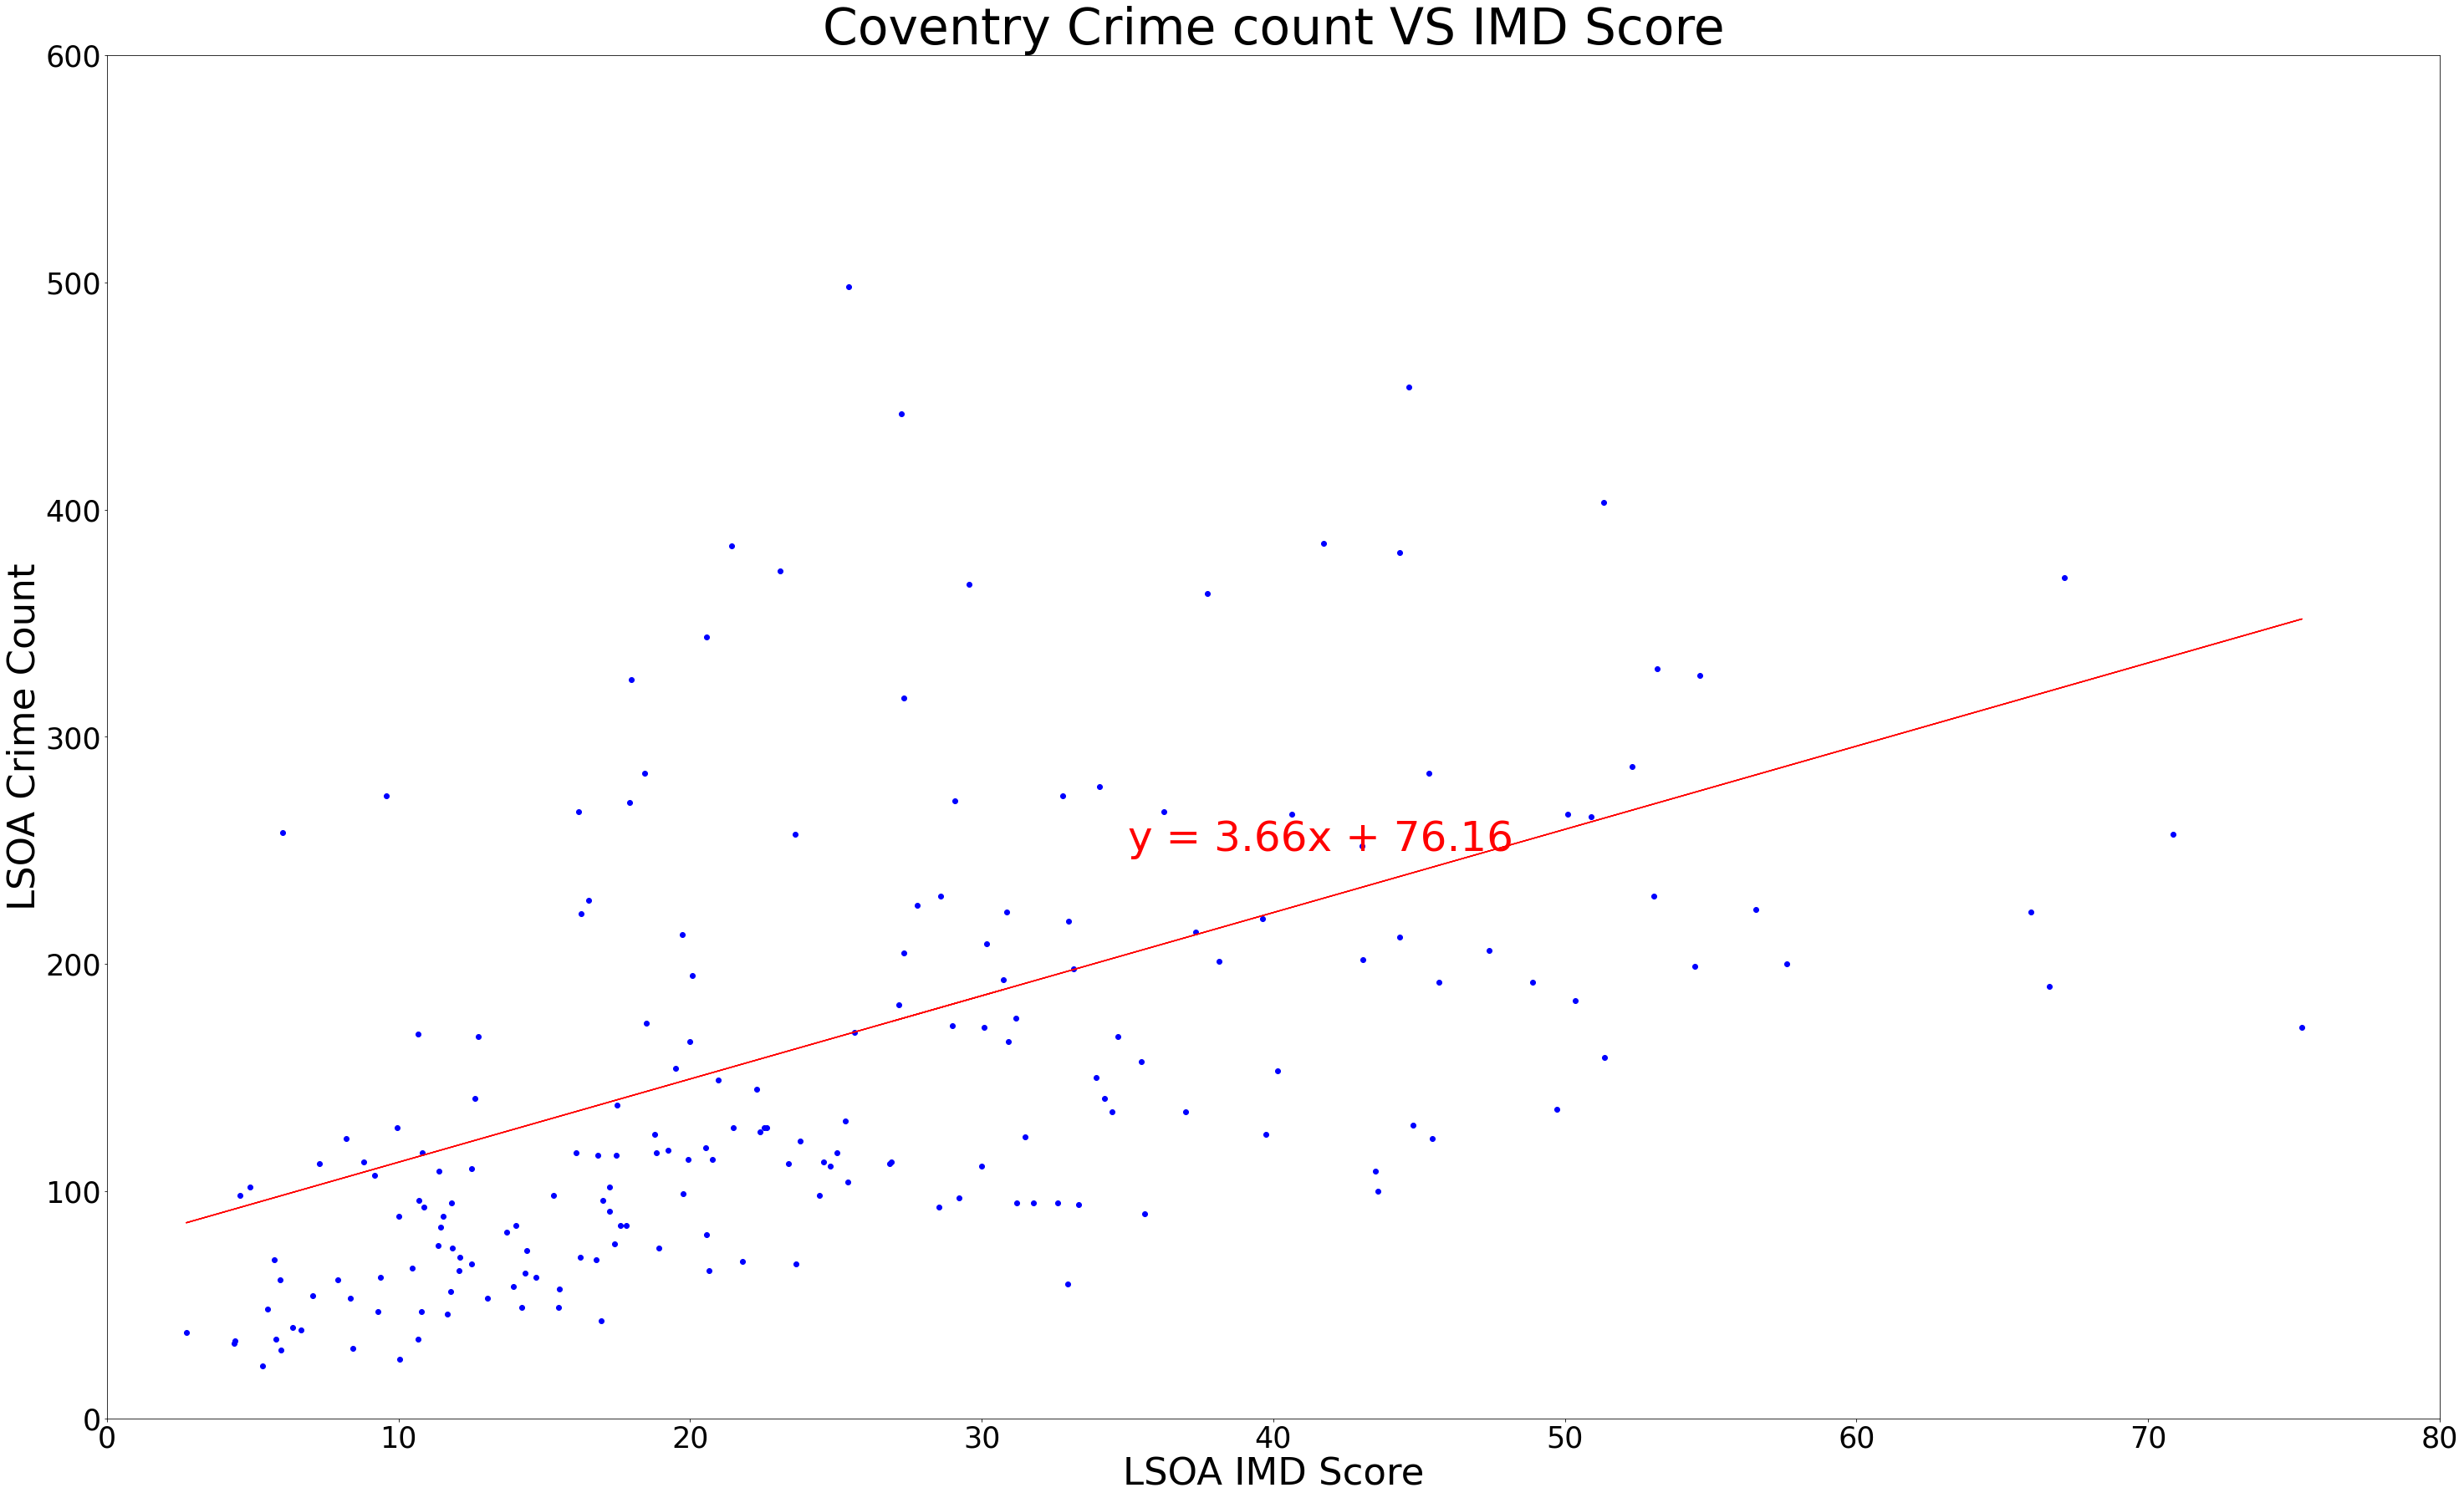

In [44]:
# Scatter plot to show results
y_axis = coventry_df["LSOA crime count"]
x_axis = coventry_df["LSOA IMD Score"]
# Create a function to create Linear Regression plots
def plot_linear_regression(x_axis, y_axis, title, text_coordinates):
    
    # Run the regresson
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=50,color="red")
    print(f"The r-value is: {rvalue**2}")
 # Linear regression?
#slope, intercept, r, p, se = stats.linregress(str(x_axis), str(y_axis))
#y_fit = slope*x_axis + intercept

plt.title("Coventry Crime count VS IMD Score", fontsize=60)
plt.scatter(x_axis, y_axis, marker="o", color="blue")
#plt.plot(x_axis, y_fit)
plt.rcParams["figure.figsize"] = (50,30)
plt.xlim(0,80)
plt.ylim(0, 600)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xlabel("LSOA IMD Score", fontsize=45)
plt.ylabel("LSOA Crime Count", fontsize=45)
plot_linear_regression(x_axis, y_axis, 'LSOA Crime Count',(35,250))
plt.savefig("output/Coventry Crime count VS IMD Score.png")
plt.show()

The Coventry scatterplot shows that there are fewer crimes in areas with a LMD score but there are also a significant proportion of LSOAs that see higher number of crimes the higher the LMD score. The r value for this plot is very similar to the overall district plot which shows a weak postive linear correlation. 

Solihull scatterplot to show LSOA crime count Vs LSOA IMD score.

The r-value is: 0.0727372106774209


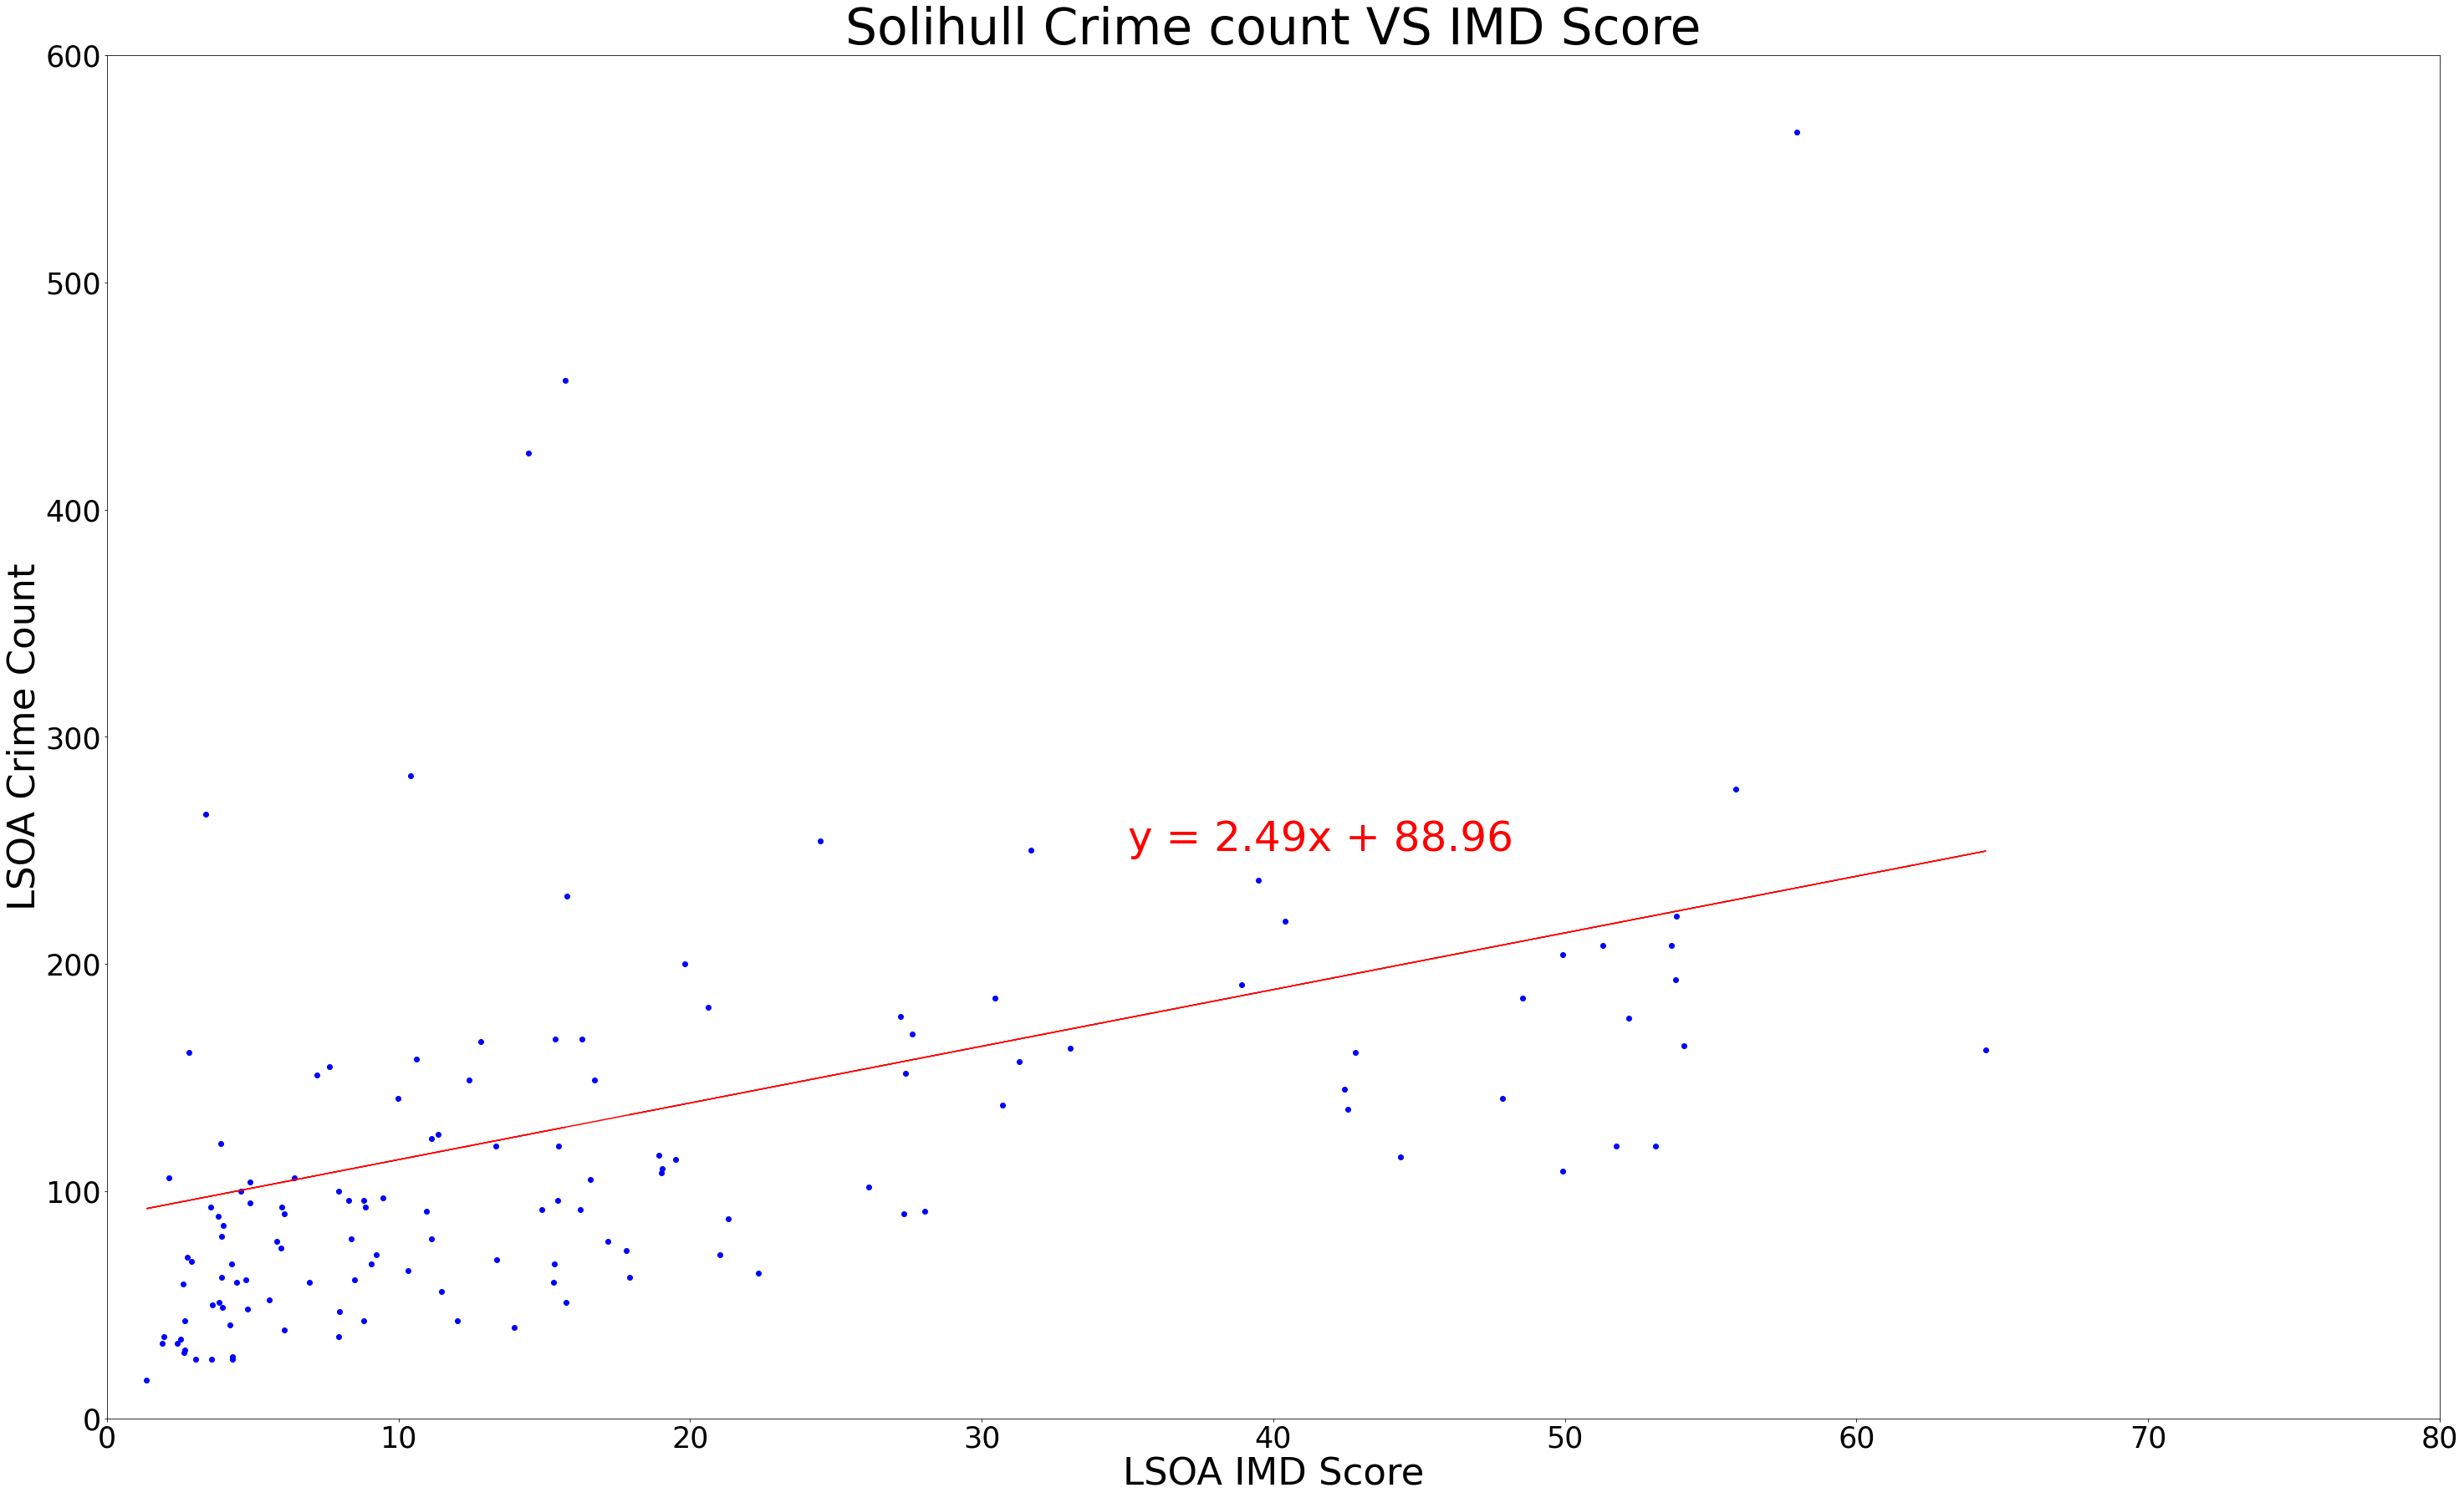

In [45]:
# Scatter plot to show results
y_axis = solihull_df["LSOA crime count"]
x_axis = solihull_df["LSOA IMD Score"]
# Create a function to create Linear Regression plots
def plot_linear_regression(x_axis, y_axis, title, text_coordinates):
    
    # Run the regresson
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=50,color="red")
    print(f"The r-value is: {rvalue**2}")
 # Linear regression?
#slope, intercept, r, p, se = stats.linregress(str(x_axis), str(y_axis))
#y_fit = slope*x_axis + intercept

plt.title("Solihull Crime count VS IMD Score", fontsize=60)
plt.scatter(x_axis, y_axis, marker="o", color="blue")
#plt.plot(x_axis, y_fit)
plt.rcParams["figure.figsize"] = (50,30)
plt.xlim(0,80)
plt.ylim(0, 600)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xlabel("LSOA IMD Score", fontsize=45)
plt.ylabel("LSOA Crime Count", fontsize=45)
plot_linear_regression(x_axis, y_axis, 'LSOA Crime Count',(35,250))
plt.savefig("output/Solihull Crime count VS IMD Score.png")
plt.show()

Solihull has a r value simialr to the district plot as a whole. This shows that there is a weak oistive correlation between LSOA IMD score and crime rate. There are more LSOAs that have a lower LMD score and low crime rate levels. 

Sandwell scatterplot to show LSOA crime count Vs LSOA IMD score.

The r-value is: 0.12050199683385551


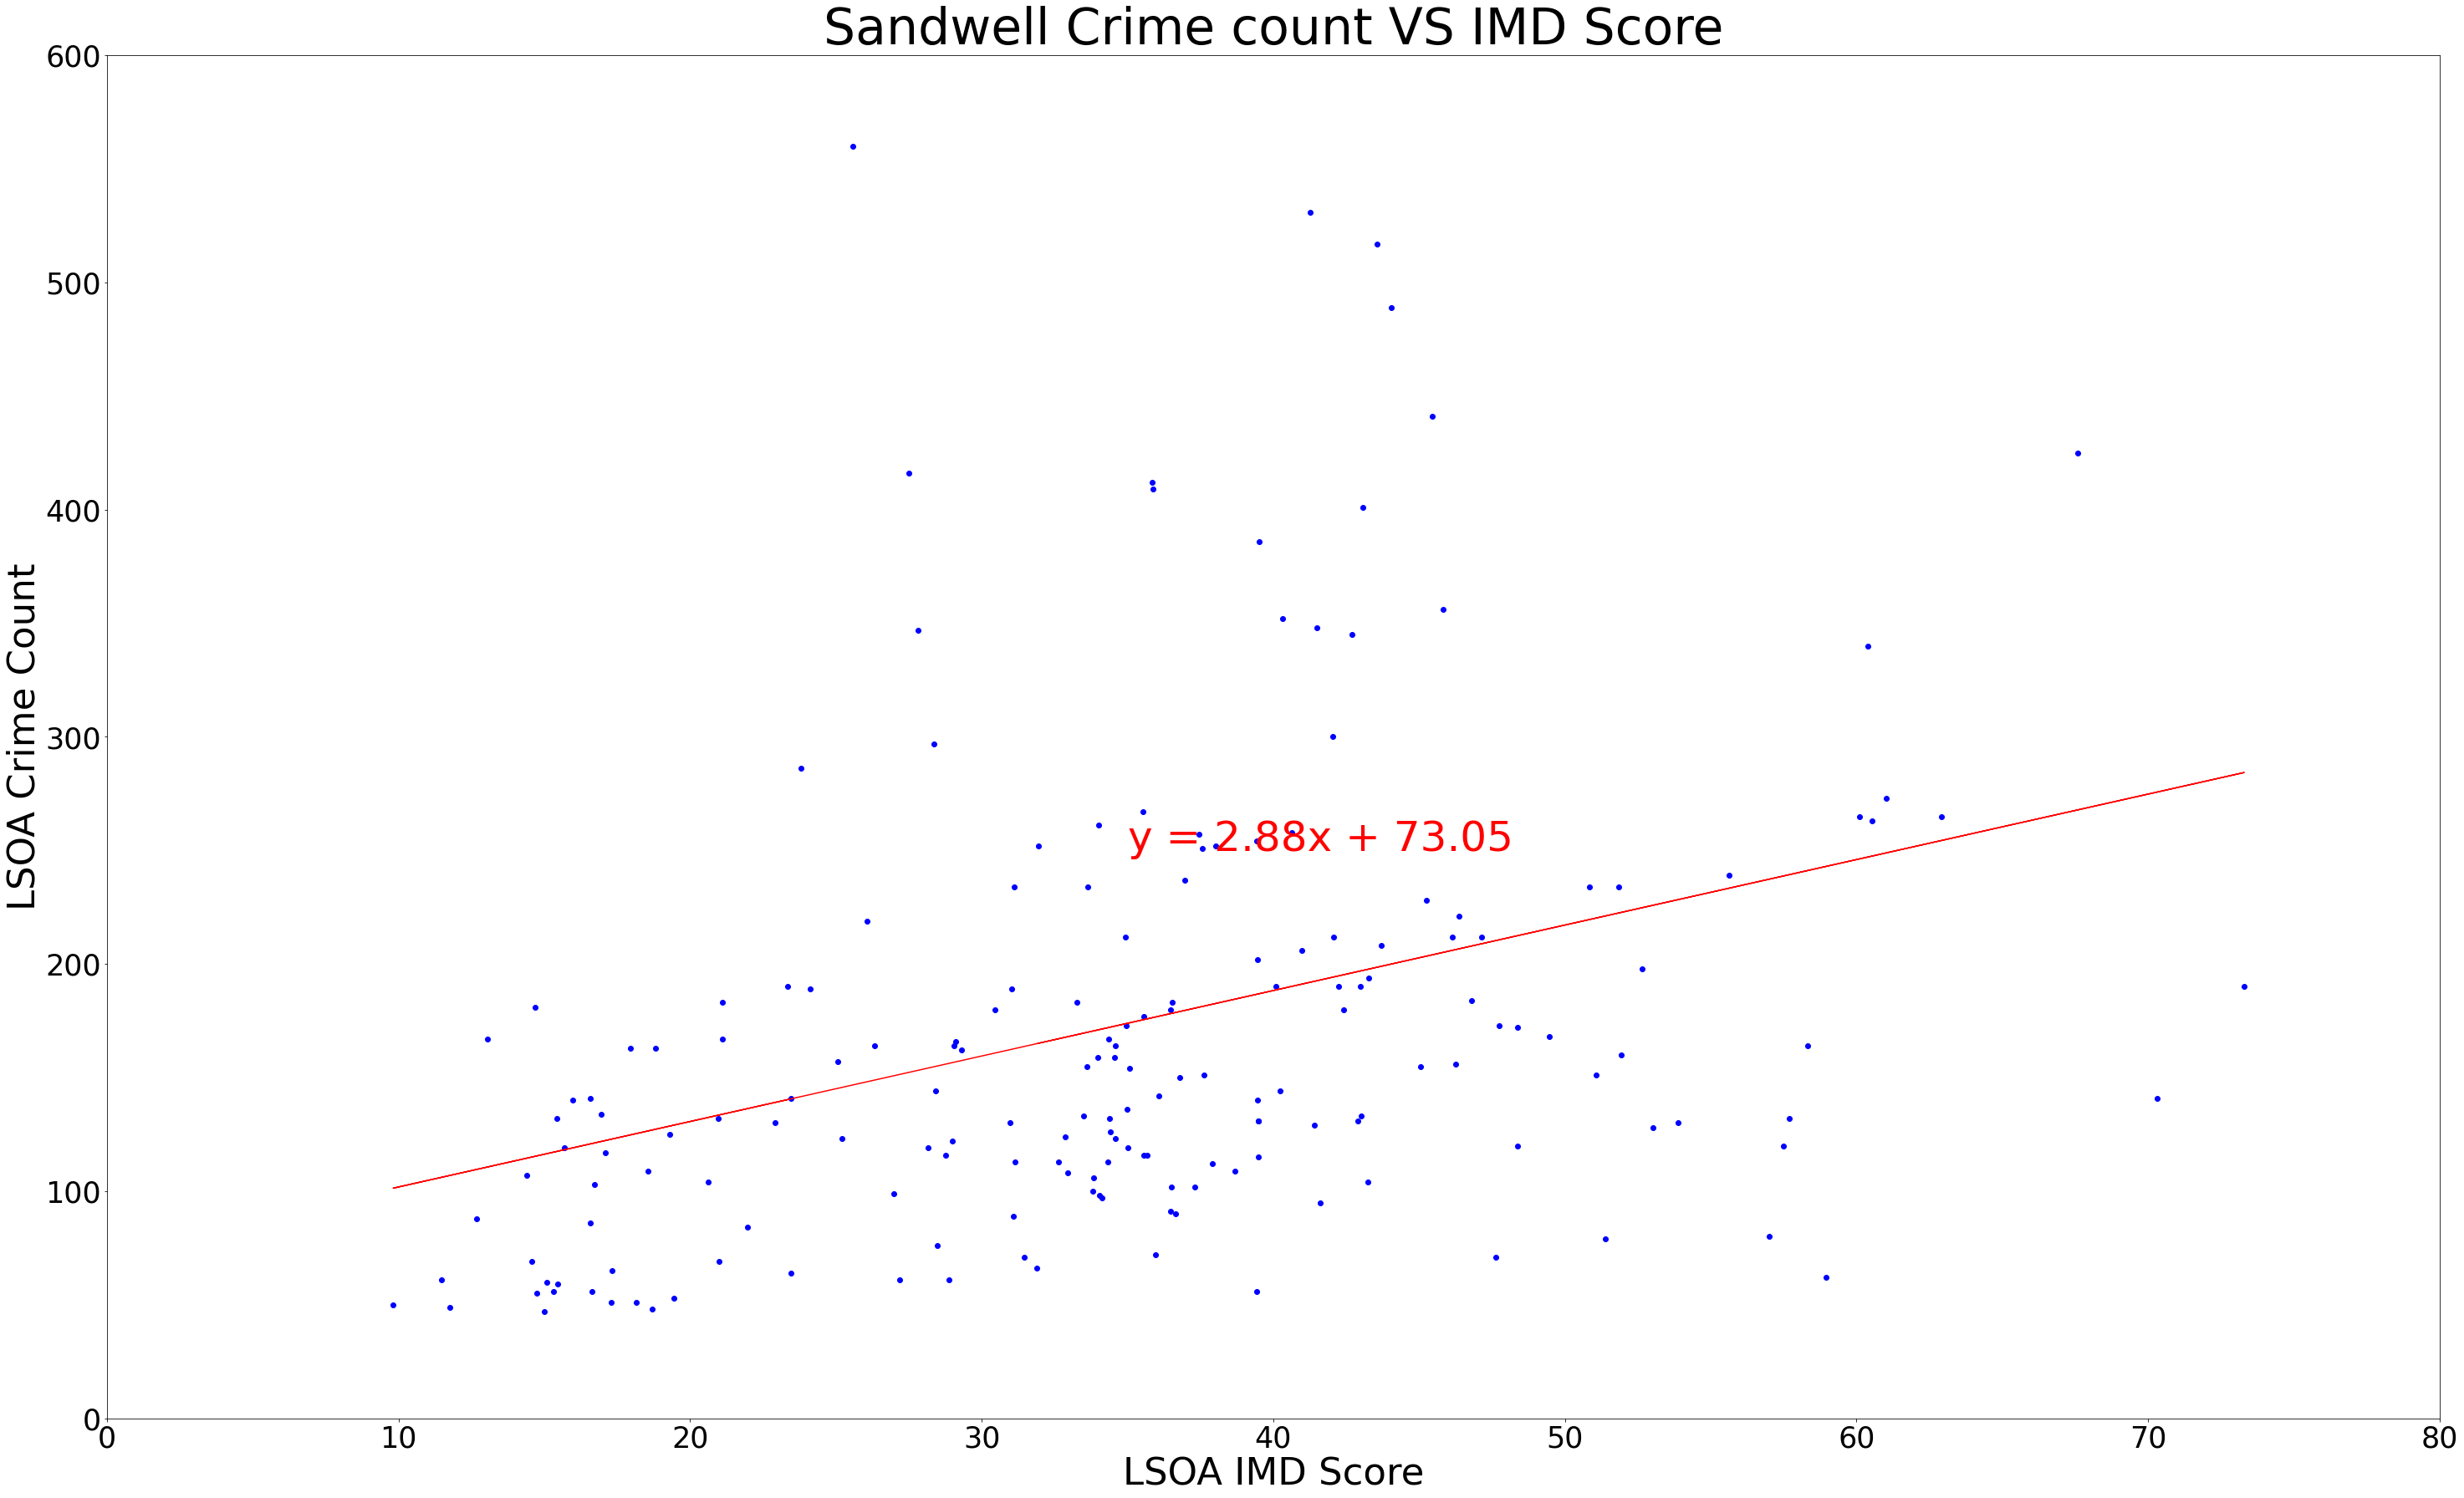

In [46]:
# Scatter plot to show results
y_axis = sandwell_df["LSOA crime count"]
x_axis = sandwell_df["LSOA IMD Score"]
# Create a function to create Linear Regression plots
def plot_linear_regression(x_axis, y_axis, title, text_coordinates):
    
    # Run the regresson
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=50,color="red")
    print(f"The r-value is: {rvalue**2}")
 # Linear regression?
#slope, intercept, r, p, se = stats.linregress(str(x_axis), str(y_axis))
#y_fit = slope*x_axis + intercept

plt.title("Sandwell Crime count VS IMD Score", fontsize=60)
plt.scatter(x_axis, y_axis, marker="o", color="blue")
#plt.plot(x_axis, y_fit)
plt.rcParams["figure.figsize"] = (50,30)
plt.xlim(0,80)
plt.ylim(0, 600)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xlabel("LSOA IMD Score", fontsize=45)
plt.ylabel("LSOA Crime Count", fontsize=45)
plot_linear_regression(x_axis, y_axis, 'LSOA Crime Count',(35,250))
plt.savefig("output/Sandwell Crime count VS IMD Score.png")
plt.show()

The Sandwell scatterplot shows that there aren't any LSOAs with an IMD score below 10. Despite this the r value shows the weakest correlation of all districts. This suggests that in Sandwell the crime count does not correlate with the IMD score and that crime occurs in all LSOAs - although this plot is similar to the other districts in that there are not many LSOAs that witness more than 300 counts of crime in 2019.

Walsall scatterplot to show LSOA crime count Vs LSOA IMD score.

The r-value is: 0.23456502362470835


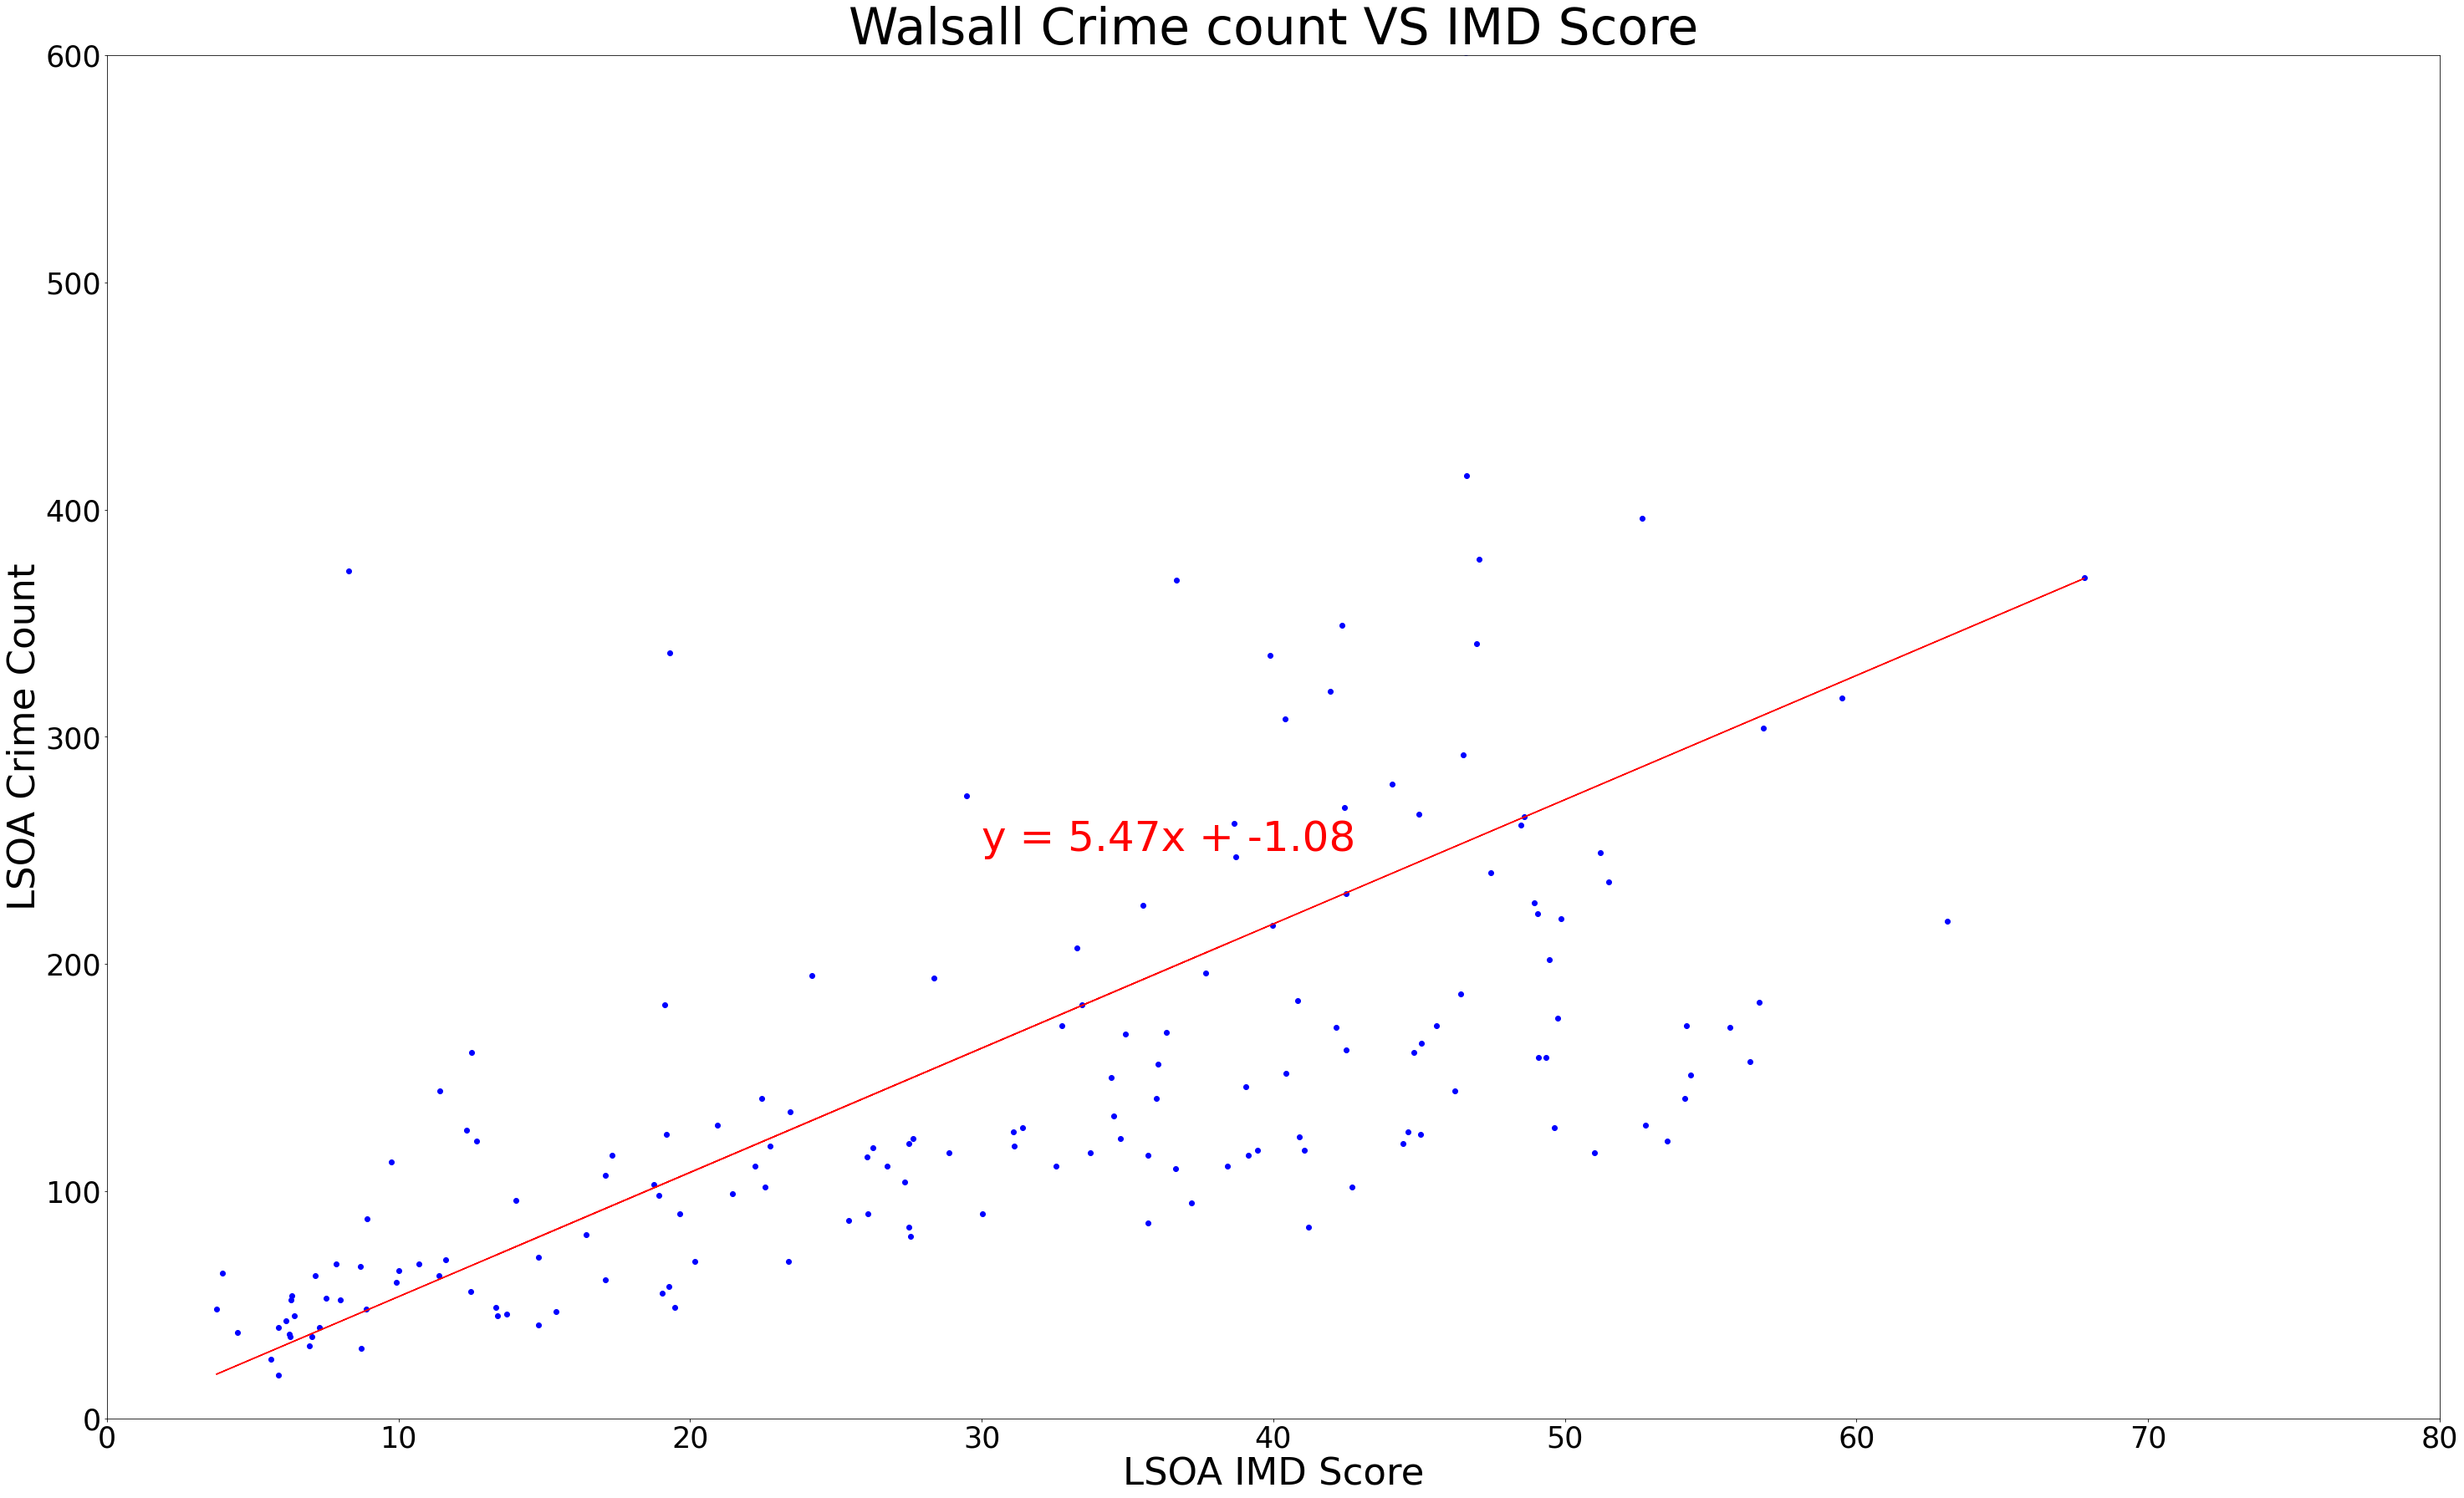

In [47]:
# Scatter plot to show results
y_axis = walsall_df["LSOA crime count"]
x_axis = walsall_df["LSOA IMD Score"]
# Create a function to create Linear Regression plots
def plot_linear_regression(x_axis, y_axis, title, text_coordinates):
    
    # Run the regresson
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=50,color="red")
    print(f"The r-value is: {rvalue**2}")
 # Linear regression?
#slope, intercept, r, p, se = stats.linregress(str(x_axis), str(y_axis))
#y_fit = slope*x_axis + intercept

plt.title("Walsall Crime count VS IMD Score", fontsize=60)
plt.scatter(x_axis, y_axis, marker="o", color="blue")
#plt.plot(x_axis, y_fit)
plt.rcParams["figure.figsize"] = (50,30)
plt.xlim(0,80)
plt.ylim(0, 600)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xlabel("LSOA IMD Score", fontsize=45)
plt.ylabel("LSOA Crime Count", fontsize=45)
plot_linear_regression(x_axis, y_axis, 'LSOA Crime Count',(30,250))
plt.savefig("output/Walsall Crime count VS IMD Score.png")
plt.show()

The Walsall r value shows the strongest positive liner correlation. This supports our hypothesis that the higher the IMD score the greater the crime count. 

Wolverhampton scatterplot to show LSOA crime count Vs LSOA IMD score.

The r-value is: 0.0801222228288147


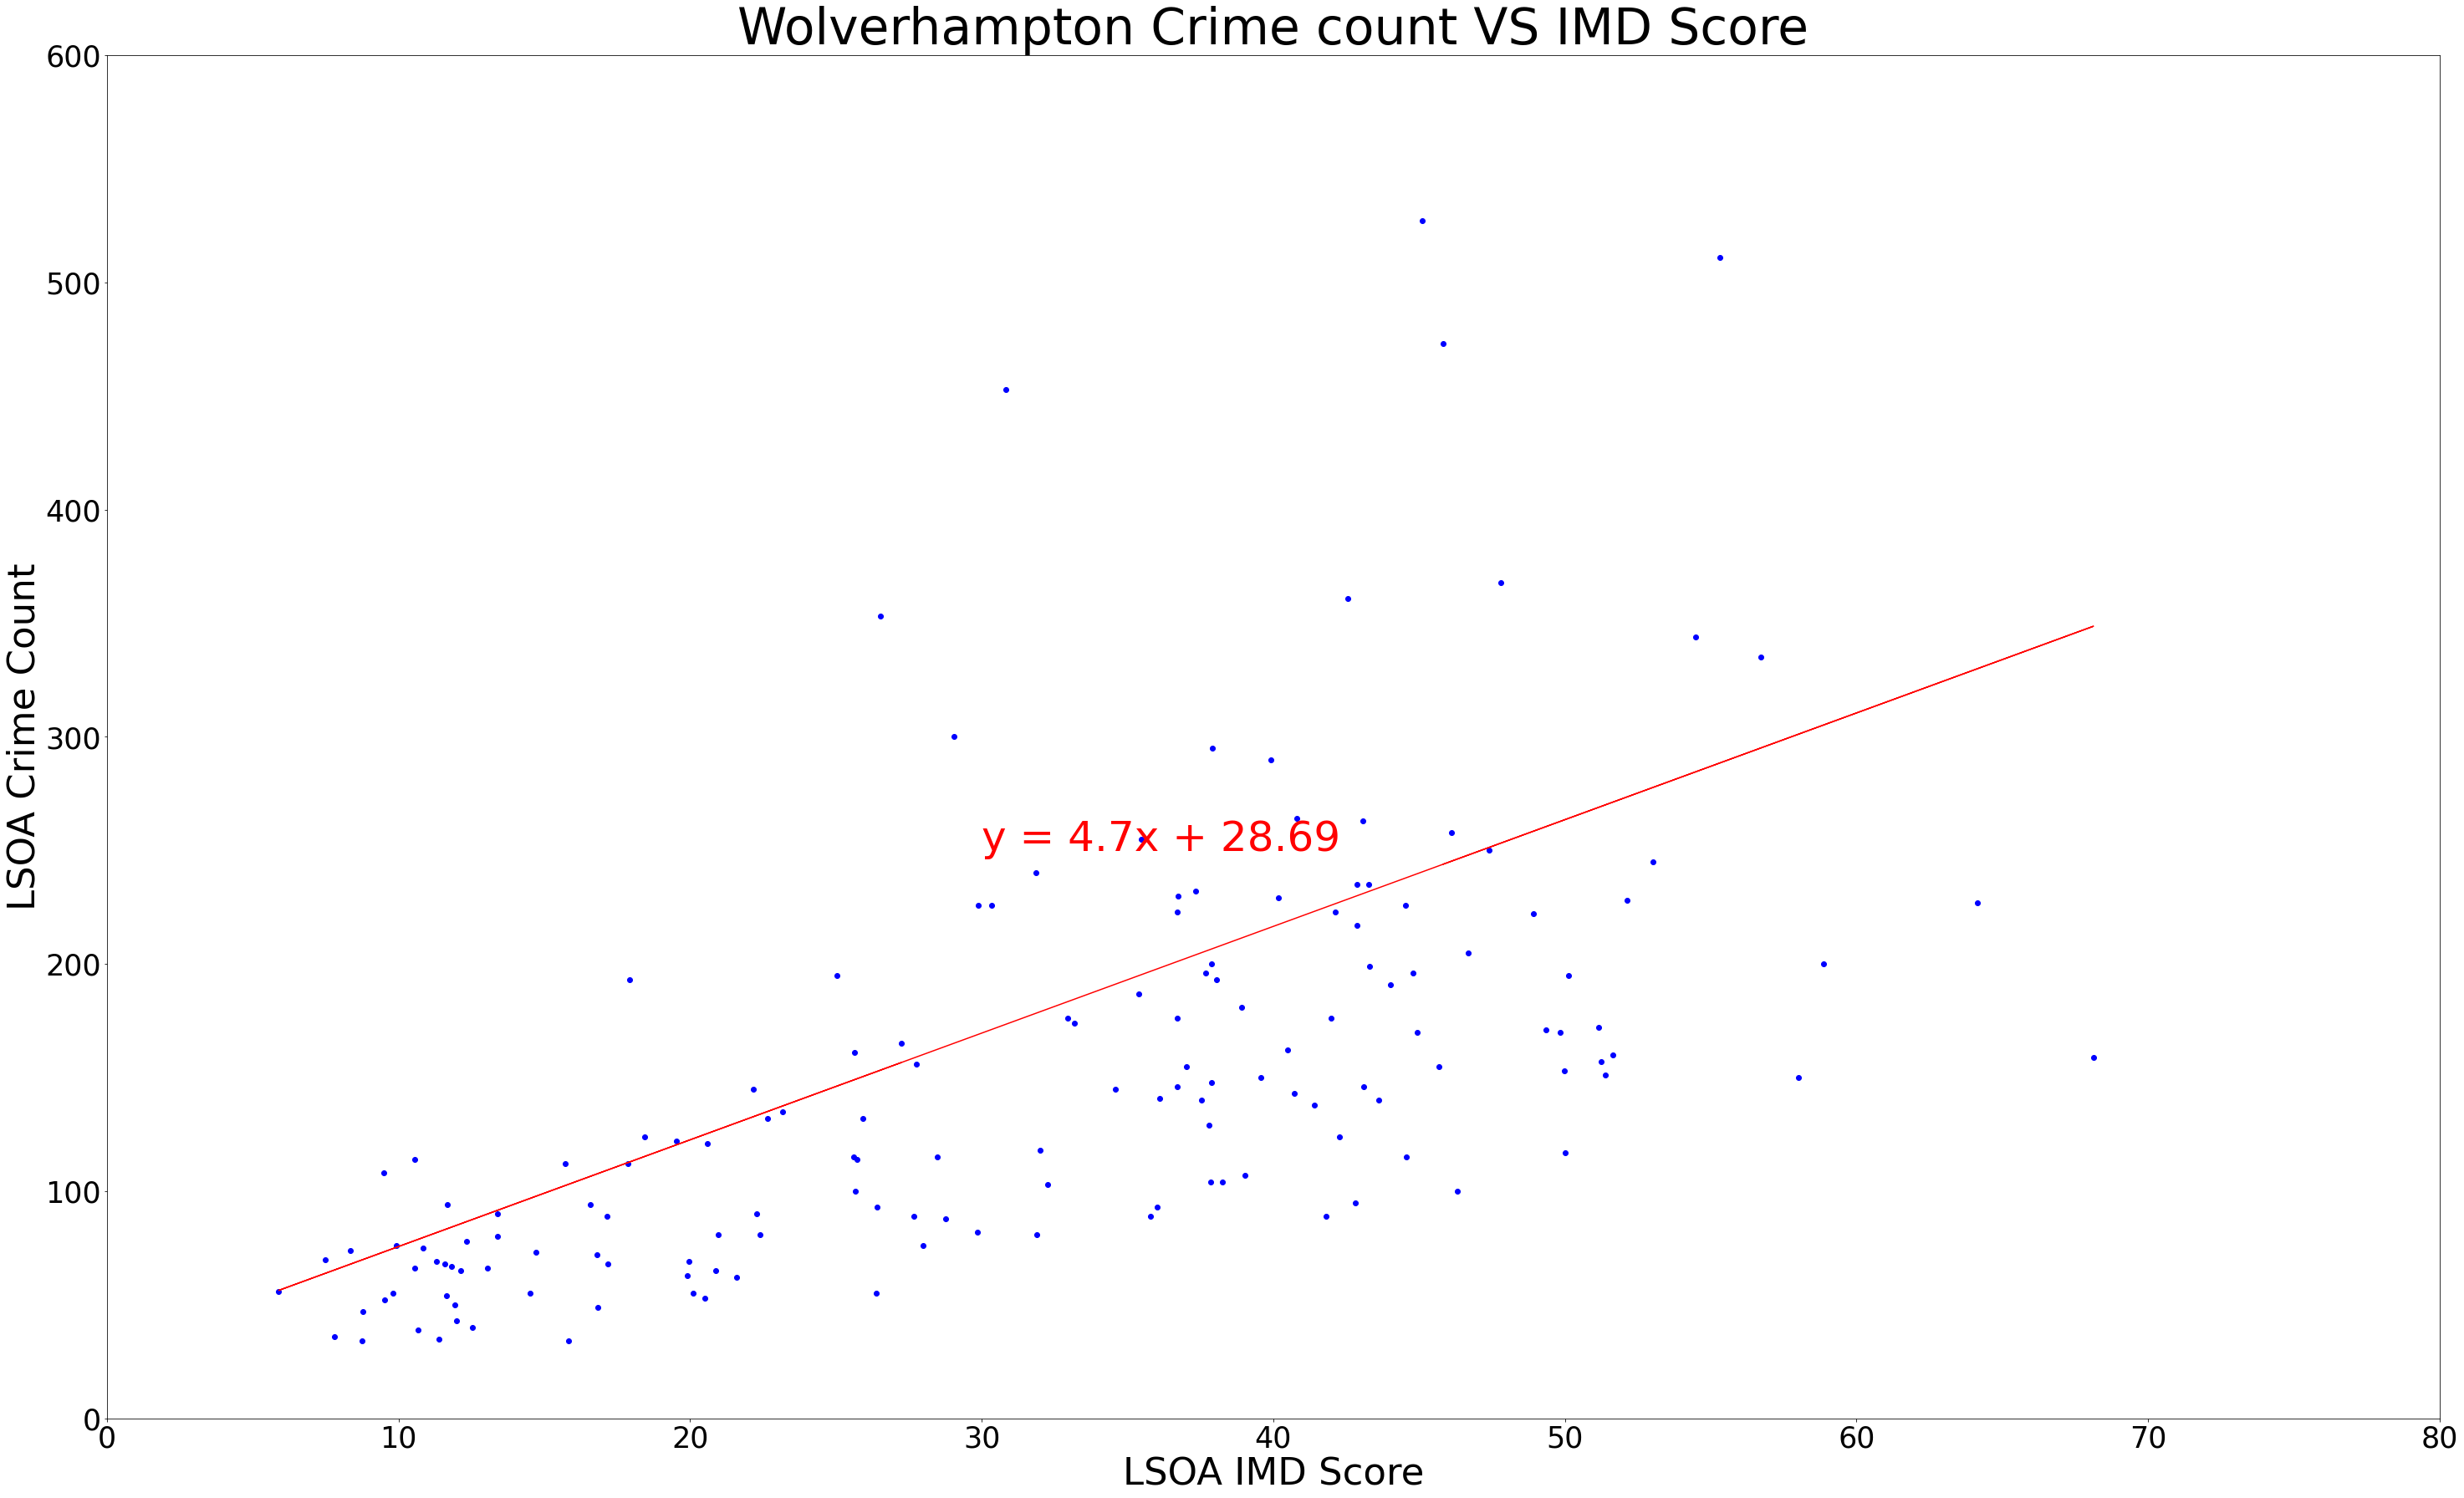

In [48]:
# Scatter plot to show results
y_axis = wolverhampton_df["LSOA crime count"]
x_axis = wolverhampton_df["LSOA IMD Score"]
# Create a function to create Linear Regression plots
def plot_linear_regression(x_axis, y_axis, title, text_coordinates):
    
    # Run the regresson
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=50,color="red")
    print(f"The r-value is: {rvalue**2}")
 # Linear regression?
#slope, intercept, r, p, se = stats.linregress(str(x_axis), str(y_axis))
#y_fit = slope*x_axis + intercept

plt.title("Wolverhampton Crime count VS IMD Score", fontsize=60)
plt.scatter(x_axis, y_axis, marker="o", color="blue")
#plt.plot(x_axis, y_fit)
plt.rcParams["figure.figsize"] = (50,30)
plt.xlim(0,80)
plt.ylim(0, 600)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xlabel("LSOA IMD Score", fontsize=45)
plt.ylabel("LSOA Crime Count", fontsize=45)
plot_linear_regression(x_axis, y_axis, 'LSOA Crime Count',(30,250))
plt.savefig("output/Wolverhampton Crime count VS IMD Score.png")
plt.show()

Again, the Wolverhampton scatterplot is similar to the overall district plot. It shows a weak postive correlation with the majority of LSOA witnessing less than 300 counts of crime in 2019.

Overall, these scatterplots show that there is a weak positive correlation between LSOA Index of Multiple Deprivation score and crime count. Walsall has the strongest positive correlation and this supports our hypothesis. The other districts do not tend to have a signifcantly maority of LSOAs that have crime counts higher than 300. Sandwell had the weakest linear correlation with higher counts of crime in all LSOAs. This highlights that not all areas with a high deprivation score have high crime counts, and vice versa, the areas with lower deprivation levels still see high levels of crime. 

We will continue this analysis by looking into which areas have higher rates of different types of crime. This may allow us to understand why we haven not seen a strong positive correlation as expected. 

## Research Question 2: Which district and Lower Layer Super Output Areas (LSOAs) have higher rates of crime?

In [49]:
# Groupby district
d = {"LSOA name": "first", "Crime ID": "count", "Population": "first", "Index of Multiple Deprivation (IMD)": "first"}
District_crime_count_df = West_midlands_df1.groupby(["District code (2019)"], as_index=False).agg(d)

# Rename columns
District_crime_count_df = District_crime_count_df.rename(columns={"Crime ID":"District crime count"})

# Total District Crime Count 
Total_crime_sum = District_crime_count_df["District crime count"].sum()

# Total Population for all Districts 
Total_pop = District_crime_count_df["Population"].sum()

# Change District Crime Count and population to percentages to plot them on the same bar plot
District_pop = District_crime_count_df["Population"].div(Total_pop)*100
District_crime = District_crime_count_df["District crime count"].div(Total_crime_sum)*100

# Dataframe with added percentages 
District_crime_count_df["District Population %"] = District_pop
District_crime_count_df["District Crime Count %"] = District_crime

District_crime_count_df


,District code (2019),LSOA name,District crime count,Population,Index of Multiple Deprivation (IMD),District Population %,District Crime Count %
0,E08000025,Birmingham 001A,130172,1073045.0,7,39.212888,44.045327
1,E08000026,Coventry 001A,32957,316960.0,3,11.582848,11.151414
2,E08000027,Dudley 001A,26491,312925.0,3,11.435395,8.963562
3,E08000028,Sandwell 001A,32282,308063.0,3,11.257720,10.923019
4,E08000029,Solihull 001A,17856,206674.0,5,7.552604,6.041801
5,E08000030,Walsall 001A,27862,269323.0,2,9.842022,9.427457
6,E08000031,Wolverhampton 001A,27921,249470.0,3,9.116523,9.447420


The above df presents an interesting pattern which we did not expect. Solihull has a lower district crime count overall but a higher index of multiple deprivation than districts such as Wolverhampton, Walsall, Dudley, Sanwell, and Coventry which have higher crime counts but lower IMD scores. 

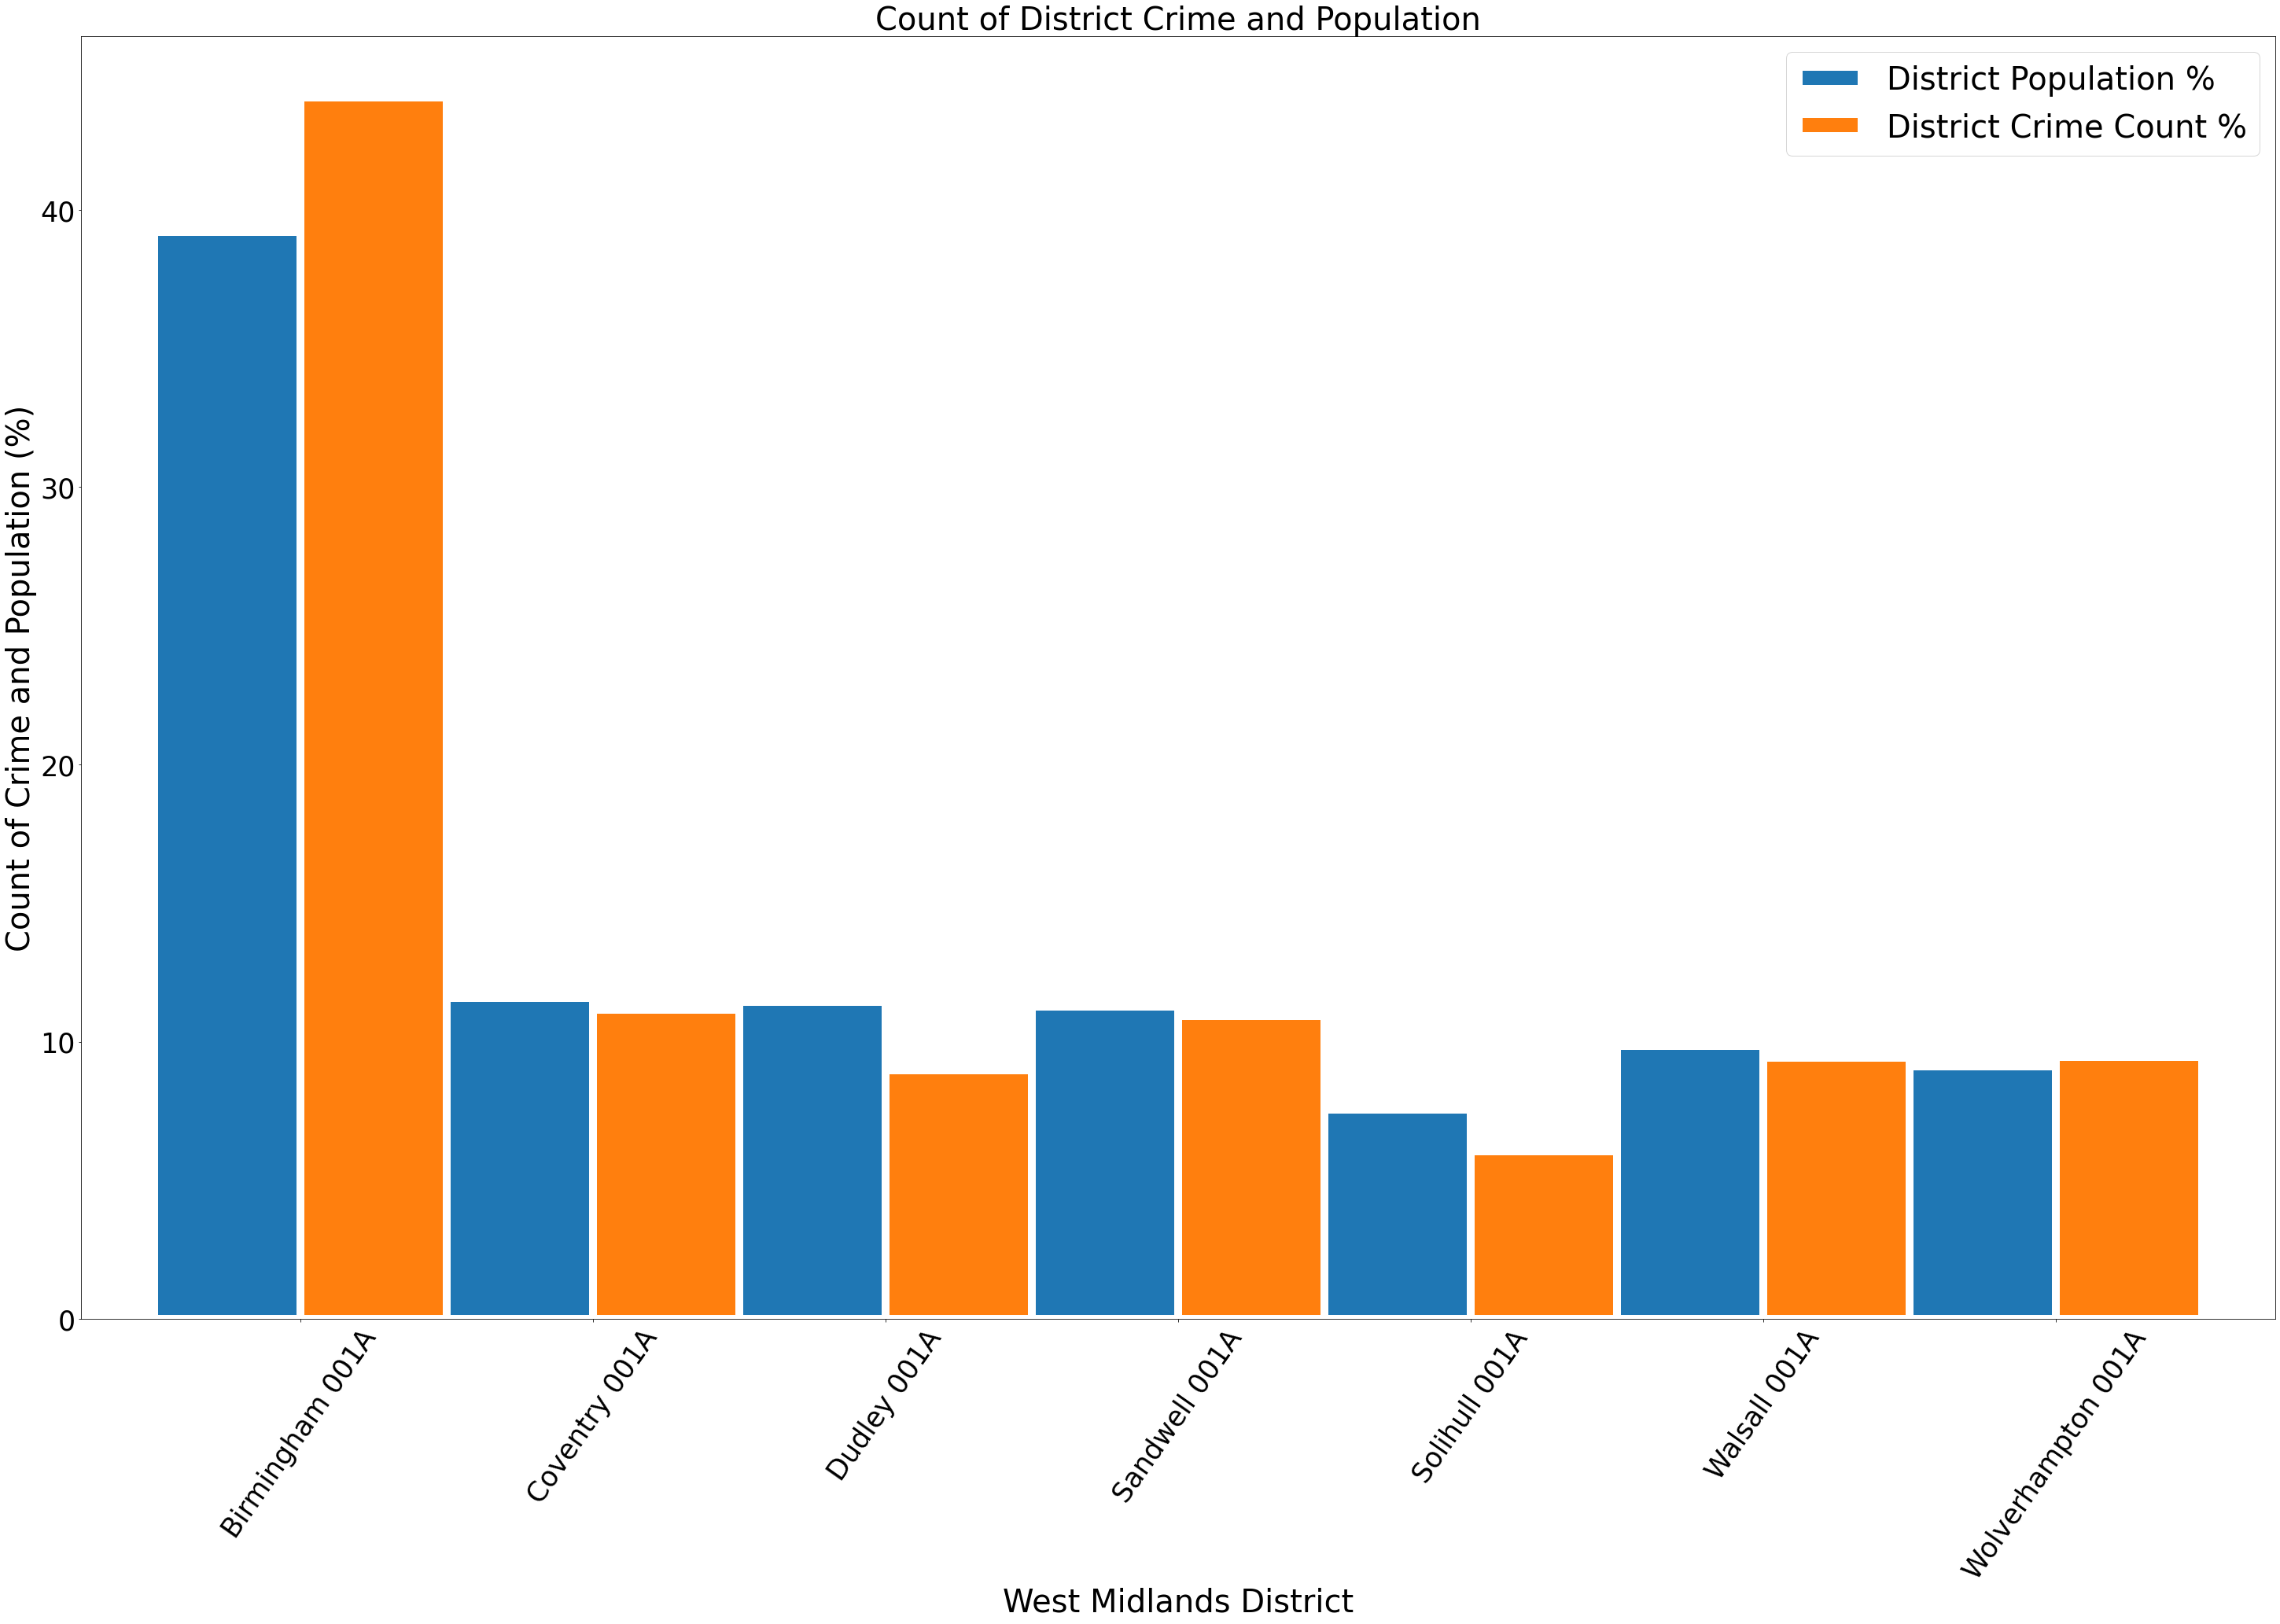

In [50]:
# Visualise data with bar plot 
District_crime_count_df.plot(x = "LSOA name", y = ["District Population %", "District Crime Count %"], kind ="bar", width=1, 
                             edgecolor="white", linewidth=10)

plt.title("Count of District Crime and Population", fontsize=40)
plt.xlabel("West Midlands District", fontsize=40)
plt.ylabel("Count of Crime and Population (%)", fontsize=40)
plt.xticks(rotation=55, fontsize=35)
plt.yticks(fontsize=35)
plt.legend(loc ="upper right", fontsize=40)
plt.tight_layout
plt.savefig("output/Count of Crime and Population (%).png")
plt.show()

The above bar plot shows that Birmingham sees the highest levels of crime by count but also shows that there is a higher percentage of crimes compared to the percentage of population in the West Midlands. This is also similar for Wolverhampton. This shows that the level of crime in Birmingham and Wolverhampton as districts is disproportionate to the population size. 

This bar chart also shows that it is significantly safer in Dudley and Solihull as the percentage of total crime is lower than the percentage of the total population.

We then wanted to measure the distribution of crime count across the different disricts. So we have used boxplots for each district to evidence this.

In [ ]:
# Birmingham boxplot 
plt.title("Total LSOA crime in Birmingham 2019")
plt.ylabel("Crime Count")
plt.boxplot(birmingham_df["LSOA crime count"])
plt.show()

In [ ]:
# Coventry boxplot 
plt.title("Total LSOA crime in Coventry 2019")
plt.ylabel("Crime Count")
plt.boxplot(coventry_df["LSOA crime count"])
plt.show()

In [ ]:
# Solihull boxplot 
plt.title("Total LSOA crime in Solihull 2019")
plt.ylabel("Crime Count")
plt.boxplot(solihull_df["LSOA crime count"])
plt.show()

In [ ]:
# Wolverhampton boxplot 
plt.title("Total LSOA crime in Wolverhampton 2019")
plt.ylabel("Crime Count")
plt.boxplot(wolverhampton_df["LSOA crime count"])
plt.show()

In [ ]:
# Walsall boxplot 
plt.title("Total LSOA crime in Walsall 2019")
plt.ylabel("Crime Count")
plt.boxplot(walsall_df["LSOA crime count"])
plt.show()

In [ ]:
# Dudley boxplot 
plt.title("Total LSOA crime in Dudley 2019")
plt.ylabel("Crime Count")
plt.boxplot(dudley_df["LSOA crime count"])
plt.show()

The boxplots show that the LSOAs that have very high counts of crime are outliers. It shows that each district has a similar distribution of crime count and that counts of crime for LSOAs in the majority to not tend to exceed 300/400 crime counts per year.

We have used a heatmap to visualise the areas within districts that have a higher exposure to crime. 

In [51]:
# Crime counts in all LSOA areas
LSOA_crime_count_df
LSOA_crime_locations = LSOA_crime_count_df[["Latitude", "Longitude"]]
incedents = LSOA_crime_count_df["LSOA crime count"].astype(float)
figure_layout = {
    'width': '800px',
    'height': '600px',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig1 = gmaps.figure(layout=figure_layout)
# Create heat layer
heat_layer = gmaps.heatmap_layer(LSOA_crime_locations, weights=incedents,
                                 dissipating=False, max_intensity=600,
                                 point_radius=.01)
# Add layer
fig1.add_layer(heat_layer)

# Display figure
fig1

Figure(layout=FigureLayout(height='600px', margin='0 auto 0 auto', padding='1px', width='800px'))

This map visualises that there are higher crime rates in different areas. Here we can see that there are higher crime rates nearer the city centres, by universities, and near hospitals.

## Research Question 3: What type of crime might you be exposed to in certain Districts/LSOAs?

## Birmingham crime data.

In [52]:
Birmingham = West_midlands_df1[(West_midlands_df1["District code (2019)"]=="E08000025")]
Birmingham.head()

Birmingham["Crime type"].unique()

array(['Burglary', 'Other theft', 'Public order',
       'Criminal damage and arson', 'Violence and sexual offences',
       'Vehicle crime', 'Other crime', 'Anti-social behaviour', 'Robbery',
       'Possession of weapons', 'Drugs', 'Shoplifting',
       'Theft from the person', 'Bicycle theft'], dtype=object)

In [53]:
b = {"Crime type": "first", "Crime ID": "count"}
Birmingham_crime = Birmingham.groupby(["Crime type"], as_index=False).agg(b)
Birmingham_crime = Birmingham_crime.rename(columns={"Crime ID":"Birmingham Crime count"})
Birmingham_crime

,Crime type,Birmingham Crime count
0,Anti-social behaviour,15800
1,Bicycle theft,1053
2,Burglary,10635
3,Criminal damage and arson,10305
4,Drugs,2885
5,Other crime,1785
6,Other theft,9603
7,Possession of weapons,1446
8,Public order,7932
9,Robbery,4917


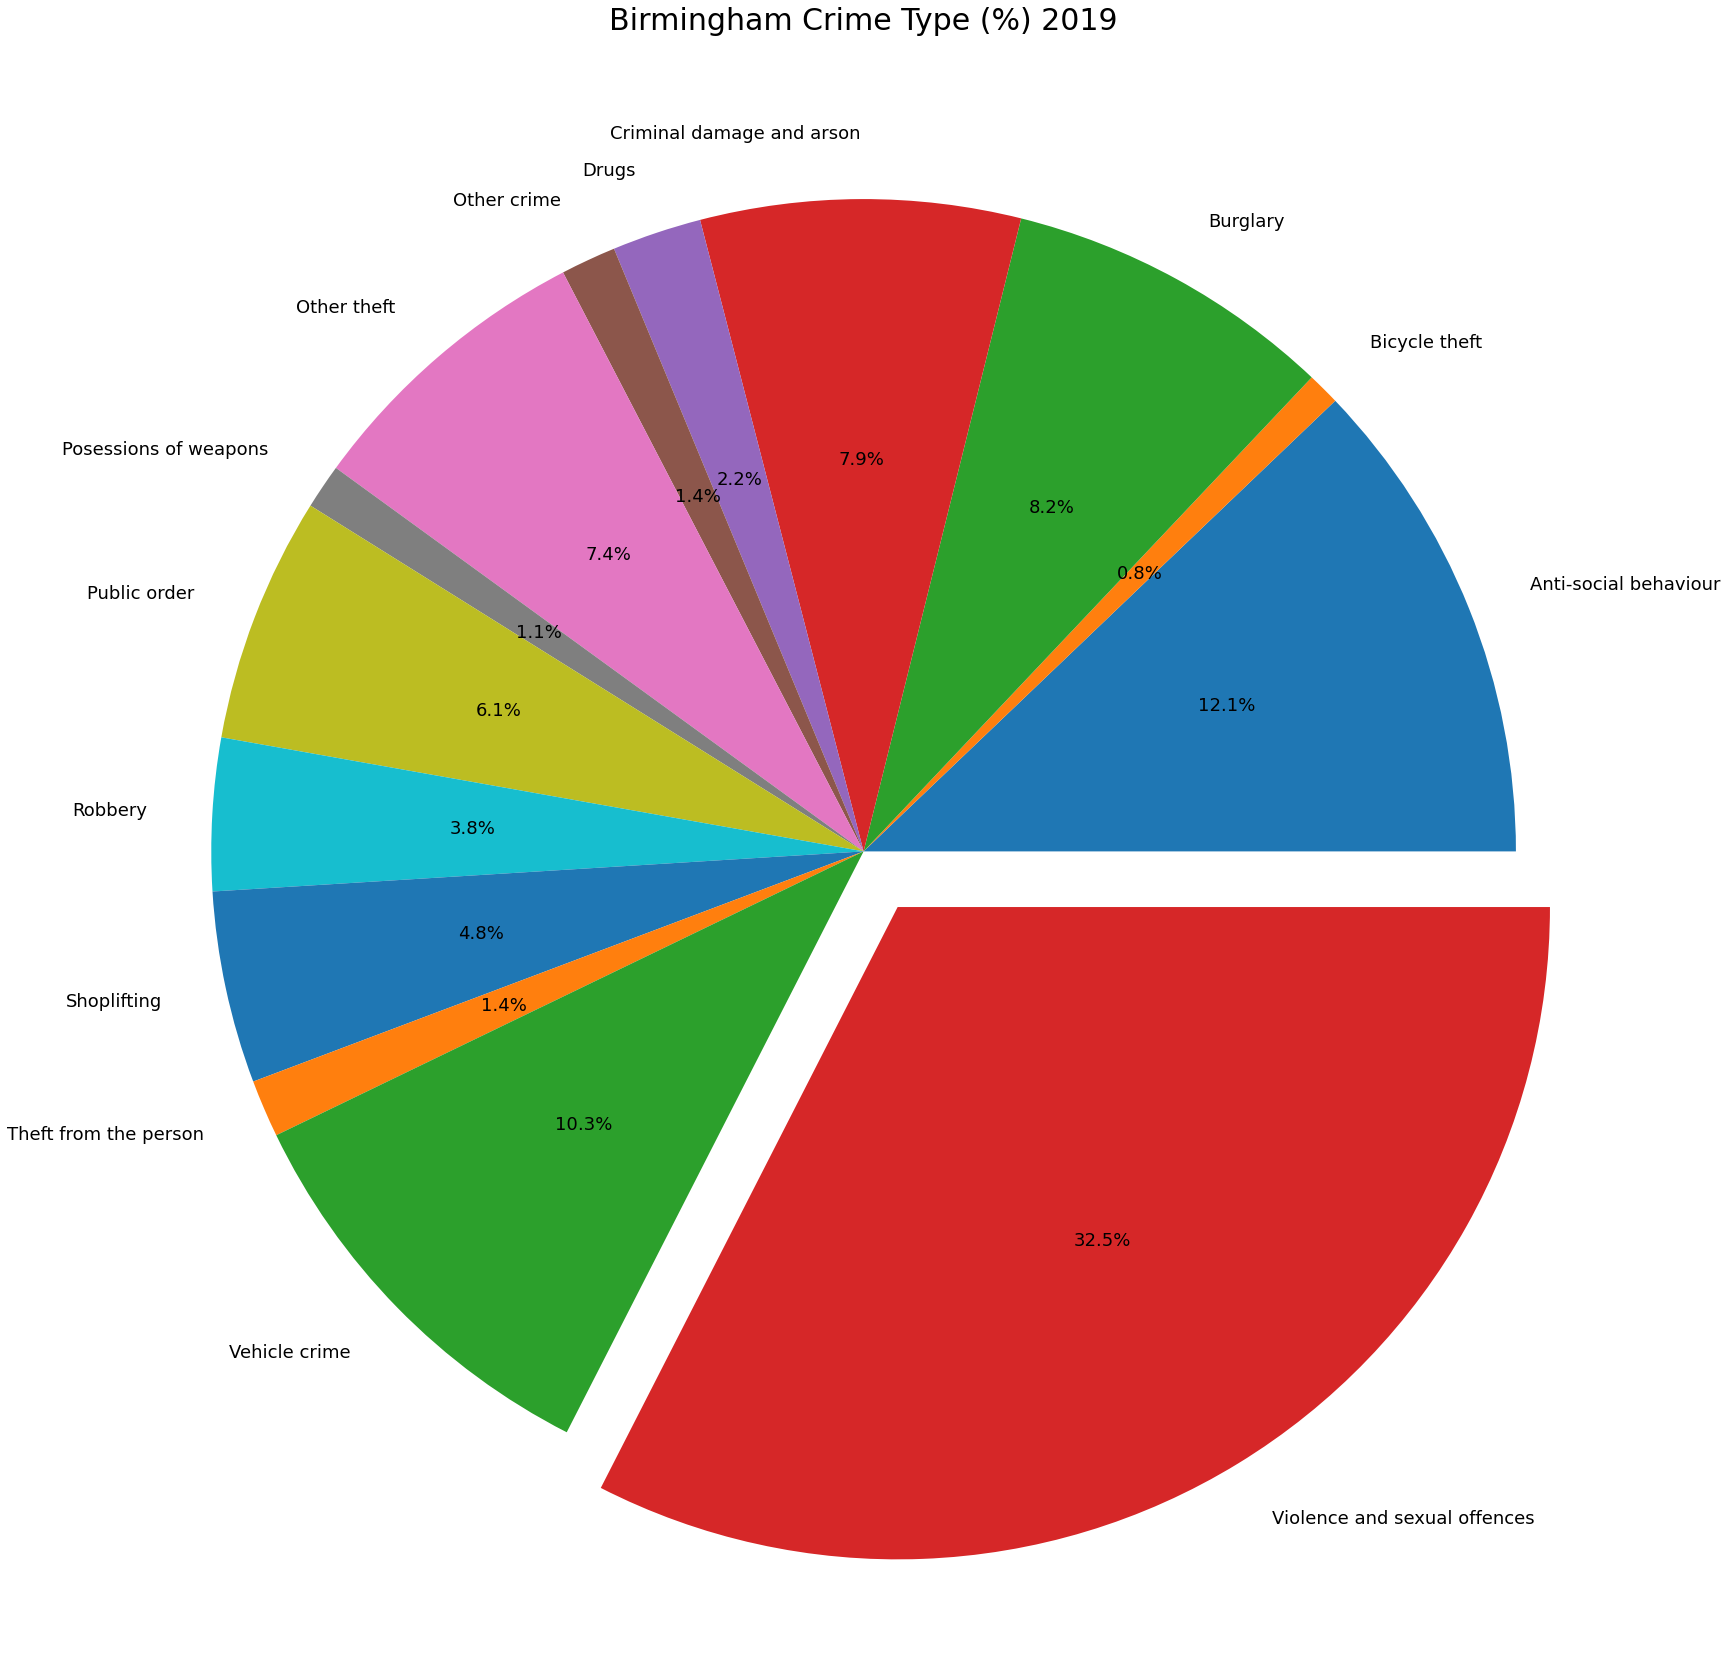

In [54]:
labels = ["Anti-social behaviour", "Bicycle theft", "Burglary", "Criminal damage and arson", "Drugs", "Other crime", "Other theft", "Posessions of weapons", "Public order", "Robbery", "Shoplifting", "Theft from the person", "Vehicle crime", "Violence and sexual offences"]
sizes = Birmingham_crime["Birmingham Crime count"]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0 , 0.1)
plt.pie(sizes, 
        labels = labels,
        explode = explode,
        autopct = "%1.1f%%",
       textprops={'fontsize': 18})
plt.title("Birmingham Crime Type (%) 2019", fontsize=30)
plt.savefig("output/Birmingham Crime Type (%) 2019.png")

In Birmingham you are more likley to be exposed to violence and sexual offences which made up nearly a third of the crime in 2019. Anti-social behaviour and vehicle crime are the next two significant crime types in Birmingham.

We have chosen the LSOA with the highest crime rate in order to deeper dive into the data and see if we can find any patterns.

In [55]:
# Find max count tyoe for Birmingaham 
B_LSOA_crime_count_df = LSOA_crime_count_df[(LSOA_crime_count_df["District code (2019)"]=="E08000025")]
print(B_LSOA_crime_count_df[B_LSOA_crime_count_df["LSOA crime count"] == B_LSOA_crime_count_df["LSOA crime count"].max()])

           LSOA name  LSOA crime count  LSOA IMD Score District code (2019)  \
620  Birmingham 138A              4707          27.122            E08000025   

     Longitude   Latitude  
620  -1.894661  52.481417  


In [56]:
# # Here we have used the 'Maplt API' to find out which area this code represents
# url = mapit.mysociety.org/code/gss/
# query_url = url+code

# code = E08000025
# code/ons/138A

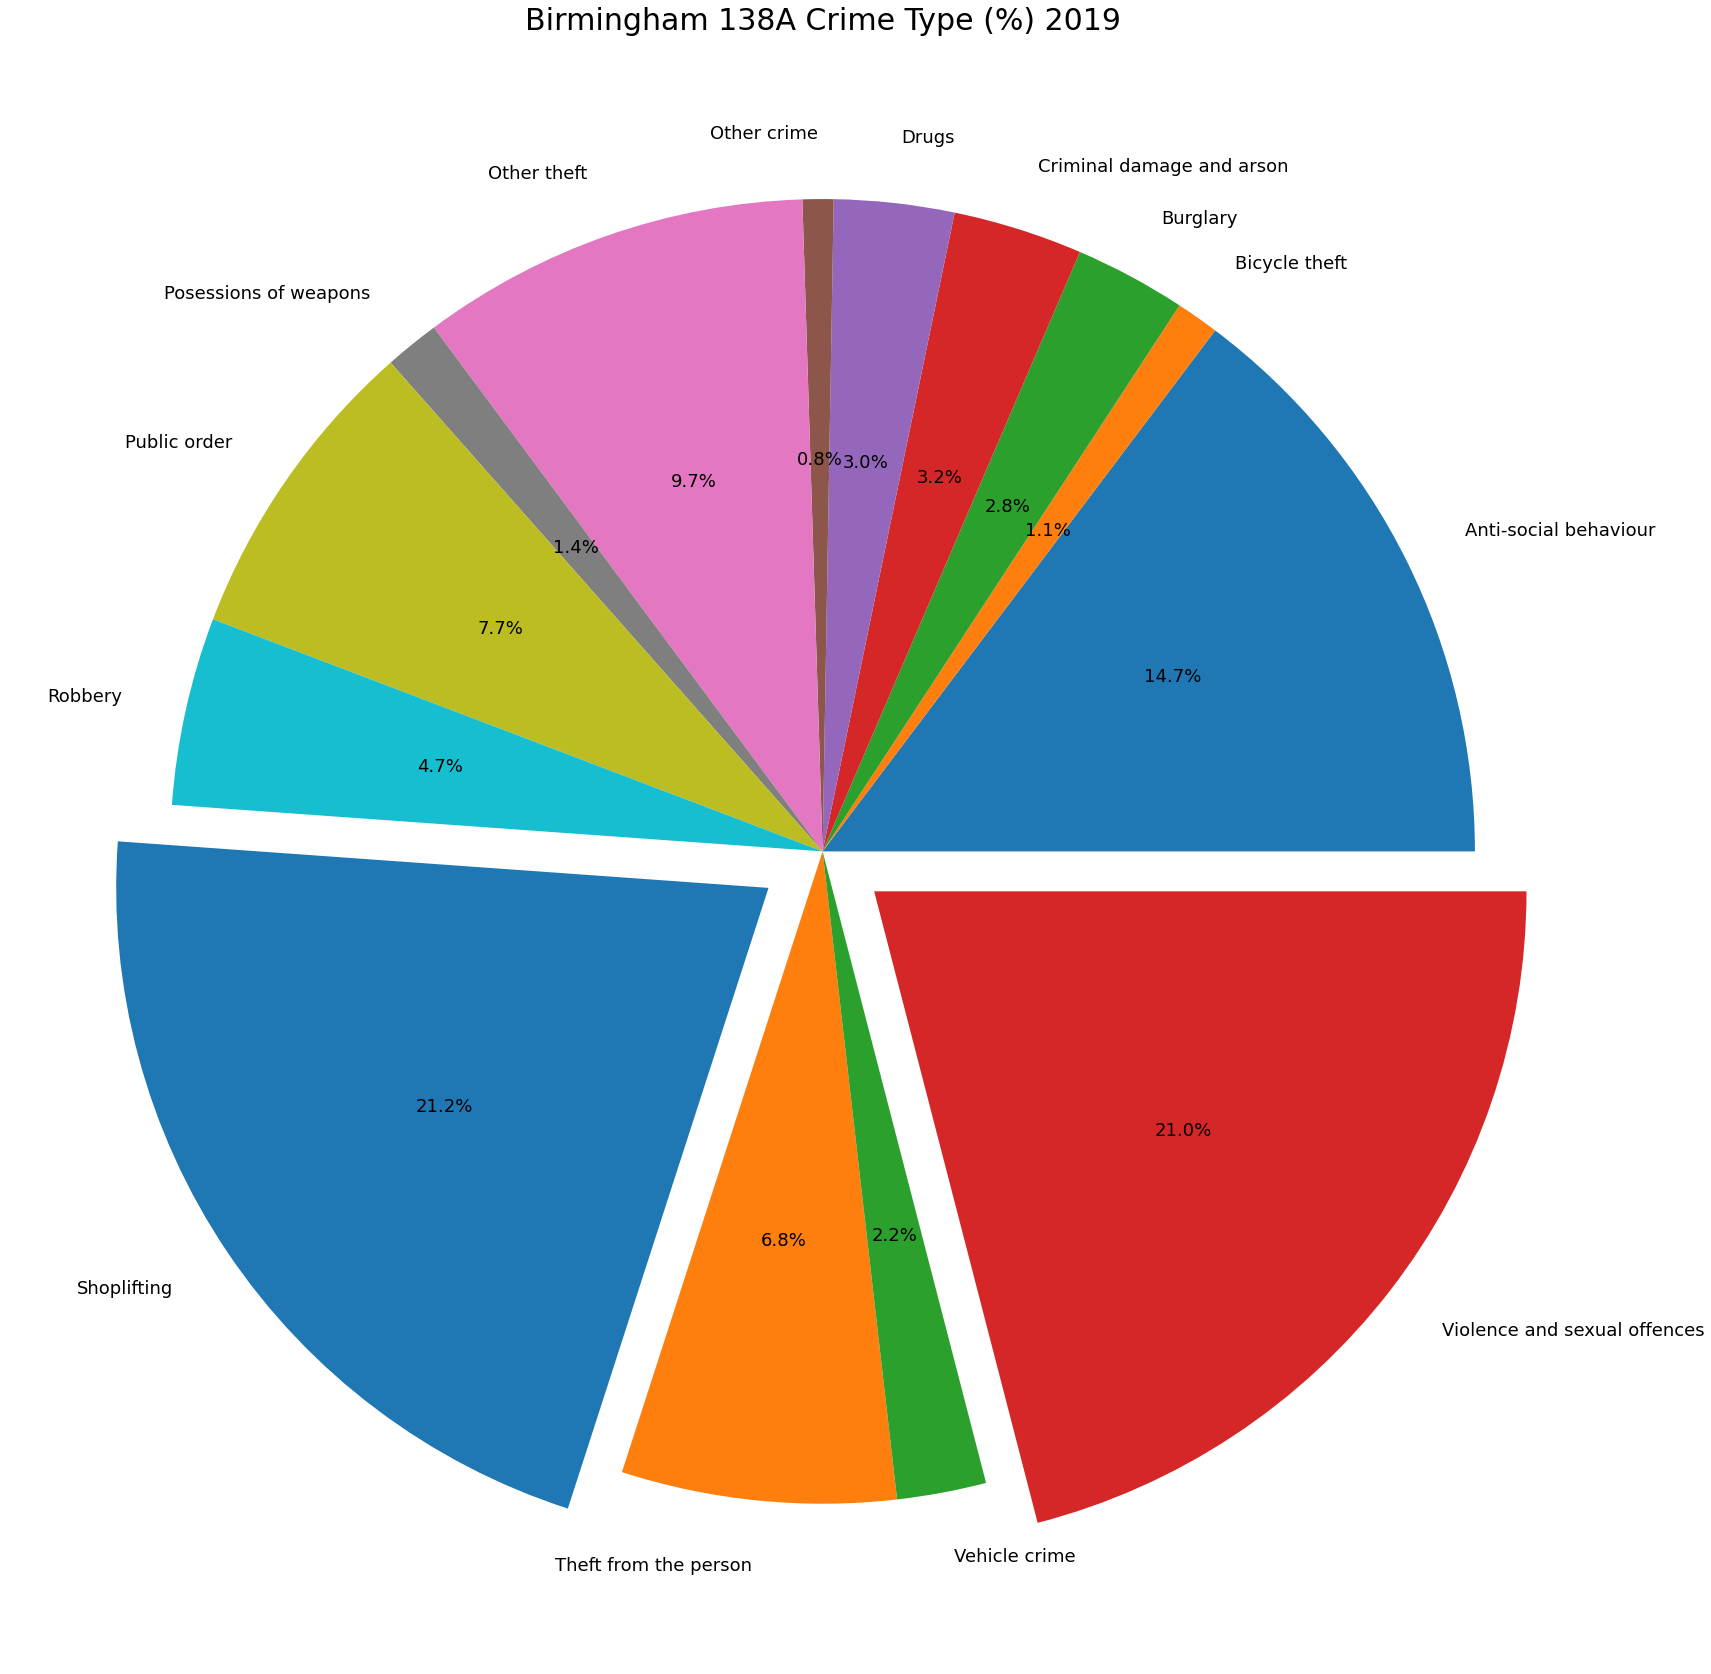

In [57]:
# Show crime types for LSOA
Birmingham_max_crime = West_midlands_df1[(West_midlands_df1["LSOA name"]=="Birmingham 138A")]

bm = {"Crime type": "first", "Crime ID": "count"}
Birmingham_max_crime_count = Birmingham_max_crime.groupby(["Crime type"], as_index=False).agg(b)
Birmingham_max_crime_count = Birmingham_max_crime_count.rename(columns={"Crime ID":"Birmingham 138A Crime count"})
Birmingham_max_crime_count

labels = ["Anti-social behaviour", "Bicycle theft", "Burglary", "Criminal damage and arson", "Drugs", "Other crime", "Other theft", "Posessions of weapons", "Public order", "Robbery", "Shoplifting", "Theft from the person", "Vehicle crime", "Violence and sexual offences"]
sizes = Birmingham_max_crime_count["Birmingham 138A Crime count"]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0 , 0 , 0.1)
plt.pie(sizes, 
        labels = labels,
        explode = explode,
        autopct = "%1.1f%%",
       textprops={'fontsize': 18})
plt.title("Birmingham 138A Crime Type (%) 2019", fontsize=30)
plt.savefig("output/Birmingham 138A Crime Type (%) 2019.png")

Interestingly, whilst violence and sexual offences make up a signficant proportion of crimes, shoplifting has a slightly higher percentage. This means that in the LSOA area with the max crime count, shoplifting is the crime that you would be the most exposed to. Vehicle crime is significantly lower than Birmingham as a whole. We believe that the reason for this is due to this LSOA covering the area between Birmingham New Street and Birmingham Snow Hill station. There are a higher desnity of shops and less cars in the city centre.

## Coventry crime data.

In [58]:
Coventry = West_midlands_df1[(West_midlands_df1["District code (2019)"]=="E08000026")]
c = {"Crime type": "first", "Crime ID": "count"}
Coventry_crime = Coventry.groupby(["Crime type"], as_index=False).agg(c)
Coventry_crime = Coventry_crime.rename(columns={"Crime ID":"Coventry Crime count"})
Coventry_crime

,Crime type,Coventry Crime count
0,Anti-social behaviour,4568
1,Bicycle theft,572
2,Burglary,2841
3,Criminal damage and arson,2982
4,Drugs,515
5,Other crime,427
6,Other theft,2209
7,Possession of weapons,304
8,Public order,1594
9,Robbery,920


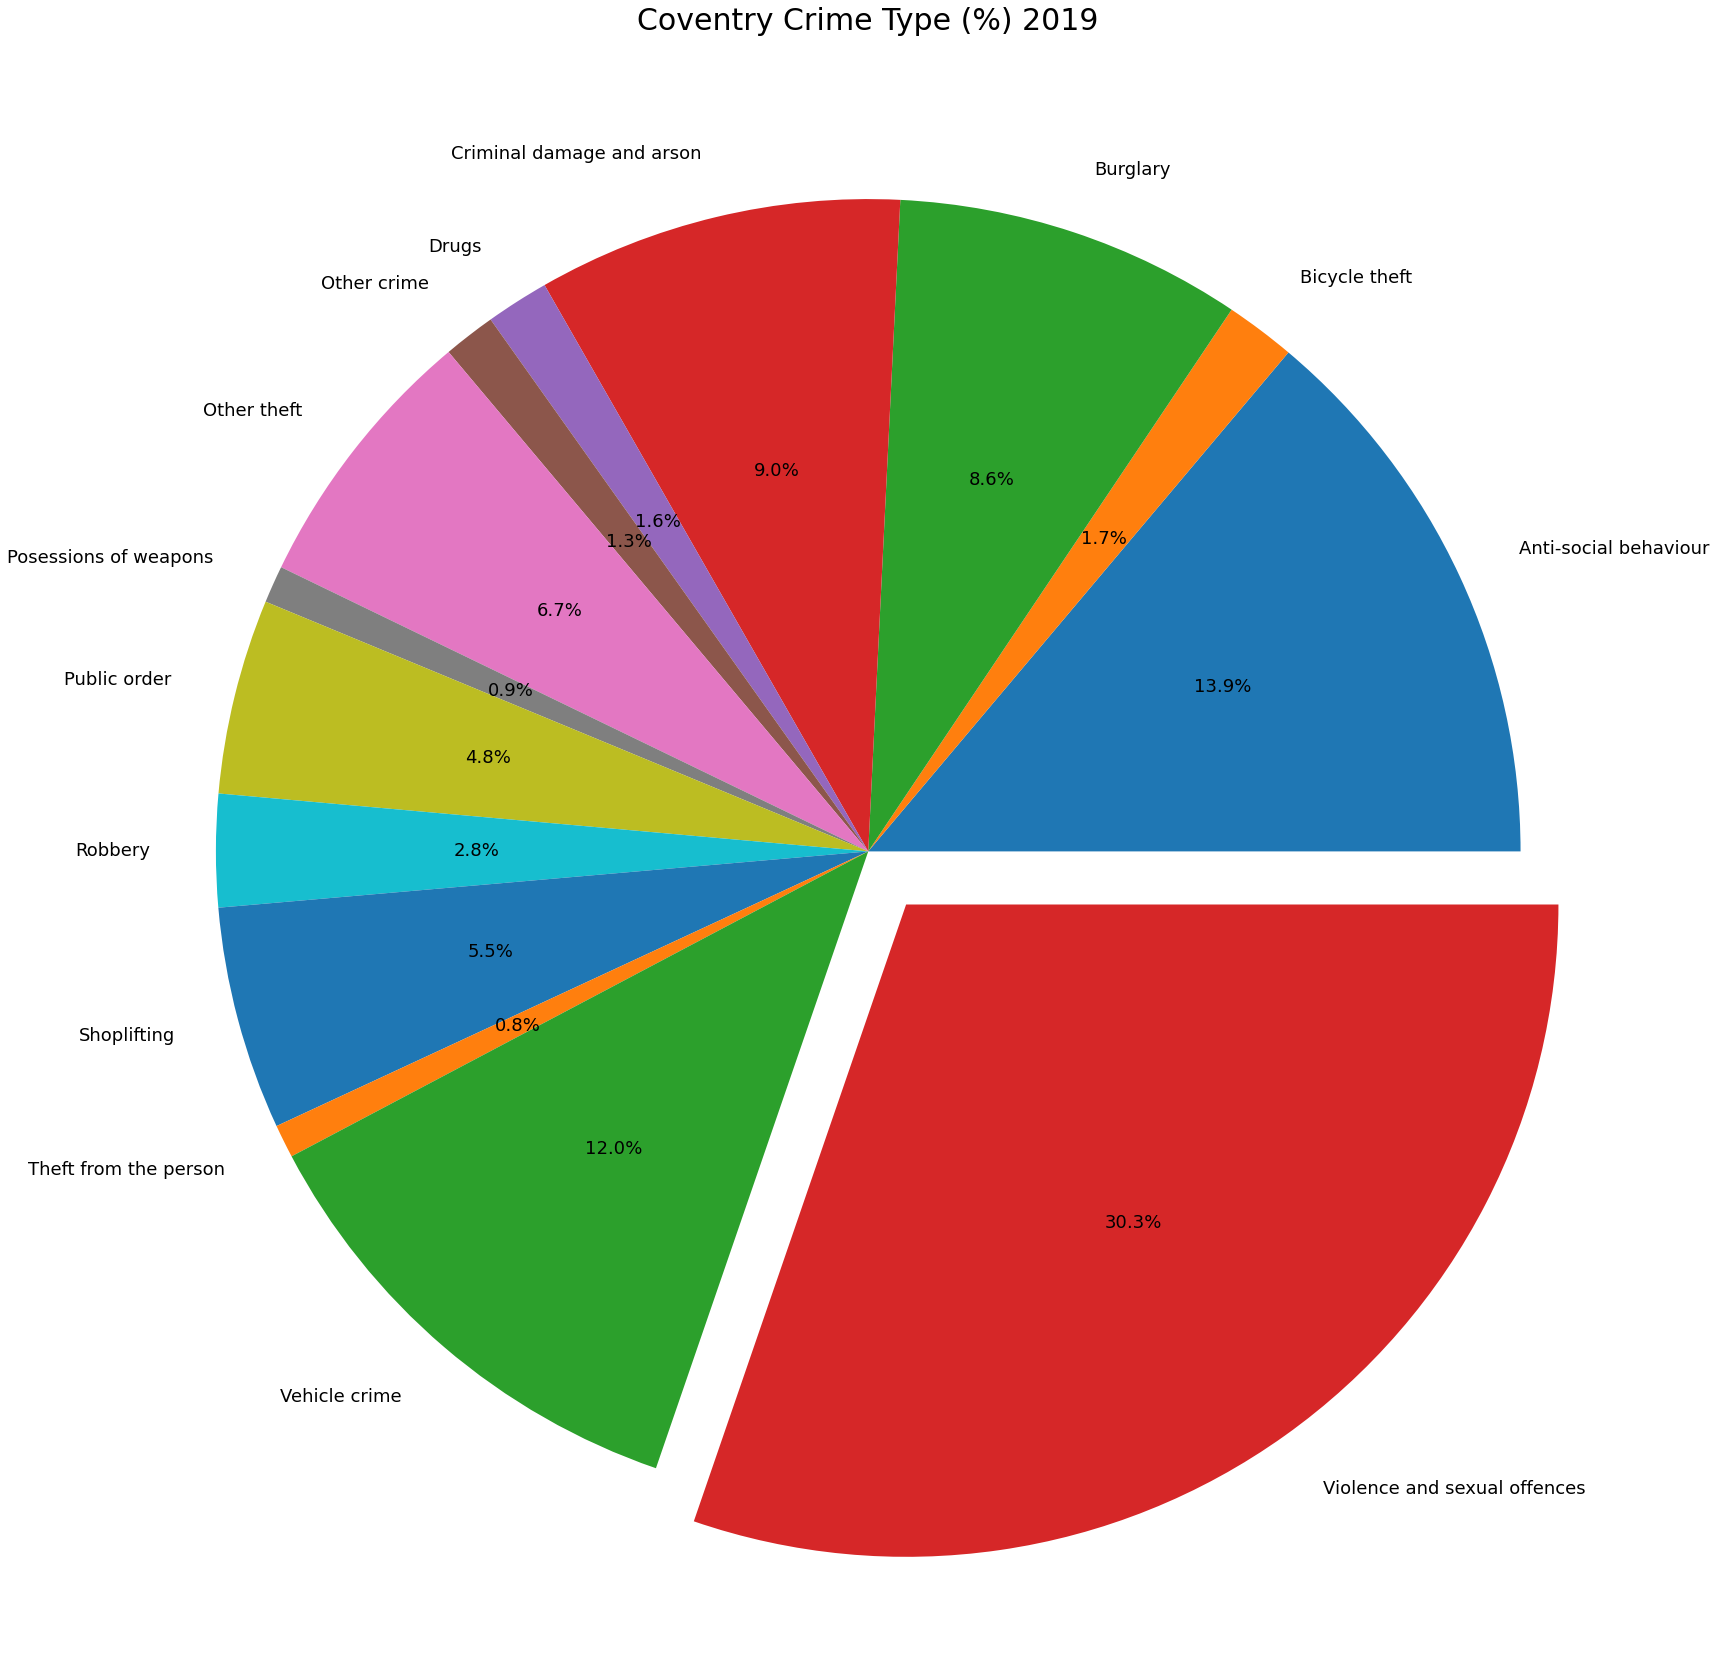

In [59]:
labels = ["Anti-social behaviour", "Bicycle theft", "Burglary", "Criminal damage and arson", "Drugs", "Other crime", "Other theft", "Posessions of weapons", "Public order", "Robbery", "Shoplifting", "Theft from the person", "Vehicle crime", "Violence and sexual offences"]
sizes = Coventry_crime["Coventry Crime count"]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0 , 0.1)
plt.pie(sizes, 
        labels = labels,
        explode = explode,
        autopct = "%1.1f%%",
       textprops={'fontsize': 18})
plt.title("Coventry Crime Type (%) 2019", fontsize=30)
plt.savefig("output/Coventry Crime Type (%) 2019.png")

The crime type in Coventry follows the same trend as the crime types in Birmingham. One notable difference, howeever, is the higher rate of bike theft. We will explore this further later on.

## Dudley crime data

In [60]:
Dudley = West_midlands_df1[(West_midlands_df1["District code (2019)"]=="E08000027")]
du = {"Crime type": "first", "Crime ID": "count"}
Dudley_crime = Dudley.groupby(["Crime type"], as_index=False).agg(du)
Dudley_crime = Dudley_crime.rename(columns={"Crime ID":"Dudley Crime count"})
Dudley_crime

,Crime type,Dudley Crime count
0,Anti-social behaviour,3253
1,Bicycle theft,80
2,Burglary,2462
3,Criminal damage and arson,2419
4,Drugs,339
5,Other crime,409
6,Other theft,1589
7,Possession of weapons,247
8,Public order,1421
9,Robbery,535


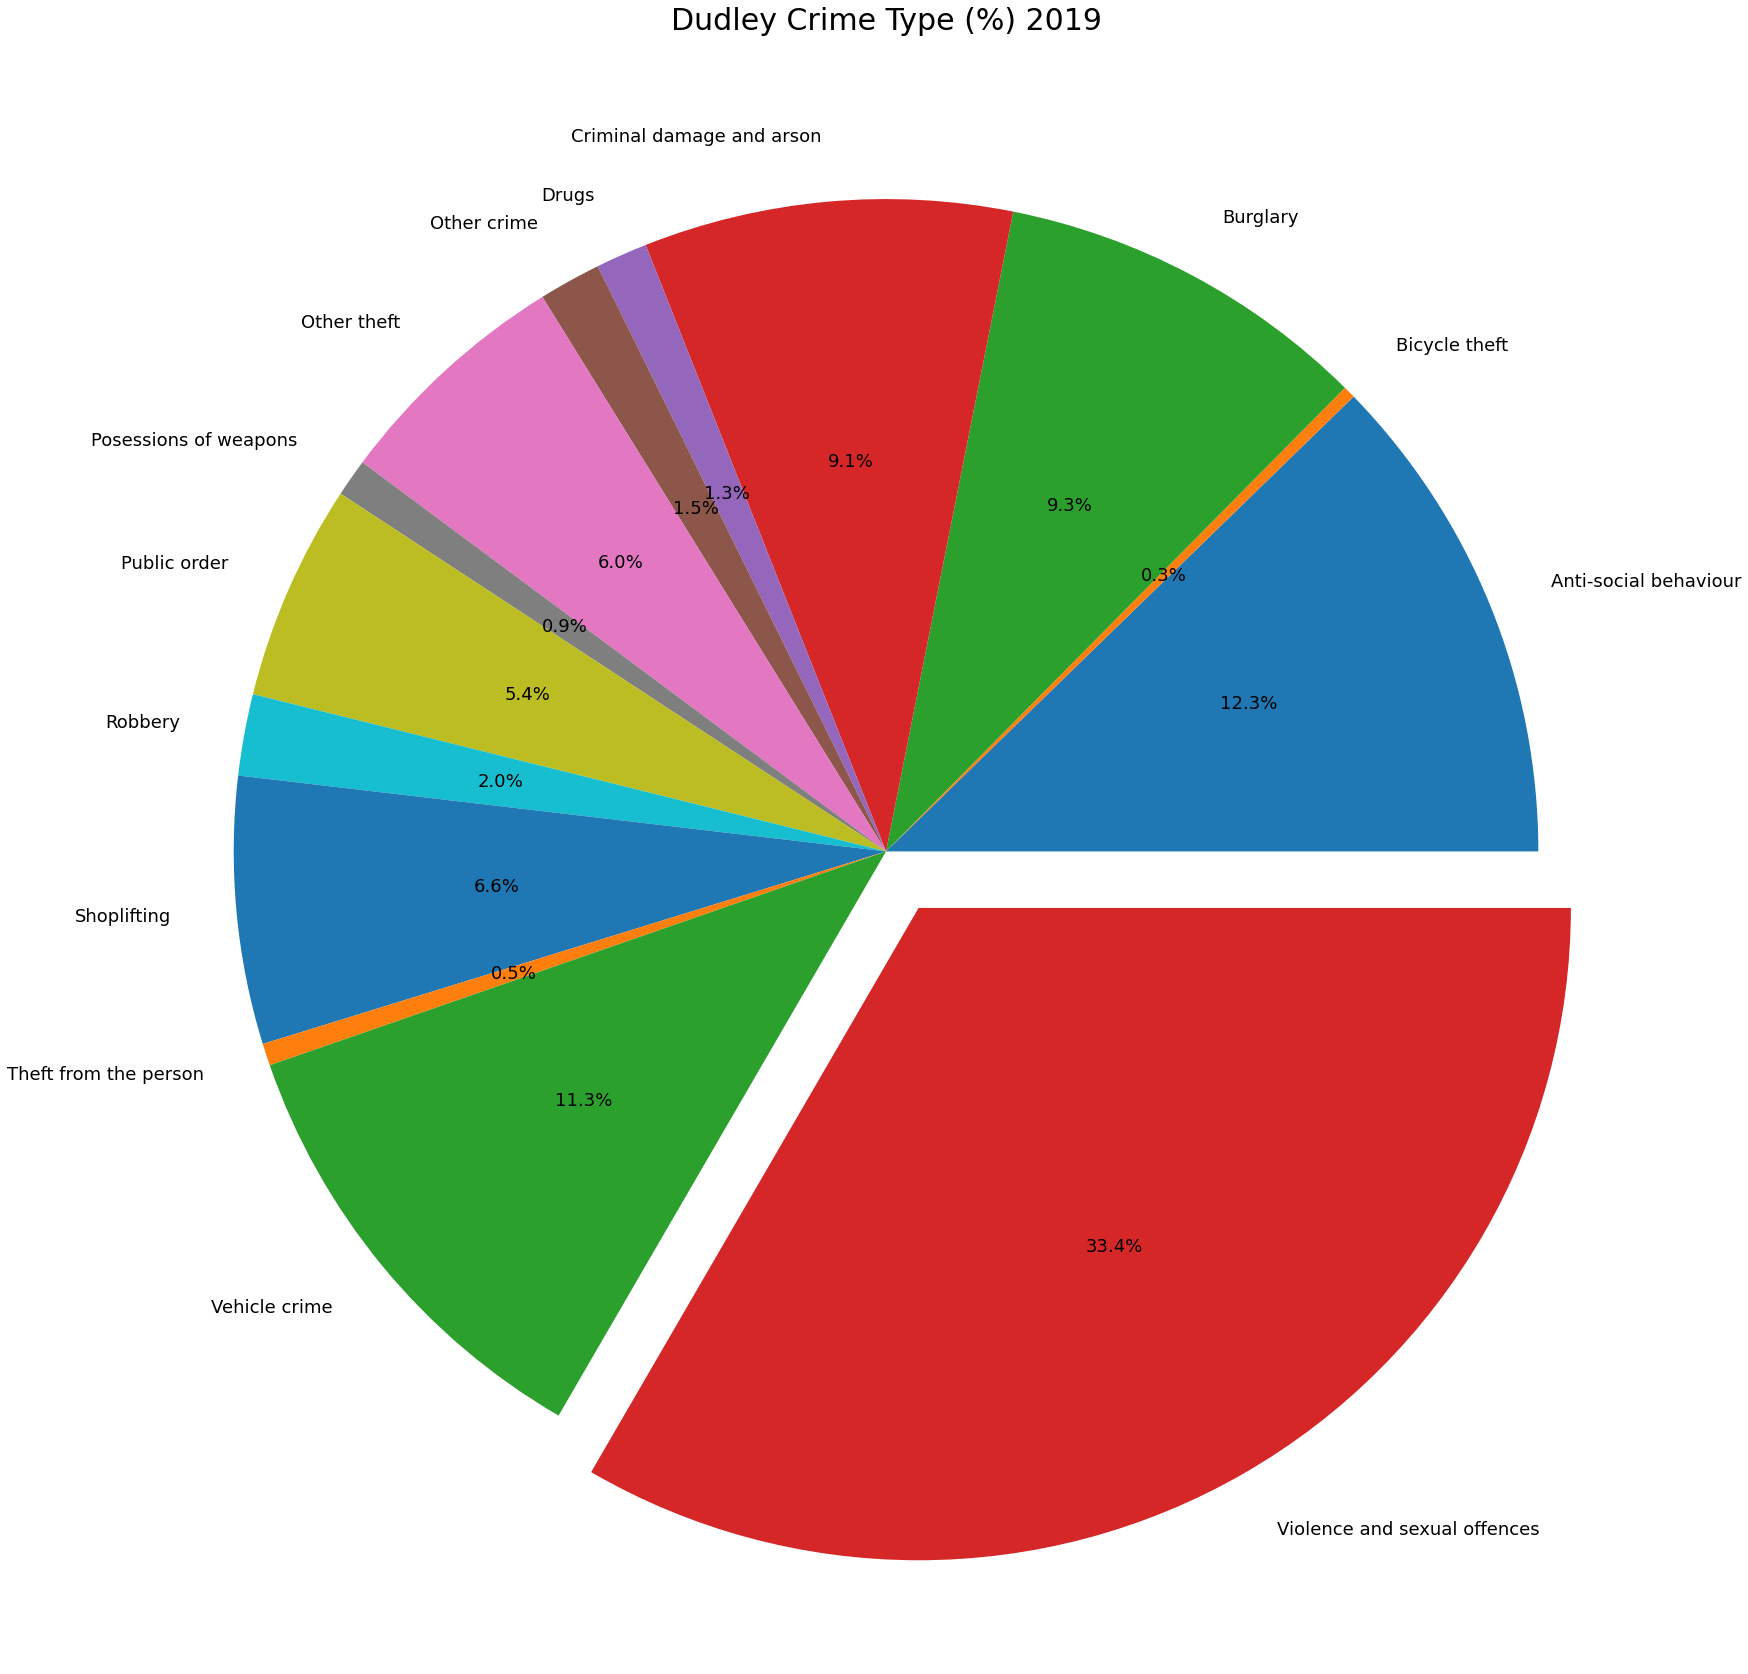

In [61]:
labels = ["Anti-social behaviour", "Bicycle theft", "Burglary", "Criminal damage and arson", "Drugs", "Other crime", "Other theft", "Posessions of weapons", "Public order", "Robbery", "Shoplifting", "Theft from the person", "Vehicle crime", "Violence and sexual offences"]
sizes = Dudley_crime["Dudley Crime count"]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0 , 0.1)
plt.pie(sizes, 
        labels = labels,
        explode = explode,
        autopct = "%1.1f%%",
       textprops={'fontsize': 18})
plt.title("Dudley Crime Type (%) 2019", fontsize=30)
plt.savefig("output/Dudley Crime Type (%) 2019.png")

This pie chart shows that Dudley has a higher rate of violence and sexual offences and burglary but is the least riskiest place to leave your bike. Again, this data shows that the crime types and the percentage of these crimes are similar to the other districts.

## Sandwell crime data

In [62]:
Sandwell = West_midlands_df1[(West_midlands_df1["District code (2019)"]=="E08000028")]
s = {"Crime type": "first", "Crime ID": "count"}
Sandwell_crime = Sandwell.groupby(["Crime type"], as_index=False).agg(s)
Sandwell_crime = Sandwell_crime.rename(columns={"Crime ID":"Sandwell Crime count"})
Sandwell_crime

,Crime type,Sandwell Crime count
0,Anti-social behaviour,3796
1,Bicycle theft,132
2,Burglary,2965
3,Criminal damage and arson,2813
4,Drugs,700
5,Other crime,471
6,Other theft,2151
7,Possession of weapons,278
8,Public order,1823
9,Robbery,794


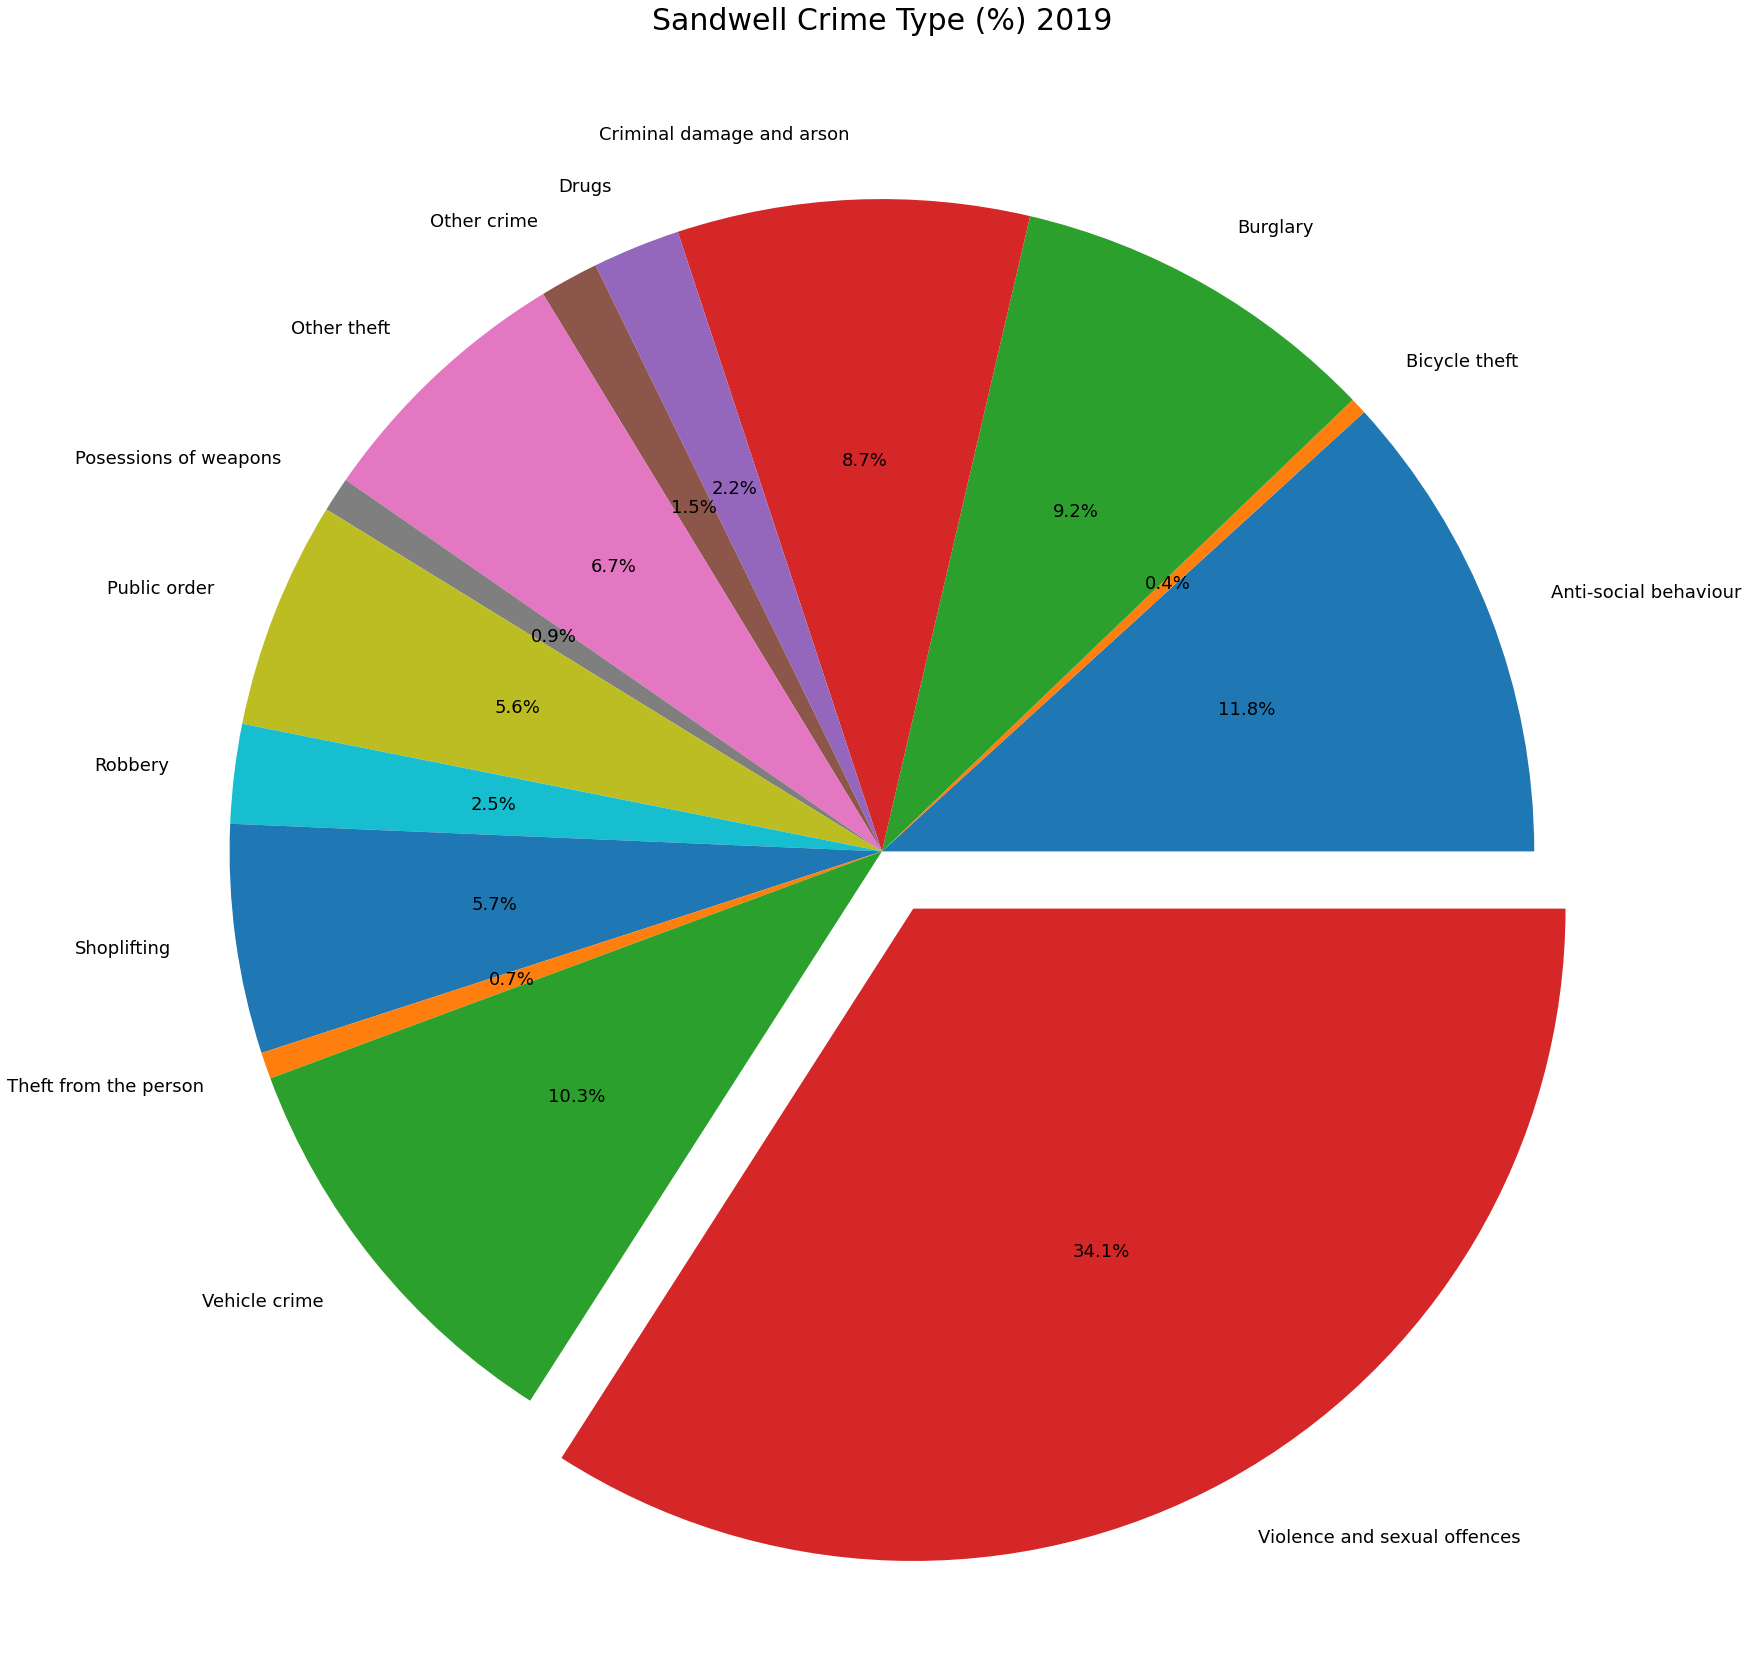

In [63]:
labels = ["Anti-social behaviour", "Bicycle theft", "Burglary", "Criminal damage and arson", "Drugs", "Other crime", "Other theft", "Posessions of weapons", "Public order", "Robbery", "Shoplifting", "Theft from the person", "Vehicle crime", "Violence and sexual offences"]
sizes = Sandwell_crime["Sandwell Crime count"]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0 , 0.1)
plt.pie(sizes, 
        labels = labels,
        explode = explode,
        autopct = "%1.1f%%",
       textprops={'fontsize': 18})
plt.title("Sandwell Crime Type (%) 2019", fontsize=30)
plt.savefig("output/Sandwell Crime Type (%) 2019.png")

In Sandwell bike theft is also a very small percentage, but the perecentage of violent and sexual offences is the second highest in the West Midlands. It made up over a third of crimes in 2019.

## Solihull crime data

In [64]:
Solihull = West_midlands_df1[(West_midlands_df1["District code (2019)"]=="E08000029")]
so = {"Crime type": "first", "Crime ID": "count"}
Solihull_crime = Solihull.groupby(["Crime type"], as_index=False).agg(so)
Solihull_crime = Solihull_crime.rename(columns={"Crime ID":"Solihull Crime count"})
Solihull_crime

,Crime type,Solihull Crime count
0,Anti-social behaviour,2089
1,Bicycle theft,160
2,Burglary,1814
3,Criminal damage and arson,1318
4,Drugs,222
5,Other crime,248
6,Other theft,1614
7,Possession of weapons,229
8,Public order,903
9,Robbery,460


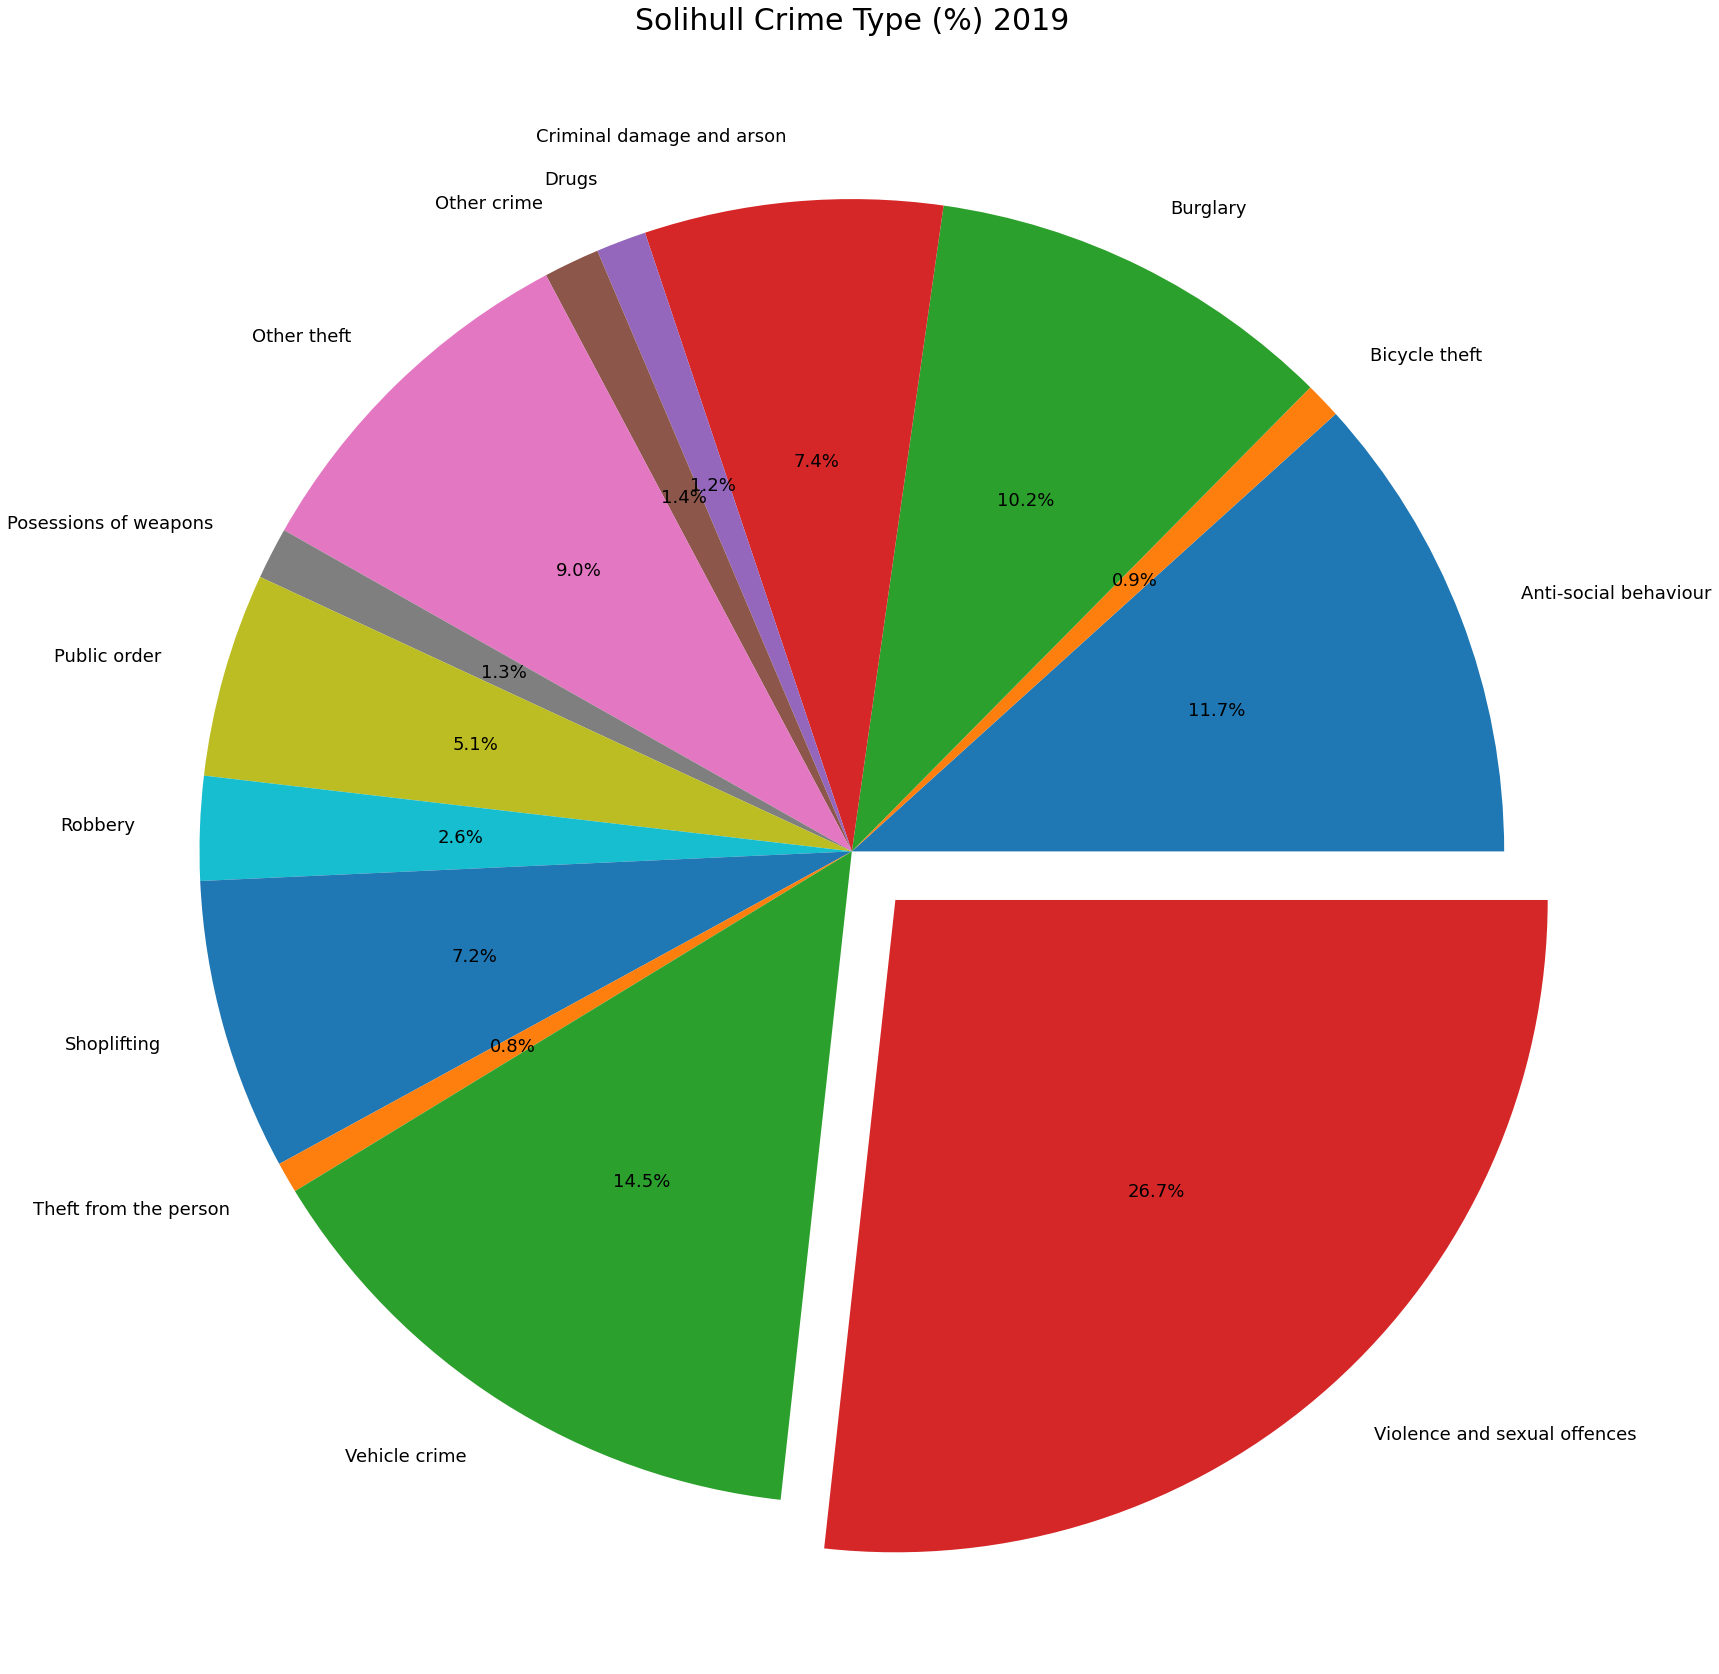

In [65]:
labels = ["Anti-social behaviour", "Bicycle theft", "Burglary", "Criminal damage and arson", "Drugs", "Other crime", "Other theft", "Posessions of weapons", "Public order", "Robbery", "Shoplifting", "Theft from the person", "Vehicle crime", "Violence and sexual offences"]
sizes = Solihull_crime["Solihull Crime count"]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0 , 0.1)
plt.pie(sizes, 
        labels = labels,
        explode = explode,
        autopct = "%1.1f%%",
       textprops={'fontsize': 18})
plt.title("Solihull Crime Type (%) 2019", fontsize=30)
plt.savefig("output/Solihull Crime Type (%) 2019.png")

The violence and sexual offences rate in Solihull is still the most significant crime but the percentage is much lower than the other districts. The rate of vehicle crime, other theft, and burglary is higher than the other districts.

We decided to look into LSOAs for Solihull as it the crime data and IMD score did not behave in the way we expected.

In [66]:
# Find max count tyoe for Solihull 
B_LSOA_crime_count_df = LSOA_crime_count_df[(LSOA_crime_count_df["District code (2019)"]=="E08000029")]
print(B_LSOA_crime_count_df[B_LSOA_crime_count_df["LSOA crime count"] == B_LSOA_crime_count_df["LSOA crime count"].max()])

          LSOA name  LSOA crime count  LSOA IMD Score District code (2019)  \
1255  Solihull 009A              1264           18.57            E08000029   

      Longitude   Latitude  
1255  -1.735679  52.452023  


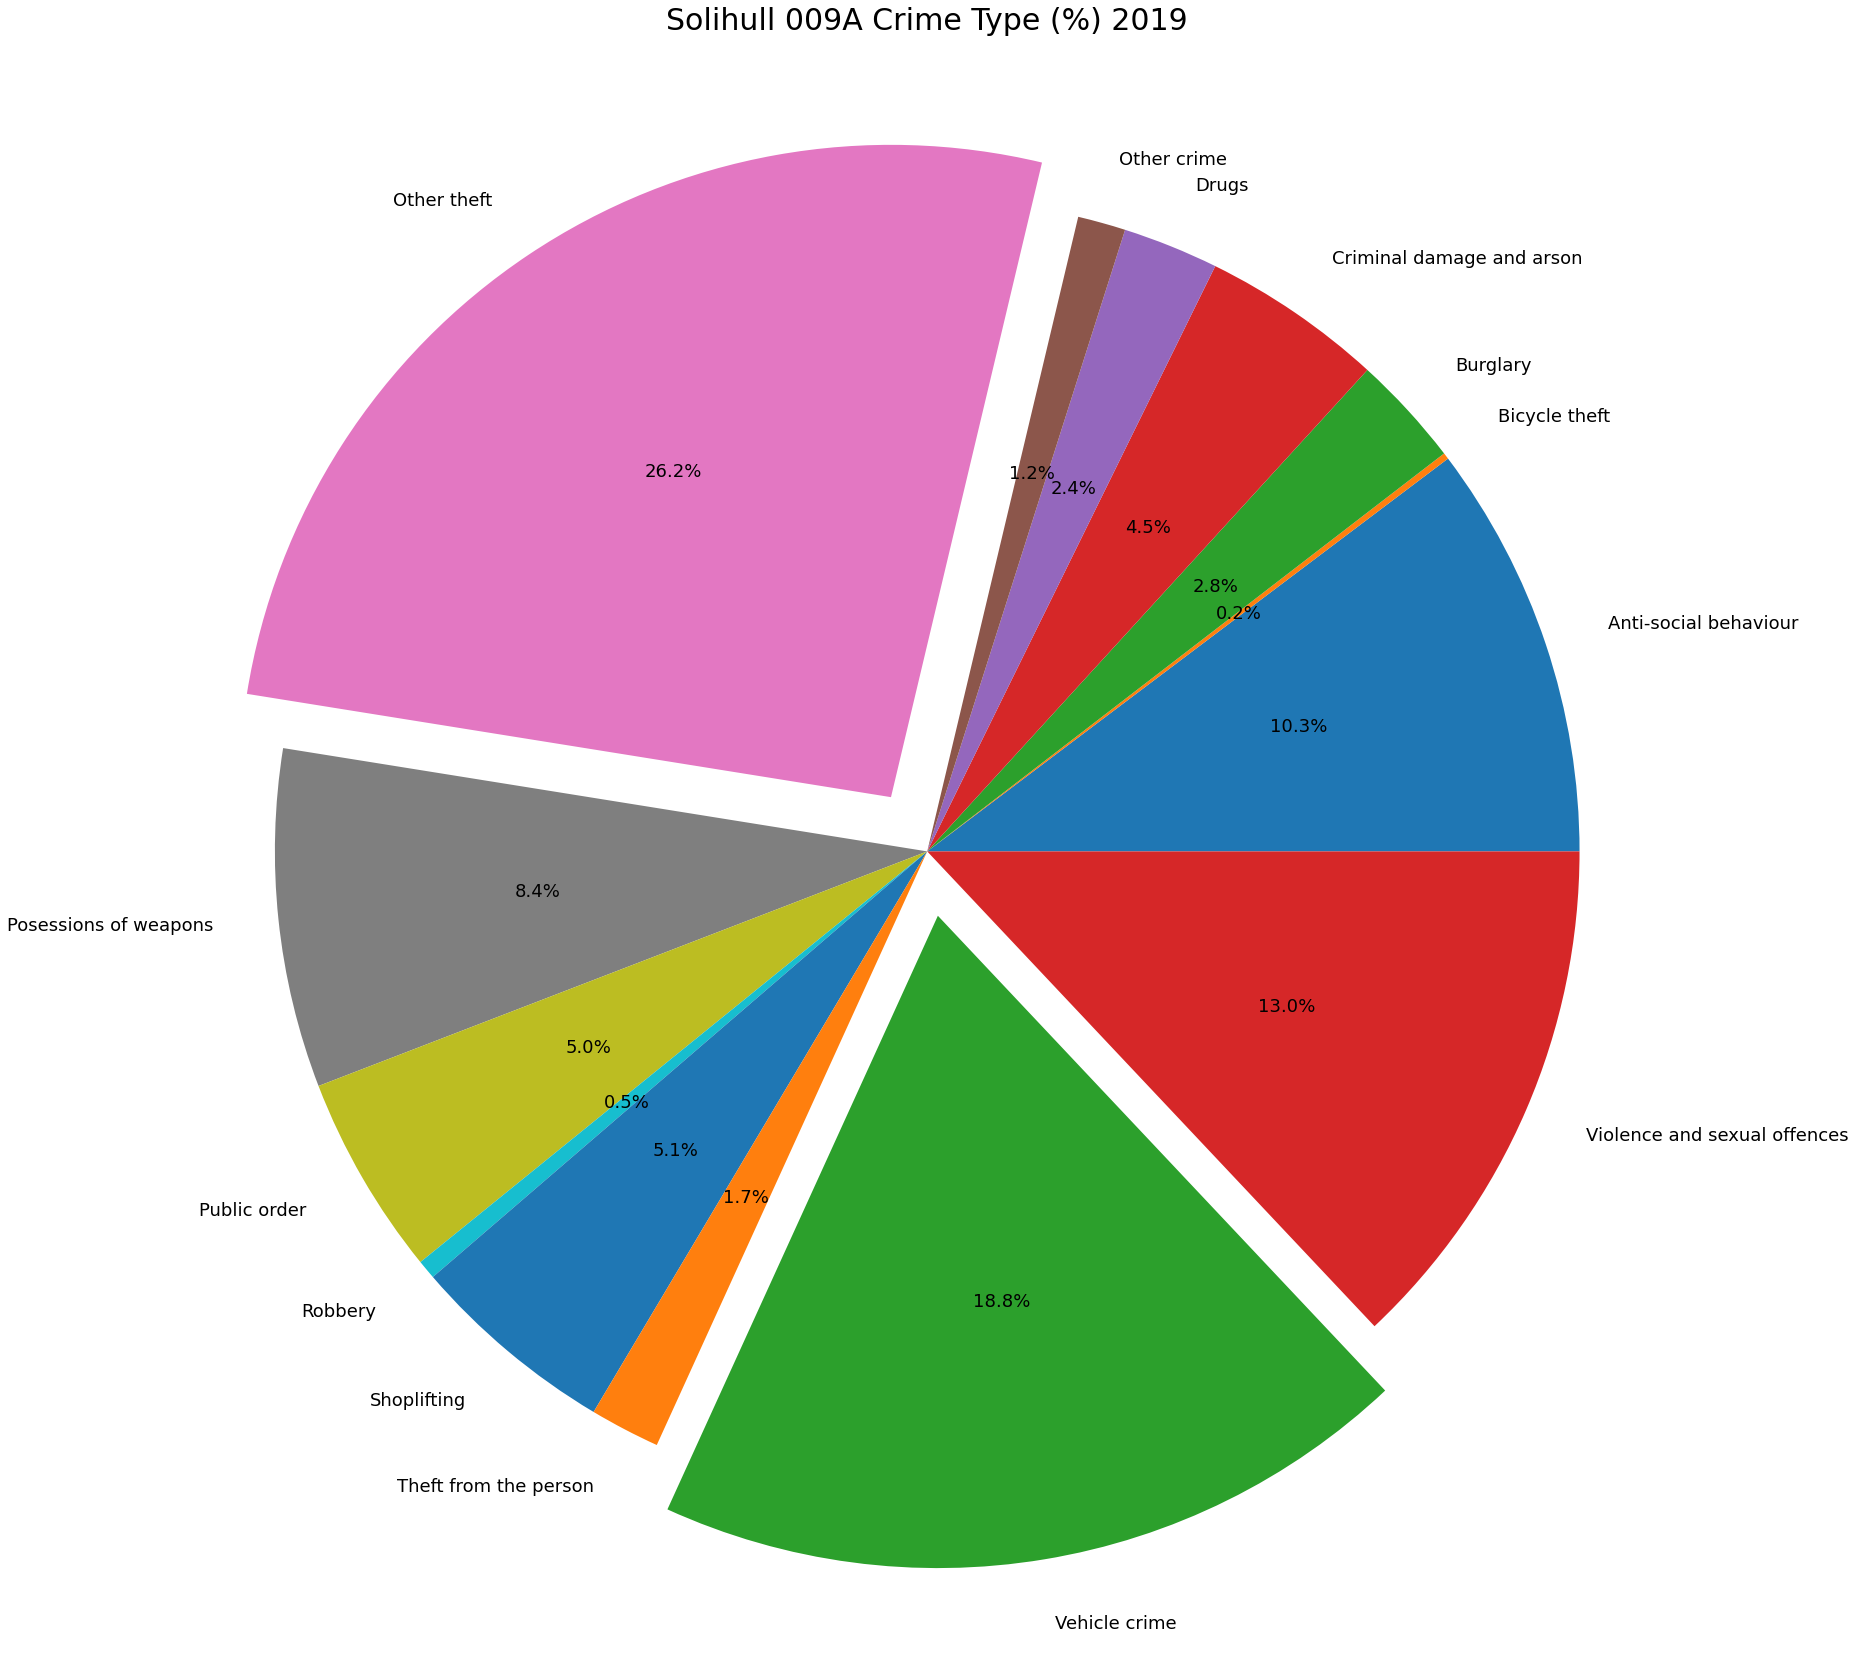

In [67]:
# Show crime types for LSOA
Solihull_max_crime = West_midlands_df1[(West_midlands_df1["LSOA name"]=="Solihull 009A")]

# USE API to find out which area this is??

sol = {"Crime type": "first", "Crime ID": "count"}
Solihull_max_crime_count = Solihull_max_crime.groupby(["Crime type"], as_index=False).agg(sol)
Solihull_max_crime_count = Solihull_max_crime_count.rename(columns={"Crime ID":"Solihull 009A Crime count"})
Solihull_max_crime_count

labels = ["Anti-social behaviour", "Bicycle theft", "Burglary", "Criminal damage and arson", "Drugs", "Other crime", "Other theft", "Posessions of weapons", "Public order", "Robbery", "Shoplifting", "Theft from the person", "Vehicle crime", "Violence and sexual offences"]
sizes = Solihull_max_crime_count["Solihull 009A Crime count"]
explode = (0, 0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0 , 0.1, 0)
plt.pie(sizes, 
        labels = labels,
        explode = explode,
        autopct = "%1.1f%%",
       textprops={'fontsize': 18})
plt.title("Solihull 009A Crime Type (%) 2019", fontsize=30)
plt.savefig("output/Solihull 009A Crime Type (%) 2019.png")

The area with the highest crime in Solihull shows us something interesting which does not reflect the overall pattern of crime types in the West Midlands in 2019, but it does correlate with the overall percentage of crime types in Solihull. The percentage of vehicle crime and other theft is much higher than other districts and the LSAO with the max cime rate in Birmingham. Interestingly possessions of weapons is another crime type with has a higher percentage than the other districts. 

## Walsall crime data 

In [68]:
Walsall = West_midlands_df1[(West_midlands_df1["District code (2019)"]=="E08000030")]
w = {"Crime type": "first", "Crime ID": "count"}
Walsall_crime = Walsall.groupby(["Crime type"], as_index=False).agg(w)
Walsall_crime = Walsall_crime.rename(columns={"Crime ID":"Walsall Crime count"})
Walsall_crime

,Crime type,Walsall Crime count
0,Anti-social behaviour,3869
1,Bicycle theft,198
2,Burglary,2169
3,Criminal damage and arson,2706
4,Drugs,433
5,Other crime,458
6,Other theft,1721
7,Possession of weapons,249
8,Public order,1544
9,Robbery,591


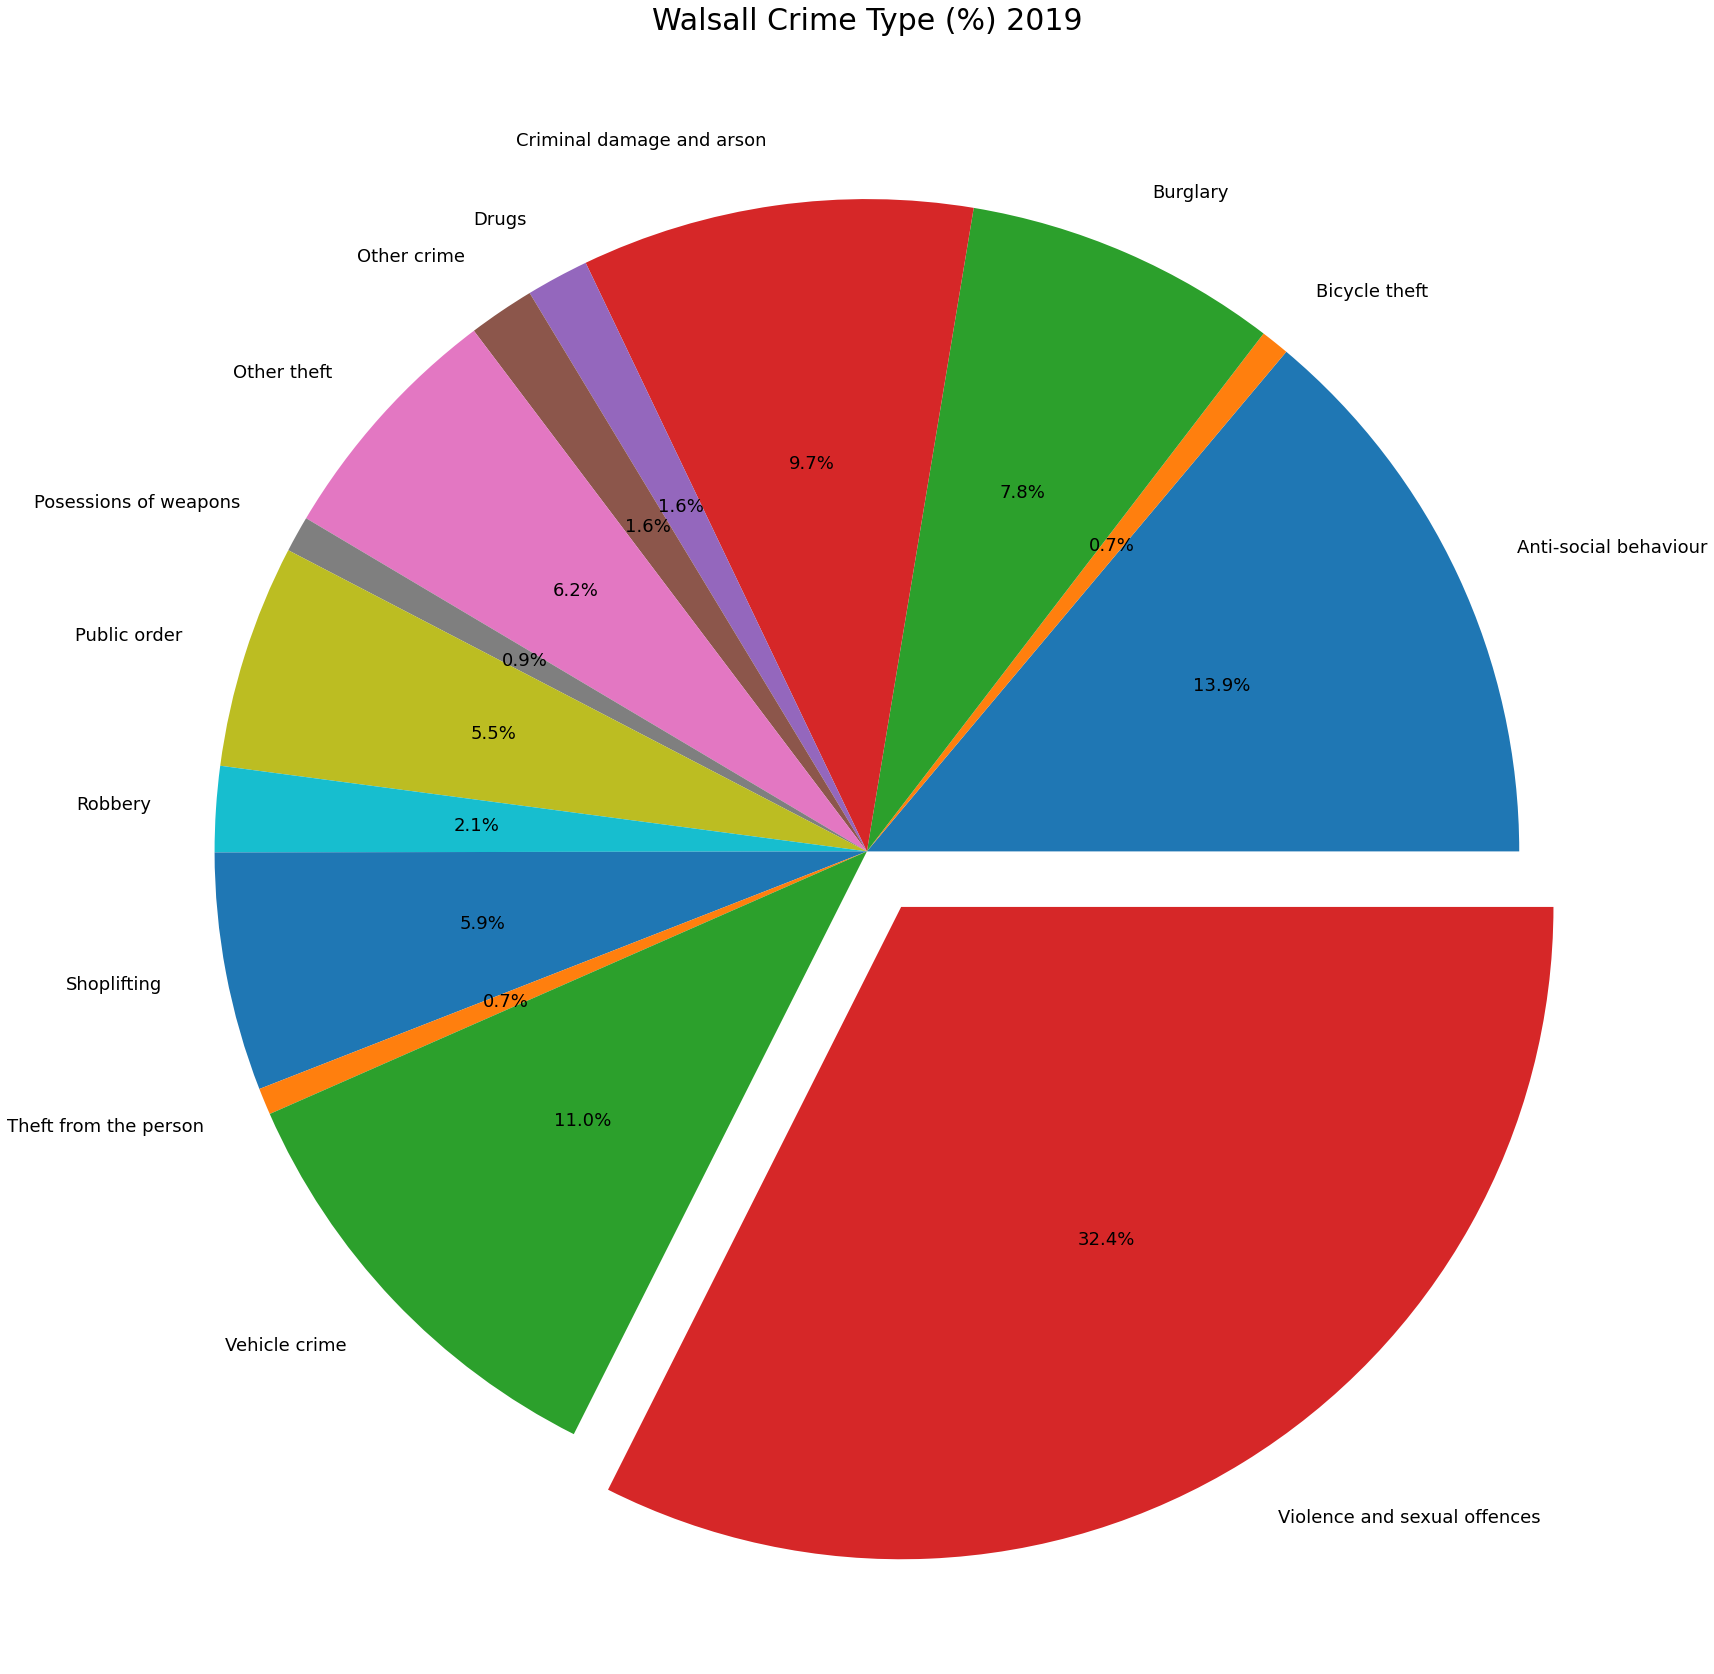

In [69]:
labels = ["Anti-social behaviour", "Bicycle theft", "Burglary", "Criminal damage and arson", "Drugs", "Other crime", "Other theft", "Posessions of weapons", "Public order", "Robbery", "Shoplifting", "Theft from the person", "Vehicle crime", "Violence and sexual offences"]
sizes = Walsall_crime["Walsall Crime count"]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0 , 0.1)
plt.pie(sizes, 
        labels = labels,
        explode = explode,
        autopct = "%1.1f%%",
       textprops={'fontsize': 18})
plt.title("Walsall Crime Type (%) 2019", fontsize=30)
plt.savefig("output/Walsall Crime Type (%) 2019.png")

The Walsall piechart reflects the data from the other districts. There is nothing too disimilar to the crime type percentages in the rest of the West Midlands.

## Wolverhampton crime data

In [70]:
Wolverhampton = West_midlands_df1[(West_midlands_df1["District code (2019)"]=="E08000031")]
wo = {"Crime type": "first", "Crime ID": "count"}
Wolverhampton_crime = Wolverhampton.groupby(["Crime type"], as_index=False).agg(wo)
Wolverhampton_crime = Wolverhampton_crime.rename(columns={"Crime ID":"Wolverhampton Crime count"})
Wolverhampton_crime

,Crime type,Wolverhampton Crime count
0,Anti-social behaviour,3079
1,Bicycle theft,252
2,Burglary,2059
3,Criminal damage and arson,2329
4,Drugs,545
5,Other crime,499
6,Other theft,1805
7,Possession of weapons,269
8,Public order,1708
9,Robbery,555


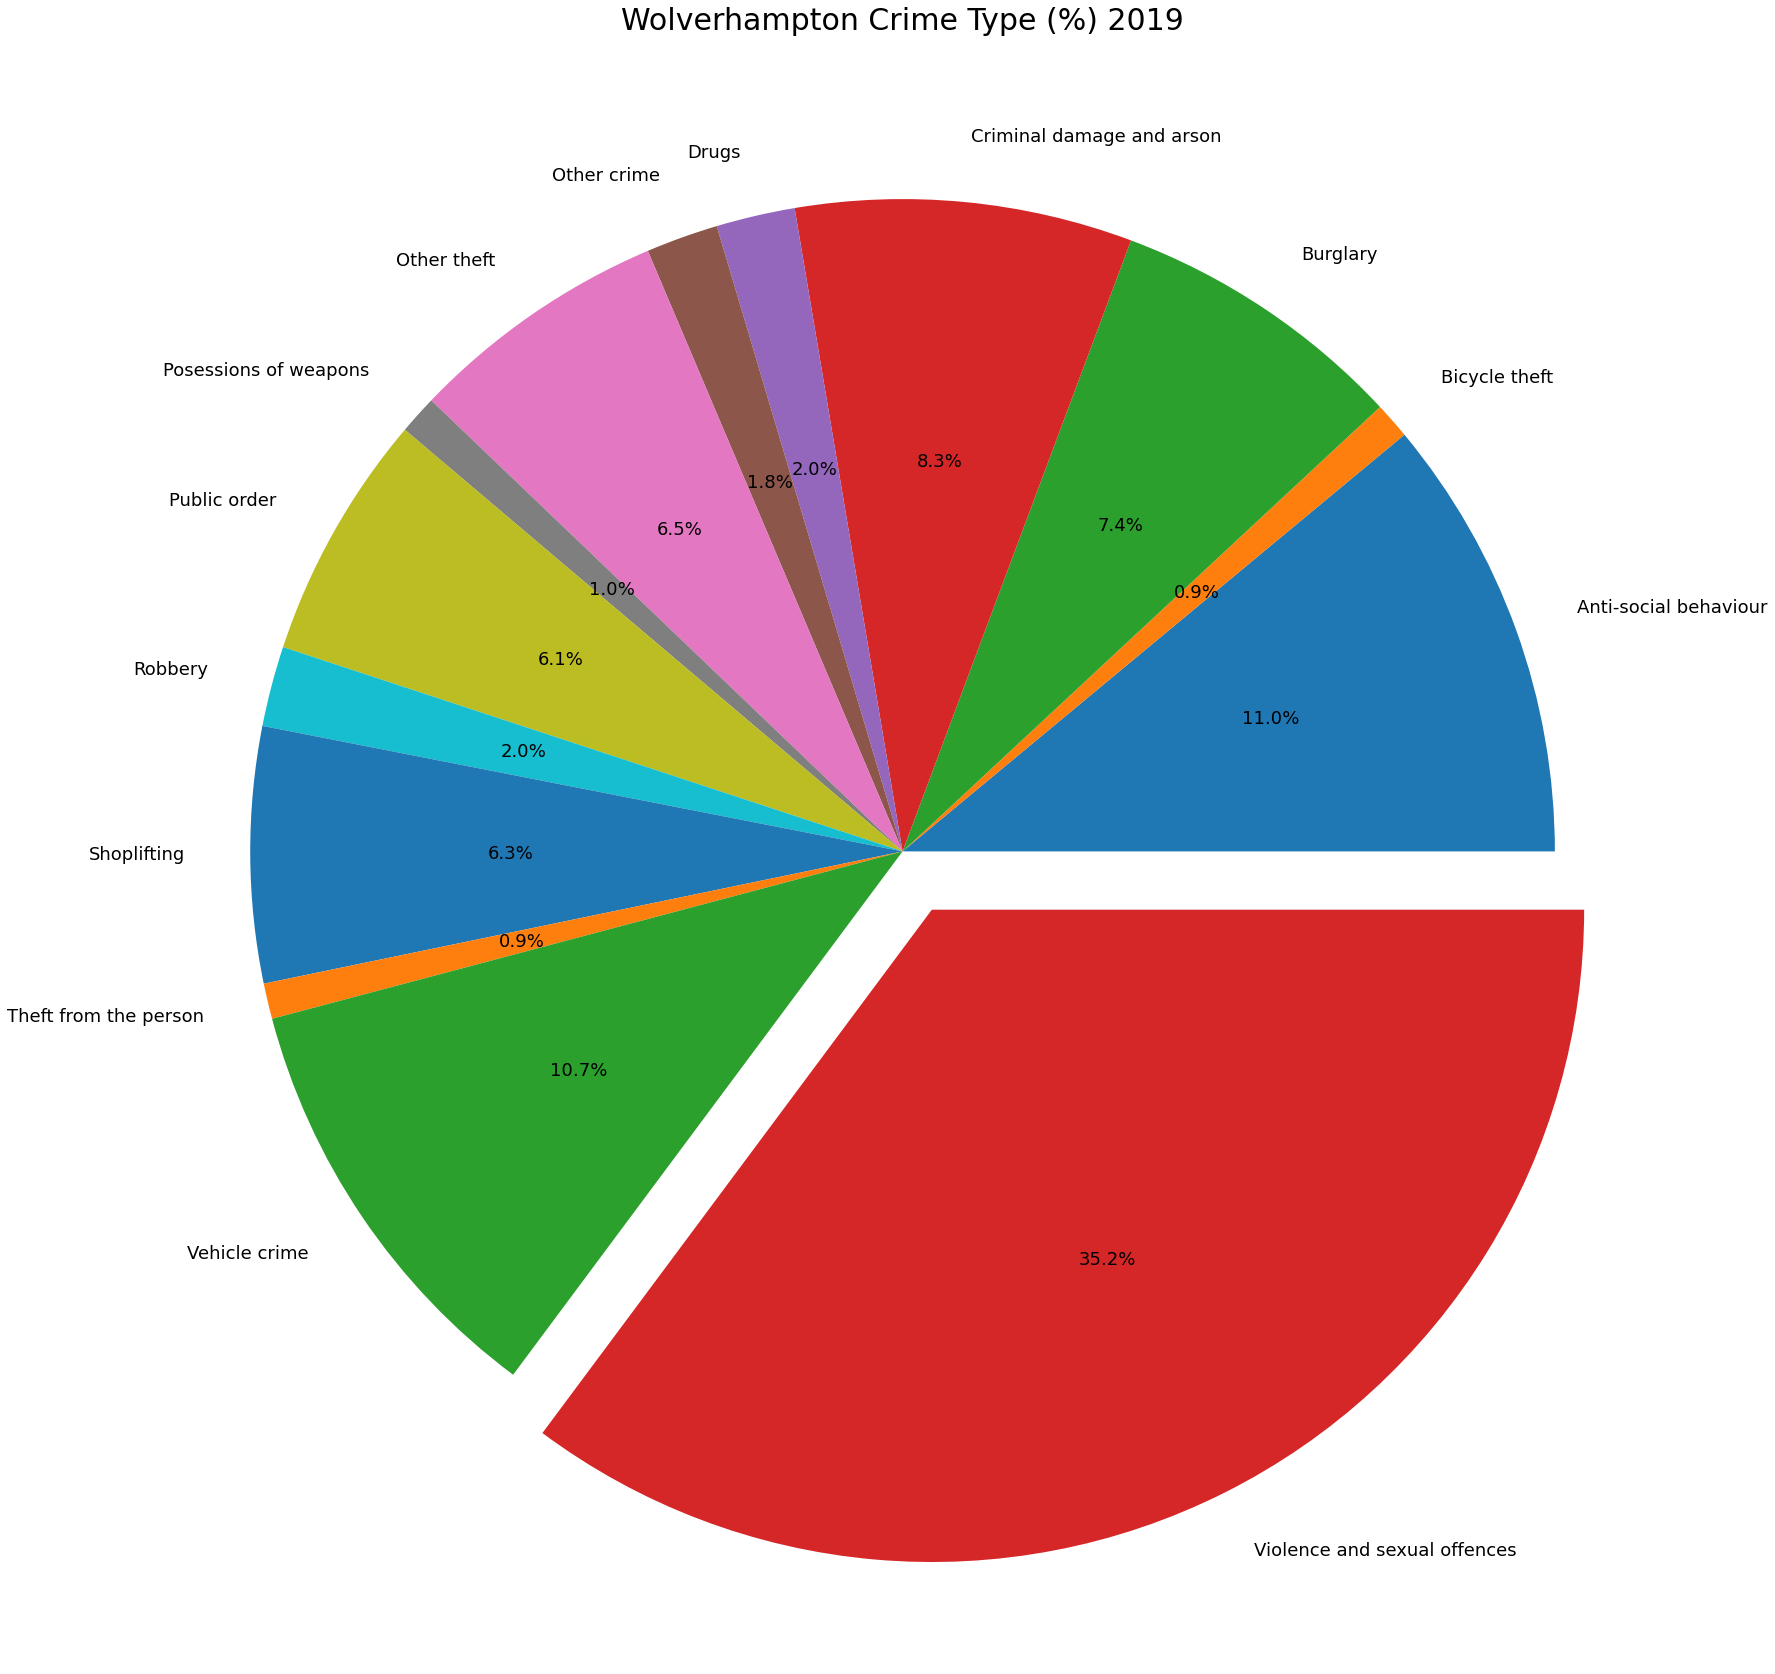

In [71]:
labels = ["Anti-social behaviour", "Bicycle theft", "Burglary", "Criminal damage and arson", "Drugs", "Other crime", "Other theft", "Posessions of weapons", "Public order", "Robbery", "Shoplifting", "Theft from the person", "Vehicle crime", "Violence and sexual offences"]
sizes = Wolverhampton_crime["Wolverhampton Crime count"]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0 , 0.1)
plt.pie(sizes, 
        labels = labels,
        explode = explode,
        autopct = "%1.1f%%",
       textprops={'fontsize': 18})
plt.title("Wolverhampton Crime Type (%) 2019", fontsize=30)
plt.savefig("output/Wolverhampton Crime Type (%) 2019.png")

Wolverhampton has the highest percentage of violent and sexual offences in the West Midlands. 

Overall: We found that despite the difference in IMD scores for each district the type of crime and the percentage of crime count in 2019 was mostly similar across the West Midlands. 

To test this we chose a sample of LSOA's with an IMD score of less than 5 to ascertain what types of crimes were committed in areas with low IMD scores vs high IMD scores. 

In [72]:
# Filter dataframe by IMD scores < 10

low_IMD = West_midlands_df1.loc[(West_midlands_df1["LSOA IMD Score"] < 5)]
l = {"Crime type": "first", "Crime ID": "count"}
low_IMD_crime = low_IMD.groupby(["Crime type"], as_index=False).agg(l)
low_IMD_crime= low_IMD_crime.rename(columns={"Crime ID":"Crime count"})
low_IMD_crime

,Crime type,Crime count
0,Anti-social behaviour,369
1,Bicycle theft,29
2,Burglary,508
3,Criminal damage and arson,229
4,Drugs,43
5,Other crime,40
6,Other theft,279
7,Possession of weapons,18
8,Public order,142
9,Robbery,74


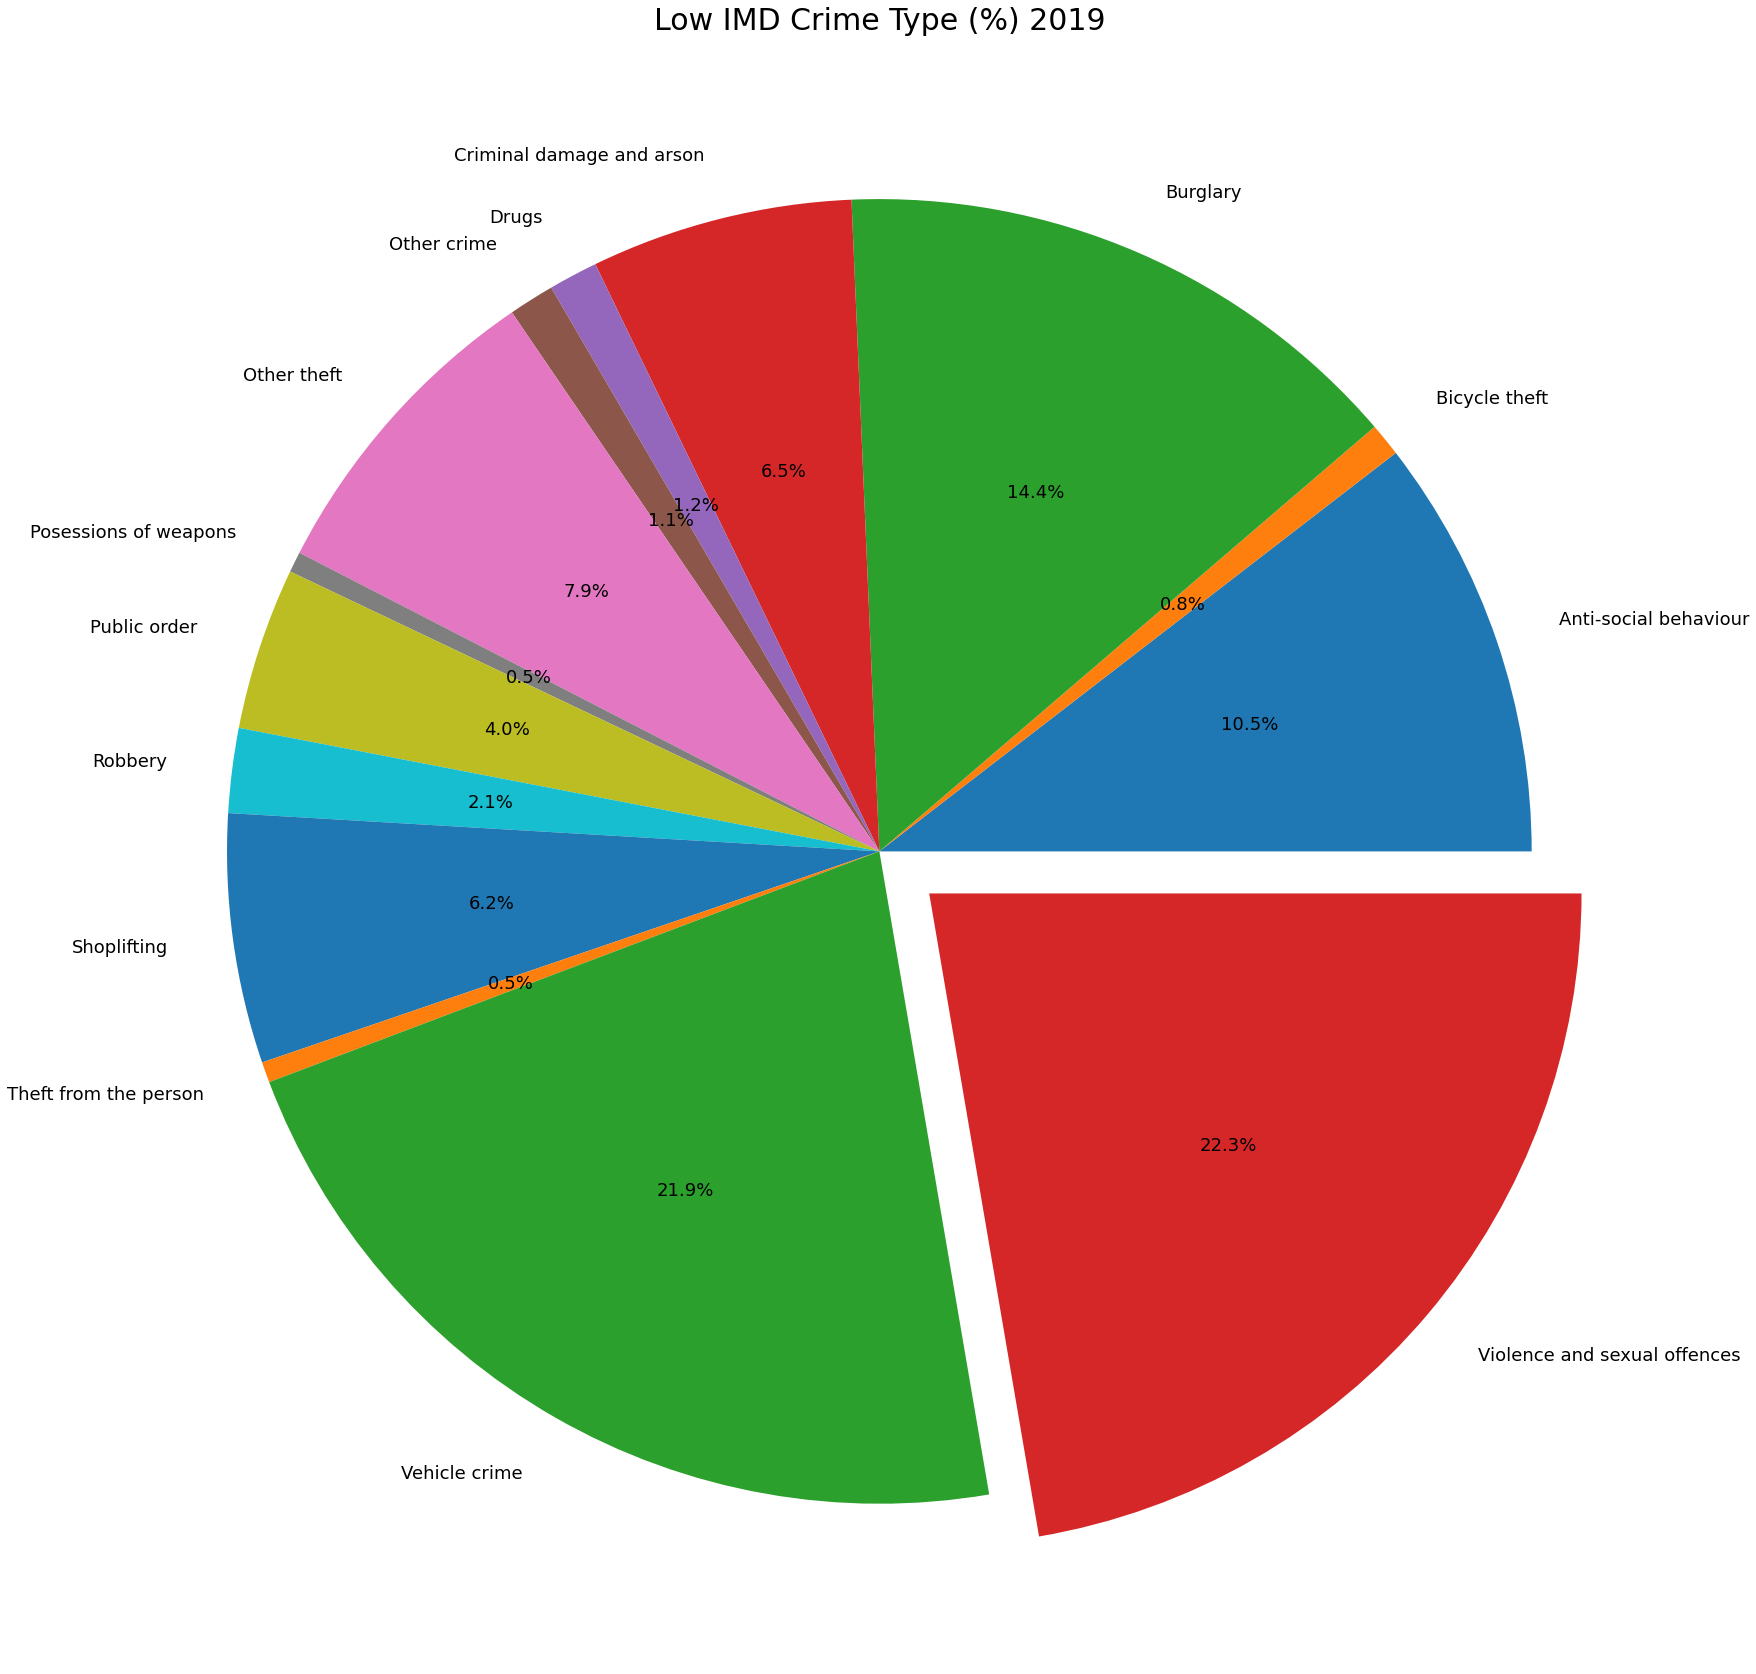

In [73]:
labels = ["Anti-social behaviour", "Bicycle theft", "Burglary", "Criminal damage and arson", "Drugs", "Other crime", "Other theft", "Posessions of weapons", "Public order", "Robbery", "Shoplifting", "Theft from the person", "Vehicle crime", "Violence and sexual offences"]
sizes = low_IMD_crime["Crime count"]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0 , 0.1)
plt.pie(sizes, 
        labels = labels,
        explode = explode,
        autopct = "%1.1f%%",
       textprops={'fontsize': 18})
plt.title("Low IMD Crime Type (%) 2019", fontsize=30)
plt.savefig("output/Low IMD Crime Type (%) 2019.png")

This piechart shows that Burglary, Shoplifting, Criminal damage and arson is higher in LSOAs with lower IMD scores. Vehicle crime is massivly higher in in LSOAs with lower IMD scores. However, Theft from person and public order crime is much lower than 
LSOAs with higher IMD scores.

##  District heatmaps 

We have used heatmaps to further this point. The heatmaps plot all the crime for each district. So we can see how the crime is distributed geographically.

Birmingham crime heatmap 2019:

In [74]:
birmingham_df
LSOA_crime_locations1 = birmingham_df[["Latitude", "Longitude"]]
incedents1 = birmingham_df["LSOA crime count"].astype(float)

figure_layout = {
    'width': '800px',
    'height': '600px',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig1 = gmaps.figure(layout=figure_layout)



# Create heat layer
heat_layer = gmaps.heatmap_layer(LSOA_crime_locations1, weights=incedents1, 
                                 dissipating=False, max_intensity=600,
                                 point_radius=.01)


# Add layer
fig1.add_layer(heat_layer)

# Display figure
fig1

Figure(layout=FigureLayout(height='600px', margin='0 auto 0 auto', padding='1px', width='800px'))

Coventry crime heatmap 2019:

In [75]:
coventry_df
LSOA_crime_locations2 = coventry_df[["Latitude", "Longitude"]]
incedents2 = coventry_df["LSOA crime count"].astype(float)

figure_layout = {
    'width': '800px',
    'height': '600px',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig2 = gmaps.figure(layout=figure_layout)



# Create heat layer
heat_layer = gmaps.heatmap_layer(LSOA_crime_locations2, weights=incedents2, 
                                 dissipating=False, max_intensity=600,
                                 point_radius=.01)


# Add layer
fig2.add_layer(heat_layer)

# Display figure
fig2

Figure(layout=FigureLayout(height='600px', margin='0 auto 0 auto', padding='1px', width='800px'))

Solihull crime heatmap:

In [76]:
solihull_df
LSOA_crime_locations3 = solihull_df[["Latitude", "Longitude"]]
incedents3 = solihull_df["LSOA crime count"].astype(float)

figure_layout = {
    'width': '800px',
    'height': '600px',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig3 = gmaps.figure(layout=figure_layout)



# Create heat layer
heat_layer = gmaps.heatmap_layer(LSOA_crime_locations3, weights=incedents3, 
                                 dissipating=False, max_intensity=600,
                                 point_radius=.01)


# Add layer
fig3.add_layer(heat_layer)

# Display figure
fig3

Figure(layout=FigureLayout(height='600px', margin='0 auto 0 auto', padding='1px', width='800px'))

Walsall crime heatmap 2019:

In [77]:
walsall_df
LSOA_crime_locations4 = walsall_df[["Latitude", "Longitude"]]
incedents4 = walsall_df["LSOA crime count"].astype(float)

figure_layout = {
    'width': '800px',
    'height': '600px',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig4 = gmaps.figure(layout=figure_layout)



# Create heat layer
heat_layer = gmaps.heatmap_layer(LSOA_crime_locations4, weights=incedents4, 
                                 dissipating=False, max_intensity=600,
                                 point_radius=.01)


# Add layer
fig4.add_layer(heat_layer)

# Display figure
fig4

Figure(layout=FigureLayout(height='600px', margin='0 auto 0 auto', padding='1px', width='800px'))

Sandwell crime heatmap 2019:

In [78]:
sandwell_df
LSOA_crime_locations5 = sandwell_df[["Latitude", "Longitude"]]
incedents5 = sandwell_df["LSOA crime count"].astype(float)

figure_layout = {
    'width': '800px',
    'height': '600px',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig5 = gmaps.figure(layout=figure_layout)



# Create heat layer
heat_layer = gmaps.heatmap_layer(LSOA_crime_locations5, weights=incedents5, 
                                 dissipating=False, max_intensity=600,
                                 point_radius=.01)


# Add layer
fig5.add_layer(heat_layer)

# Display figure
fig5

Figure(layout=FigureLayout(height='600px', margin='0 auto 0 auto', padding='1px', width='800px'))

Wolverhampton crime heatmap 2019:

In [79]:
wolverhampton_df
LSOA_crime_locations6 = wolverhampton_df[["Latitude", "Longitude"]]
incedents6 = wolverhampton_df["LSOA crime count"].astype(float)

figure_layout = {
    'width': '800px',
    'height': '600px',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig6 = gmaps.figure(layout=figure_layout)



# Create heat layer
heat_layer = gmaps.heatmap_layer(LSOA_crime_locations6, weights=incedents6, 
                                 dissipating=False, max_intensity=600,
                                 point_radius=.01)


# Add layer
fig6.add_layer(heat_layer)

# Display figure
fig6

Figure(layout=FigureLayout(height='600px', margin='0 auto 0 auto', padding='1px', width='800px'))

The above heatmpas show that crime was concentrated in the centres of the districts where we can assume that there are city centres and shopping centres. The heatmaps also show that there are smaller pockets of high crime rates in other areas within the districts. This is not entirely true for Birmingham, however, the city centre does follow this trend but there are pockets of high crime rates in many areas. This supports the other tests and visualisations so far which highlight that high crime rates tend to occur in city centres and around universities.

Interestingly this idea is evidently true for the crime type: bike theft.

## Research Question 4: Where is the safest place to park your bike?

We have decided to focus on bike crime as the levels of bike crime are statistically less than other crimes in the West Midlands. We also notice on the heatmaps that there seemed to be a pattern in location of bike thefts.

In [80]:
# Create IMD score dataframe
IMD_score_df = pd.read_csv('Resources/IMD Score.csv', index_col = 0)
IMD_score_df.dropna(inplace = True) 
IMD_score_df.head()

,LSOA name,LONG__y,LAT_y,LSOA IMD Score
LSOA code,,,,
E01008881,Birmingham 067A,-1.81463,52.4668,41.179
E01008882,Birmingham 066A,-1.82814,52.4663,59.693
E01008883,Birmingham 078A,-1.82302,52.4628,38.636
E01008884,Birmingham 078B,-1.83598,52.4603,44.315
E01008885,Birmingham 076A,-1.80704,52.4612,22.921


In [81]:
West_midlands_df1.columns

Index(['Crime ID', 'Crime type', 'Last outcome category', 'Month', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name',
       'District code (2019)', 'District name (2019)', 'Description',
       'Population', 'Index of Multiple Deprivation (IMD)',
       'Income deprivation- Average score ',
       'Income deprivation - Rank of average score ',
       'Income - Rank of proportion of LSOAs in most deprived 10% nationally ',
       'LSOA IMD Score', 'LSOA IMD Rank', 'LSOA Income Rank', 'LONG_', 'LAT'],
      dtype='object')

In [82]:
# Collect a list of relevant column names and save to a variable
columns = [
    "LSOA code",
    "LSOA name",
    "LSOA IMD Score",
    "LONG_",
    "LAT",
    "Crime type"
]

# Filter the data so that only those Bike thefts  are in a DataFrame
bike_theft_df = West_midlands_df1.loc[West_midlands_df1["Crime type"] == "Bicycle theft", columns]
# count the relevant crime types and save to a variable 
bike_theft_counts = bike_theft_df["LSOA code"].value_counts()
# create a pd dataframe and save to a variable
bike_theft_counts_df = pd.DataFrame(bike_theft_counts)
# Convert the column name into "Bike theft count"
bike_theft_counts_df = bike_theft_counts_df.rename(
    columns={"LSOA code": "Bike theft count"})
# Set new index to LSOA code
bike_theft_counts_df = bike_theft_counts_df.rename_axis("LSOA code")
# Merge two dataframes using an outer join and save to a variable
merge1_df = pd.merge(bike_theft_counts_df,IMD_score_df, on = "LSOA code",how="outer")
# Drop the null values
merge1_df.dropna(inplace = True)
# re-order the columns and save to a variable
bike_theft_final_df = merge1_df[["LSOA name", "LSOA IMD Score",
                            "LONG__y", "LAT_y", "Bike theft count"]]
# display the dataframe
bike_theft_final_df.head()

,LSOA name,LSOA IMD Score,LONG__y,LAT_y,Bike theft count
LSOA code,,,,,
E01033631,Birmingham 079F,12.334,-1.92120,52.4577,173.0
E01009642,Coventry 031C,21.685,-1.51165,52.4080,155.0
E01033562,Birmingham 087F,28.351,-1.94456,52.4525,66.0
E01033620,Birmingham 138A,27.122,-1.89970,52.4814,50.0
E01010521,Wolverhampton 020F,33.700,-2.12412,52.5910,47.0


In [83]:
mean_value7 = bike_theft_final_df["Bike theft count"].mean()
mean_value7

3.165588615782665

In [84]:
locations7 = bike_theft_final_df[["LAT_y", "LONG__y"]]
incedents7 = bike_theft_final_df["Bike theft count"].astype(float)

# Convert IMD Score to a list

IMD = IMD_score_df["LSOA name"].tolist()
# Create a map using coordinates to set markers
marker_locations7 = IMD_score_df[["LAT_y", "LONG__y"]]

# Customize the size of the figure
figure_layout = {
    'width': '800px',
    'height': '600px',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig7 = gmaps.figure(layout=figure_layout)

markers = gmaps.symbol_layer(
    marker_locations7, fill_color='rgba(0, 0, 255, 0.1)',
    stroke_color='rgba(0, 0, 255, 0.1)', scale=2,
    info_box_content=[f"LSOA NAME: {name}" for name in IMD]
)

fig7.add_layer(markers)

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations7, weights=incedents7, 
                                 dissipating=False, max_intensity=mean_value7*4,
                                 point_radius=.01)


# Add layer
fig7.add_layer(heat_layer)

# Display figure
fig7


Figure(layout=FigureLayout(height='600px', margin='0 auto 0 auto', padding='1px', width='800px'))

In [85]:
# geocoordinates
target_coordinates = "52.489471, -1.898575"
target_search = "university"
target_radius = 150000
target_type = "university"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}


# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# run a request using our params dictionary
response = requests.get(base_url, params=params)
# convert response to json
places_data = response.json()


In [86]:
places_data

{'html_attributions': [],
 'results': [{'business_status': 'OPERATIONAL',
   'geometry': {'location': {'lat': 52.4813851, 'lng': -1.9063332},
    'viewport': {'northeast': {'lat': 52.48264412989273,
      'lng': -1.905099820107278},
     'southwest': {'lat': 52.47994447010728, 'lng': -1.907799479892723}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/school-71.png',
   'icon_background_color': '#7B9EB0',
   'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/school_pinlet',
   'name': 'University College Birmingham',
   'opening_hours': {'open_now': False},
   'photos': [{'height': 4000,
     'html_attributions': ['<a href="https://maps.google.com/maps/contrib/105864892738846112193">Fenil shah</a>'],
     'photo_reference': 'Aap_uEA9XQ0pGWM-o9nFq60UPjuccvfgRc-iAW7qEoP_d1tzzLU72rQh44dugqfQrkU1ZROlzrqlIVAPTmfYIRkmjCWH7YKsfd2wTO0khM1FRpzIqU06KE2ArK8ga8mtJTqBrNeM-zx5W8tEKNlufT3Obvpf-rplKzTW83bKKH4lIRtdMkOp',
     'width': 2000}],
   'place

We found that bike thefts tended to occur around universities and student accommodation. 

## Conclusion

We found the following:
- There is a weak positive correlation between LSOA Index of Multiple Deprivation score and crime count. Walsall has the strongest positive correlation and this supports our hypothesis. The other districts do not tend to have a signifcantly maority of LSOAs that have crime counts higher than 300. Sandwell had the weakest linear correlation with higher counts of crime in all LSOAs. This highlights that not all areas with a high deprivation score have high crime counts, and vice versa, the areas with lower deprivation levels still see high levels of crime. 
- A lower IMD score does not mean that there will be less crime and a higher IMD score does not mean that there will be a higher crime rate. 
- There are higher crime rates nearer the city centres, by universities, and near hospitals.
- Each district in the West Midlands has a similar crime trend. Violent and sexual offences make up the largest proportion of crime for all districts. And the other types of crime also follow similar patterns.
- Depending on which district and LSOA you are in you will witness different crimes, e.g. In Solihull you are more likley to witness vehicle crime or theft, whereas in Wolverhampton there are more violent offences. 
- Wolverhampton has the highest rate of violent and sexual offences in the West Midlands.
- Burglary, Shoplifting, Criminal damage and arson is higher in LSOAs with lower IMD scores. Vehicle crime is massively higher in in LSOAs with lower IMD scores. However, Theft from person and public order crime is much lower than LSOAs with higher IMD scores.
- Bike thefts tended to occur around universities and student accommodation. 
- High crime rates were concentrated in the centres of the districts and there were smaller pockets of high crime rates in other areas within the districts.
